# EDA Brazilian E-Commerce

This is a collection of Brazilian e-commerce public data regarding orders placed on Olist Store. The data set has information on 100 thousand orders from 2016 to 2018 made in several markets in Brazil. Its features allow viewing orders from multiple dimensions: from order status, price, payment and delivery performance to customer location, product attributes and finally reviews written by customers. Here we also release geolocation data that connects Brazilian postal codes with latitude/longitude coordinates.<br><br>
My goal here is to perform EDA and analyze some transaction data, and sales information such as a deep understanding of purchasing patterns, customer preferences, and product trends to gain valuable insights.

In [1]:
# Import packages
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import re
import random

import missingno as msno

import folium
from folium import Marker
from folium.plugins import MarkerCluster

import warnings

%matplotlib inline
plt.close('all')

# Ignoring future warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [2]:
# Dataset
customers = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_geolocation_dataset.csv')
items = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_order_items_dataset.csv')
payments = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_order_payments_dataset.csv')
reviews = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_order_reviews_dataset.csv')
orders = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_orders_dataset.csv')
products = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\olist_sellers_dataset.csv')
category_product = pd.read_csv(r'C:\Users\ANUFAHMI\Downloads\Project_E-Commerce\product_category_name_translation.csv')

INFORMATION ABOUT THE DATASET:<br>
- customers: Dataset that has information about customers and their locations.<br>
- geolocation: Dataset containing information on Brazil's postal code and its latitude/longitude coordinates.<br>
- items: This dataset includes data about the items purchased in each order.<br>
- payments: This dataset includes order payment options.<br>
- reviews: A dataset that includes data about reviews made by customers.<br>
- orders: This is the core dataset. From each order it is possible to find all other information. <br>
- products: Dataset that includes products sold by Olist.<br>
- sellers: Dataset that includes sellers who fulfill orders made by Olist.<br>
- category_product: Dataset that includes product names in English.<br>

In [3]:
# Display all information of the table data
tables = [customers, geolocation, items, payments, reviews, orders, products, sellers, category_product]
table_names = ['customers', 'geolocation', 'items', 'payments', 'reviews', 'orders', 'products', 'sellers', 'category_product']
for table, table_name in zip(tables, table_names):
    display(f'Data Table {table_name} memiliki kolom sebanyak {table.shape[1]} dan baris sebanyak {table.shape[0]}', table.head())

'Data Table customers memiliki kolom sebanyak 5 dan baris sebanyak 99441'

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

'Data Table geolocation memiliki kolom sebanyak 5 dan baris sebanyak 1000163'

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

'Data Table items memiliki kolom sebanyak 7 dan baris sebanyak 112650'

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

'Data Table payments memiliki kolom sebanyak 5 dan baris sebanyak 103886'

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

'Data Table reviews memiliki kolom sebanyak 7 dan baris sebanyak 99224'

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

'Data Table orders memiliki kolom sebanyak 8 dan baris sebanyak 99441'

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

'Data Table products memiliki kolom sebanyak 9 dan baris sebanyak 32951'

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

'Data Table sellers memiliki kolom sebanyak 4 dan baris sebanyak 3095'

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

'Data Table category_product memiliki kolom sebanyak 2 dan baris sebanyak 71'

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

## TRANSFORM & CLEANING DATA

In [4]:
# Define a function to generate a summary DataFrame of data characteristic
def summary(data):
    summary = pd.DataFrame({
        'feature' : data.columns.values,     # Column names
        'data_type' : data.dtypes.values,    # Data types of columns
        'null_values(%)' : data.isna().mean().values * 100, # Persentase of missing values
        'neg_value(%)' : [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],    # Percentage of negative values for numeric columns 
        '0_value(%)' : [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],     # Percentage of zero values for numeric columns 
        'duplicate' : data.duplicated().sum(),  # Number of duplicate rows
        'n_unique' : data.nunique().values,     # Number of nunique values in rows
        'sample_unique' : [data[col].unique() for col in data.columns]  # Sample unique values for each column
    })
    
    return summary.round(3)

In [5]:
# Filtered city values based on pattern 
def filtered_city(data, col):
    pattern = re.compile("[^a-z\sA-Z0-9-\'+]")
    filtered_df = data[data[col].str.contains(pattern)]
    return filtered_df

##### CUSTOMERS DATA

In [6]:
# Describe of customers data
summary(customers)

feature data_type  null_values(%)  neg_value(%)  \
0               customer_id    object             0.0           0.0   
1        customer_unique_id    object             0.0           0.0   
2  customer_zip_code_prefix     int64             0.0           0.0   
3             customer_city    object             0.0           0.0   
4            customer_state    object             0.0           0.0   

   0_value(%)  duplicate  n_unique  \
0         0.0          0     99441   
1         0.0          0     96096   
2         0.0          0     14994   
3         0.0          0      4119   
4         0.0          0        27   

                                       sample_unique  
0  [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...  
1  [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...  
2  [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  
3  [franca, sao bernardo do campo, sao paulo, mog...  
4  [SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...

In [7]:
filtered_city(customers, 'customer_city')

Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

In [8]:
customers['customer_city'] = customers['customer_city'].str.title()
summary(customers)

feature data_type  null_values(%)  neg_value(%)  \
0               customer_id    object             0.0           0.0   
1        customer_unique_id    object             0.0           0.0   
2  customer_zip_code_prefix     int64             0.0           0.0   
3             customer_city    object             0.0           0.0   
4            customer_state    object             0.0           0.0   

   0_value(%)  duplicate  n_unique  \
0         0.0          0     99441   
1         0.0          0     96096   
2         0.0          0     14994   
3         0.0          0      4119   
4         0.0          0        27   

                                       sample_unique  
0  [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...  
1  [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...  
2  [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  
3  [Franca, Sao Bernardo Do Campo, Sao Paulo, Mog...  
4  [SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...

At customer dataset, data types that have only 2 type, it is the object and integer. The object include the string that which it column is customer_id, customer_unique_id, customer_city and customer_state. And then customer dataset is secure, there's not null value, negative, and zero value.

In [9]:
customers.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_customers_dataset.xlsx')


##### GEOLOCATION DATA

In [10]:
# Describe of geolocation data
summary(geolocation)

feature data_type  null_values(%)  neg_value(%)  \
0  geolocation_zip_code_prefix     int64             0.0         0.000   
1              geolocation_lat   float64             0.0        99.866   
2              geolocation_lng   float64             0.0       100.000   
3             geolocation_city    object             0.0         0.000   
4            geolocation_state    object             0.0         0.000   

   0_value(%)  duplicate  n_unique  \
0         0.0     261831     19015   
1         0.0     261831    717360   
2         0.0     261831    717613   
3         0.0     261831      8011   
4         0.0     261831        27   

                                       sample_unique  
0  [1037, 1046, 1041, 1035, 1012, 1047, 1013, 102...  
1  [-23.54562128115268, -23.54608112703553, -23.5...  
2  [-46.63929204800168, -46.64482029837157, -46.6...  
3  [sao paulo, são paulo, sao bernardo do campo, ...  
4  [SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C...

For geolocation data, there are 3 types of data, namely integer, float and object. This data does not have null values and 0 values, but there are quite a lot of duplicate values, this is probably caused by repetition during input, resulting in the same value. The negative values themselves in the geolocation_lat and geolocation_lng columns reach 99% and 100% which actually represent the geographic coordinates of Brazil where the negative longitude lines are in the Western Hemisphere and most of the negative latitude lines are in the Southern Hemisphere. Finally, the unique value, there seems to be the same name of the city of Sao Paulo in geolocation_city.

In [11]:
# Duplicate values
duplicate = geolocation.duplicated()
geolocation[duplicate]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao paulo                SP  
65             sao paulo                SP  
66             sao paulo                SP  
67             sao paulo                SP  
...                  ...               ...  
1000153          ciriaco                RS  
1000154         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000162         tapejara                RS  

[261831 rows x 5 columns]

In [12]:
# Dealing the duplicate values
geolocation.drop_duplicates(inplace=True)
print(f'Nilai duplikat pada geolocation data : {geolocation.duplicated().sum()}')

Nilai duplikat pada geolocation data : 0


In [13]:
geolocation['geolocation_city'].value_counts().to_frame()

count
geolocation_city           
sao paulo             79927
rio de janeiro        35177
são paulo             19718
belo horizonte        19474
curitiba              11263
...                     ...
porto sao jose            1
riachão do bacamarte      1
riachao do bacamarte      1
algodão de jandaíra       1
luziapolis                1

[8011 rows x 1 columns]

In [14]:
filtered_city(geolocation, 'geolocation_city')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
5                               1012       -23.547762       -46.635361   
14                              1037       -23.545187       -46.637855   
17                              1024       -23.541390       -46.629899   
21                              1020       -23.552235       -46.628441   
22                              1011       -23.546690       -46.635447   
...                              ...              ...              ...   
1000094                        99940       -28.060955       -51.858637   
1000096                        99900       -27.884844       -52.230025   
1000098                        99900       -27.900022       -52.237668   
1000143                        99930       -27.913659       -52.248615   
1000147                        99900       -27.880973       -52.223206   

        geolocation_city geolocation_state  
5              são paulo                SP  
14             são paulo                SP  
17             são paulo                SP  
21             são paulo                SP  
22             são paulo                SP  
...                  ...               ...  
1000094           ibiaçá                RS  
1000096   getúlio vargas                RS  
1000098   getúlio vargas                RS  
1000143          estação                RS  
1000147   getúlio vargas                RS  

[63453 rows x 5 columns]

In the geolocation_city column there are many city names written in Portuguese with special characters that seem to make some city names different even though the city name is the same, such as "são paulo" from Sao Paulo. Therefore, it is necessary to make improvements to the following columns first before using them.

In [15]:
# Function 
def replace_special_char(city_name):
    city_name = re.sub(r'[ãââàáä]', 'a', city_name)
    city_name = re.sub(r'[íîì]', 'i', city_name)
    city_name = re.sub(r'[úûùü]', 'u', city_name)
    city_name = re.sub(r'[éêèë]', 'e', city_name)
    city_name = re.sub(r'[óõôòö]', 'o', city_name)
    city_name = re.sub(r'[ç]', 'c', city_name)
    return city_name

# Applying the function to clean 'geolocation_city' column
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(replace_special_char)

In [16]:
filtered_city(geolocation, 'geolocation_city')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
106037                         4728       -23.639872       -46.713571   
301807                        13318       -23.293804       -45.959930   
302988                        13318       -23.256983       -47.055205   
308945                        13454       -22.734480       -47.380589   
377210                        17970       -21.269165       -51.668758   
421038                        21032       -22.857779       -43.252626   
491149                        25970       -22.392335       -42.989392   
502643                        27163       -22.467331       -43.829419   
506885                        27598       -22.411815       -44.553700   
522746                        28927       -22.622491       -42.004973   
524606                        28993       -22.897623       -42.474169   
525385                        28930       -22.969370       -42.029834   
530251                        29187       -20.041422       -40.187039   
600087                        35698       -19.952891       -44.705767   
622585                        36905       -20.192100       -42.125735   
681827                        42820       -12.623163       -38.088404   
695077                        45936       -18.006085       -39.869503   
695078                        45936       -18.012923       -39.853185   
698306                        47220        -9.517593       -43.014366   
726758                        57010        -9.674896       -35.756557   
823386                        78278       -15.316965       -58.006672   
851430                        81470       -25.571748       -49.334374   
896733                        87365       -24.271860       -53.069433   
896977                        87365       -24.281905       -53.074516   
897217                        87365       -24.277697       -53.074930   
900755                        88058       -27.450674       -48.401693   

                              geolocation_city geolocation_state  
106037                              sa£o paulo                SP  
301807                       jacare (cabreuva)                SP  
302988                       jacare (cabreuva)                SP  
308945                   santa barbara d`oeste                SP  
377210         sao joao do pau d%26apos%3balho                SP  
421038  rio de janeiro, rio de janeiro, brasil                RJ  
491149                            ´teresopolis                RJ  
502643    california da barra (barra do pirai)                RJ  
506885                       penedo (itatiaia)                RJ  
522746                     tamoios (cabo frio)                RJ  
524606           bacaxa (saquarema) - distrito                RJ  
525385                      ...arraial do cabo                RJ  
530251        praia grande (fundao) - distrito                ES  
600087                    antunes (igaratinga)                MG  
622585                      realeza (manhuacu)                MG  
681827       monte gordo (camacari) - distrito                BA  
695077                       itabatan (mucuri)                BA  
695078                       itabatan (mucuri)                BA  
698306  campo alegre de lourdes, bahia, brasil                BA  
726758                                 maceia³                AL  
823386                lambari d%26apos%3boeste                MT  
851430                                * cidade                PR  
896733                          4o. centenario                PR  
896977                           4º centenario                PR  
897217                           4º centenario                PR  
900755                    florian&oacute;polis                SC

In [17]:
# Check geolocation of city based on geolocation zip code prefix 
geolocation[geolocation['geolocation_zip_code_prefix'] == 47220]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
698252                        47220        -9.518224       -43.012697   
698255                        47220        -9.476724       -43.123814   
698264                        47220        -9.515016       -43.009888   
698265                        47220        -9.522620       -43.009641   
698268                        47220        -9.517398       -43.007766   
698286                        47220        -9.517303       -43.015640   
698296                        47220        -9.514484       -43.007543   
698303                        47220        -9.517150       -43.005857   
698306                        47220        -9.517593       -43.014366   
698318                        47220        -9.516899       -43.010989   
698319                        47220        -9.521361       -43.003900   
698322                        47220        -9.514346       -43.019447   
698334                        47220        -9.515106       -43.004336   
698346                        47220        -9.510330       -43.006714   
698356                        47220        -9.514761       -43.017983   

                              geolocation_city geolocation_state  
698252                 campo alegre de lourdes                BA  
698255                 campo alegre de lourdes                BA  
698264                 campo alegre de lourdes                BA  
698265                 campo alegre de lourdes                BA  
698268                 campo alegre de lourdes                BA  
698286                 campo alegre de lourdes                BA  
698296                 campo alegre de lourdes                BA  
698303                 campo alegre de lourdes                BA  
698306  campo alegre de lourdes, bahia, brasil                BA  
698318                 campo alegre de lourdes                BA  
698319                 campo alegre de lourdes                BA  
698322                 campo alegre de lourdes                BA  
698334                 campo alegre de lourdes                BA  
698346                 campo alegre de lourdes                BA  
698356                 campo alegre de lourdes                BA

After changing the special characters, here you can see that there are still several names from the geolocation_city column that have typos and are different. Because the different values are only a few shares, this can be overcome by changing them based on the mode value in geolocation_zip_code_prefix, or a value that has a very high frequency of occurrence.

In [18]:
# Cleaning all geolocation city
for i in geolocation['geolocation_zip_code_prefix'].unique():
    mode_city = geolocation[geolocation['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    geolocation.loc[geolocation['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = mode_city
    
# Convert the city name columns to title case
geolocation['geolocation_city'] = geolocation['geolocation_city'].str.title()


In [19]:
# Searching the city name that have a special character
filtered_city(geolocation, 'geolocation_city') 

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

Yap, sudah tidak ada nama kota pada table geolocation yang masih memiliki karakter spesial

In [20]:
geolocation['geolocation_city'].value_counts()

geolocation_city
Sao Paulo           99650
Rio De Janeiro      35178
Belo Horizonte      19475
Curitiba            11264
Brasilia             9073
                    ...  
Canhoba                 1
Fonseca                 1
Senhora Do Carmo        1
Barra Feliz             1
Muribeca                1
Name: count, Length: 5771, dtype: int64


From the city of Sao Paulo previously having frequency 79927, now it has changed to 99650.

In [21]:
summary(geolocation)

feature data_type  null_values(%)  neg_value(%)  \
0  geolocation_zip_code_prefix     int64             0.0         0.000   
1              geolocation_lat   float64             0.0        99.841   
2              geolocation_lng   float64             0.0       100.000   
3             geolocation_city    object             0.0         0.000   
4            geolocation_state    object             0.0         0.000   

   0_value(%)  duplicate  n_unique  \
0         0.0      18176     19015   
1         0.0      18176    717360   
2         0.0      18176    717613   
3         0.0      18176      5771   
4         0.0      18176        27   

                                       sample_unique  
0  [1037, 1046, 1041, 1035, 1012, 1047, 1013, 102...  
1  [-23.54562128115268, -23.54608112703553, -23.5...  
2  [-46.63929204800168, -46.64482029837157, -46.6...  
3  [Sao Paulo, Osasco, Carapicuiba, Barueri, Sant...  
4  [SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C...

In [22]:
geolocation = geolocation.drop_duplicates()

In [23]:
dup = geolocation.duplicated()
geolocation[dup]

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

In [24]:
geolocation.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_geolocation_dataset.xlsx')

##### ORDER ITEMS

In [25]:
summary(items)

feature data_type  null_values(%)  neg_value(%)  0_value(%)  \
0             order_id    object             0.0           0.0        0.00   
1        order_item_id     int64             0.0           0.0        0.00   
2           product_id    object             0.0           0.0        0.00   
3            seller_id    object             0.0           0.0        0.00   
4  shipping_limit_date    object             0.0           0.0        0.00   
5                price   float64             0.0           0.0        0.00   
6        freight_value   float64             0.0           0.0        0.34   

   duplicate  n_unique                                      sample_unique  
0          0     98666  [00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...  
1          0        21  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
2          0     32951  [4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...  
3          0      3095  [48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...  
4          0     93318  [2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...  
5          0      5968  [58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...  
6          0      6999  [13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....

In order item data:<br>
- There are no null, negative or duplicate values in the order item data.
- There are 3 types of data in ordered item data. There is time data in the delivery_limit_date column, which should be a datetime/timestamp type column.
- There is a value of 0 as much as 34% in the Freight_value column, we assume this value of 0 is free shipping.

In [26]:
# Convert data type of shipping_limit_date to datetime
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
summary(items)

feature       data_type  null_values(%)  neg_value(%)  \
0             order_id          object             0.0           0.0   
1        order_item_id           int64             0.0           0.0   
2           product_id          object             0.0           0.0   
3            seller_id          object             0.0           0.0   
4  shipping_limit_date  datetime64[ns]             0.0           0.0   
5                price         float64             0.0           0.0   
6        freight_value         float64             0.0           0.0   

   0_value(%)  duplicate  n_unique  \
0        0.00          0     98666   
1        0.00          0        21   
2        0.00          0     32951   
3        0.00          0      3095   
4        0.00          0     93318   
5        0.00          0      5968   
6        0.34          0      6999   

                                       sample_unique  
0  [00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...  
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
2  [4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...  
3  [48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...  
4  [2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...  
5  [58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...  
6  [13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....

In [27]:
items.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_order_items_dataset.xlsx')

##### PAYMENTS DATASET

In [28]:
# Summary the data
summary(payments)

feature data_type  null_values(%)  neg_value(%)  0_value(%)  \
0              order_id    object             0.0           0.0       0.000   
1    payment_sequential     int64             0.0           0.0       0.000   
2          payment_type    object             0.0           0.0       0.000   
3  payment_installments     int64             0.0           0.0       0.002   
4         payment_value   float64             0.0           0.0       0.009   

   duplicate  n_unique                                      sample_unique  
0          0     99440  [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...  
1          0        29  [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...  
2          0         5  [credit_card, boleto, voucher, debit_card, not...  
3          0        24  [8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24...  
4          0     29077  [99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8...


There is a value of 0 in the installment_payment column of around 2% and in the payment_value column of around 9%. The value in the installment_payment column is at least 1 payment, if the value is 0 it means there was no purchase. Meanwhile, in the payment_value column, is this an input error or is there really a 100% discount?

In [29]:
# Check the zero values of payment_installments column
# payments[payments['payment_installments'] == 0]
payments[(payments['payment_sequential'] == 2) & (payments['payment_type'] == 'credit_card') & (payments['payment_installments'] == 0)].sort_values(by='payment_installments')

order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94

In [30]:
payments[(payments['order_id'] == '744bade1fcf9ff3f31d860ace076d422') | (payments['order_id'] == '1a57108394169c0b47d8f876acc9ba2d')]

order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94

Hasilnya menunjukan bahwa kedua nilai order_id disediakan, payment_sequential hanya 2, dan tidak ada catatan untuk payment_sequential adalah 1 dalam output. Catatan dapat mewakili anomali jika urutan diharapkannya mulai dari 1 untuk setiap order_id baru. So we will drop this entry which has payment_installments of 0.

In [31]:
# Drop zero values in payment_installments column
payments = payments[payments['payment_installments'] != 0]

In [32]:
payments[payments['payment_value'] == 0]

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

The type of payment that uses a voucher seems to make sense if the value is 0 because it could be that the voucher covers all costs incurred. As for 'not_defined', this could be a missing value or an error during the input process. Because there are only 3 values, we will change it to a voucher.<br>

In [33]:
# replace not_defined to voucher
payments['payment_type'] = payments['payment_type'].str.replace('not_defined', 'voucher')

# replace "_" with spaces and convert to title case
payments['payment_type'] = payments['payment_type'].str.replace('_', ' ').str.title()

In [34]:
payments['payment_type'].value_counts().to_frame()

count
payment_type       
Credit Card   76793
Boleto        19784
Voucher        5778
Debit Card     1529

In [35]:
summary(payments)

feature data_type  null_values(%)  neg_value(%)  0_value(%)  \
0              order_id    object             0.0           0.0       0.000   
1    payment_sequential     int64             0.0           0.0       0.000   
2          payment_type    object             0.0           0.0       0.000   
3  payment_installments     int64             0.0           0.0       0.000   
4         payment_value   float64             0.0           0.0       0.009   

   duplicate  n_unique                                      sample_unique  
0          0     99438  [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...  
1          0        29  [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...  
2          0         4         [Credit Card, Boleto, Voucher, Debit Card]  
3          0        23  [8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24...  
4          0     29076  [99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8...

In [36]:
payments.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_order_payments_dataset.xlsx')

So clean!!!

##### REVIEWS DATA

In [37]:
summary(reviews)

feature data_type  null_values(%)  neg_value(%)  \
0                review_id    object           0.000           0.0   
1                 order_id    object           0.000           0.0   
2             review_score     int64           0.000           0.0   
3     review_comment_title    object          88.342           0.0   
4   review_comment_message    object          58.703           0.0   
5     review_creation_date    object           0.000           0.0   
6  review_answer_timestamp    object           0.000           0.0   

   0_value(%)  duplicate  n_unique  \
0         0.0          0     98410   
1         0.0          0     98673   
2         0.0          0         5   
3         0.0          0      4527   
4         0.0          0     36159   
5         0.0          0       636   
6         0.0          0     98248   

                                       sample_unique  
0  [7bc2406110b926393aa56f80a40eba40, 80e641a11e5...  
1  [73fc7af87114b39712e6da79b0a377eb, a548910a1c6...  
2                                    [4, 5, 1, 3, 2]  
3  [nan, recomendo, Super recomendo, Não chegou m...  
4  [nan, Recebi bem antes do prazo estipulado., P...  
5  [2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...  
6  [2018-01-18 21:46:59, 2018-03-11 03:05:13, 201...

There are lots of null values in the review_comment_title column, around 88% and review_comment_message around 58%. This is probably because when customers have purchased goods, they forget or are lazy to provide feedback on the goods they ordered. Since the data has a very high percentage of null values, the column will not be used/removed.

In [38]:
# Drop column
reviews.drop(columns=['review_comment_title', 'review_comment_message', 'review_answer_timestamp'], inplace=True)

In [39]:
# Convert to datetime data type
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
summary(reviews)

feature       data_type  null_values(%)  neg_value(%)  \
0             review_id          object             0.0           0.0   
1              order_id          object             0.0           0.0   
2          review_score           int64             0.0           0.0   
3  review_creation_date  datetime64[ns]             0.0           0.0   

   0_value(%)  duplicate  n_unique  \
0         0.0          0     98410   
1         0.0          0     98673   
2         0.0          0         5   
3         0.0          0       636   

                                       sample_unique  
0  [7bc2406110b926393aa56f80a40eba40, 80e641a11e5...  
1  [73fc7af87114b39712e6da79b0a377eb, a548910a1c6...  
2                                    [4, 5, 1, 3, 2]  
3  [2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...

In [40]:
reviews.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_order_reviews_dataset.xlsx')

##### ORDERS DATASET

In [41]:
summary(orders)

feature data_type  null_values(%)  neg_value(%)  \
0                       order_id    object           0.000             0   
1                    customer_id    object           0.000             0   
2                   order_status    object           0.000             0   
3       order_purchase_timestamp    object           0.000             0   
4              order_approved_at    object           0.161             0   
5   order_delivered_carrier_date    object           1.793             0   
6  order_delivered_customer_date    object           2.982             0   
7  order_estimated_delivery_date    object           0.000             0   

   0_value(%)  duplicate  n_unique  \
0           0          0     99441   
1           0          0     99441   
2           0          0         8   
3           0          0     98875   
4           0          0     90733   
5           0          0     81018   
6           0          0     95664   
7           0          0       459   

                                       sample_unique  
0  [e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...  
1  [9ef432eb6251297304e76186b10a928d, b0830fb4747...  
2  [delivered, invoiced, shipped, processing, una...  
3  [2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...  
4  [2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...  
5  [2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...  
6  [2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...  
7  [2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...

Order Data Set:
- In the order dataset there are 3 columns of string data type and the remaining 4 columns must be of datetime data type because they contain time data.
- There are no negative values and 0 values, as well as duplicate values.
- Has null values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date columns. This may be due to cancellation before delivery or item not being available.

In [42]:
# Check order_status category
orders['order_status'].value_counts().to_frame()

count
order_status       
delivered     96478
shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2

In [43]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [44]:
# Check null values
def null_orders(col):
    result = orders[orders[col].isna()]
    return result

order_approved_at = null_orders('order_approved_at')
order_delivered_carrier_date = null_orders('order_delivered_carrier_date')
order_delivered_customer_date = null_orders('order_delivered_customer_date')


In [45]:
# Create dataframe null of orders data
def count_null_values_on_order_status(df, col1, col_name):
    df_null = df[df[col1].isna()]
    value_co = df_null['order_status'].value_counts().to_frame()
    df_delivered_null = pd.DataFrame({
        'order_status': value_co.index.values,
        col_name : value_co['count'].values 
    })
    return df_delivered_null


In [46]:
# Create count of null based on order_status
order_status = pd.DataFrame({'order_status' : orders['order_status'].value_counts().index})
order_approved_at_status = count_null_values_on_order_status(orders, 'order_approved_at', 'order_approved_at')
order_delivered_carrier_date_status = count_null_values_on_order_status(orders, 'order_delivered_carrier_date', 'order_delivered_carrier_date')
order_delivered_customer_date_status = count_null_values_on_order_status(orders, 'order_delivered_customer_date', 'order_delivered_customer_date')

# Merge
os_mr_approved_at = order_status.merge(order_approved_at_status, on='order_status', how='left')
os_approved_at_mr_delivered_carrier_date = os_mr_approved_at.merge(order_delivered_carrier_date_status, on='order_status', how='left')
os_approved_at_delivered_carrier_date_mr_delivered_customer_date = os_approved_at_mr_delivered_carrier_date.merge(order_delivered_customer_date_status, on='order_status', how='left')

# Fill null values to zero
def fill_zero(col):
    result = os_approved_at_delivered_carrier_date_mr_delivered_customer_date[col].fillna(0, inplace=True)
    return result

for col_ in os_approved_at_delivered_carrier_date_mr_delivered_customer_date.columns.values:
    fill_zero(col_)
    
# Print
os_approved_at_delivered_carrier_date_mr_delivered_customer_date

order_status  order_approved_at  order_delivered_carrier_date  \
0    delivered               14.0                           2.0   
1      shipped                0.0                           0.0   
2     canceled              141.0                         550.0   
3  unavailable                0.0                         609.0   
4     invoiced                0.0                         314.0   
5   processing                0.0                         301.0   
6      created                5.0                           5.0   
7     approved                0.0                           2.0   

   order_delivered_customer_date  
0                              8  
1                           1107  
2                            619  
3                            609  
4                            314  
5                            301  
6                              5  
7                              2

Information obtained:
*There are several reasons why the order_approved_at column does not contain time information,
       - 141 orders canceled before paying.
       - Then there are also 5 orders because they are still in process so it is possible that customers have not made payments.
       - And finally, 14 orders have been sent, but there is no information yet on when payment will be made.
* There are several values in the order_delivered_carrier_date column that do not contain time information,
       - This is because 2 orders have been sent but there is no information on when they will be sent to the delivery party.
       - Then there were 550 canceled orders, customers canceled them after making 409 payments. It may be that they want to replace the product or they find the same product but cheaper or also on sale.
       - There are 509 orders that are not available, this is because when the product has been ordered and payment has been made, the product is no longer available. E-commerce parties should create a system so that when the order has gone through payment, the product already belongs to the customer.
       - There are 314 orders billed. 301 orders are still being processed, 5 orders are being created and 2 orders have been approved.
* There are several values in the order_delivered_customer_date column that do not contain time information,
       - 8 orders did not include product delivery times
       - 1107 orders are on the logistics side
       - 619 orders were canceled when/not delivered by the courier
       - 609 orders not available. Product is no longer available after payment.
       - 314 orders billed.
       - 301 orders are still being processed by the store.
       - 5 orders are being created by the store.
       - 2 orders have been approved after making payment.

In [47]:
# Create count of null based on order_delivered_customer_date and order_status 
order_status = pd.DataFrame({'order_status' : orders['order_status'].value_counts().index})
by_order_approved_at = count_null_values_on_order_status(order_delivered_customer_date, 'order_approved_at', 'by_order_approved_at')
by_order_delivered_carrier_date = count_null_values_on_order_status(order_delivered_customer_date, 'order_delivered_carrier_date', 'by_order_delivered_carrier_date')
by_order_delivered_customer_date = count_null_values_on_order_status(order_delivered_customer_date, 'order_delivered_customer_date', 'by_order_delivered_customer_date')

# Merge
os_merge_approved_at = order_status.merge(by_order_approved_at, on='order_status', how='left')
os_approved_at_delivered_carrier_date = os_merge_approved_at.merge(by_order_delivered_carrier_date, on='order_status', how='left')
os_approved_at_delivered_carrier_date_delivered_customer_date = os_approved_at_delivered_carrier_date.merge(by_order_delivered_customer_date, on='order_status', how='left')

# Fill null values to zero
def fill_zero(col):
    result = os_approved_at_delivered_carrier_date_delivered_customer_date[col].fillna(0, inplace=True)
    return result

for col_ in os_approved_at_delivered_carrier_date_delivered_customer_date.columns.values:
    fill_zero(col_)
    
# Print
os_approved_at_delivered_carrier_date_delivered_customer_date

order_status  by_order_approved_at  by_order_delivered_carrier_date  \
0    delivered                   0.0                              1.0   
1      shipped                   0.0                              0.0   
2     canceled                 141.0                            550.0   
3  unavailable                   0.0                            609.0   
4     invoiced                   0.0                            314.0   
5   processing                   0.0                            301.0   
6      created                   5.0                              5.0   
7     approved                   0.0                              2.0   

   by_order_delivered_customer_date  
0                                 8  
1                              1107  
2                               619  
3                               609  
4                               314  
5                               301  
6                                 5  
7                                 2

Information obtained:
* Based on the null value in the order_delivered_customer_date column, it is almost the same as the previous null value table information, only there are differences in the order_approved_at and order_delivered_carrier_date columns with the sent_order_status. Here it does not have a null value and only has 1 null which means the order has been sent without any payment time information being entered.

In [48]:
order_approved_at[order_approved_at['order_status'] == 'delivered']

order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
22663  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   
26800  c1d4211b3dae76144deccd6c74144a88  684cb238dc5b5d6366244e0e0776b450   
38290  d69e5d356402adc8cf17e08b5033acfb  68d081753ad4fe22fc4d410a9eb1ca01   
39334  d77031d6a3c8a52f019764e68f211c69  0bf35cac6cc7327065da879e2d90fae8   
48401  7002a78c79c519ac54022d4f8a65e6e8  d5de688c321096d15508faae67a27051   
61743  2eecb0d85f281280f79fa00f9cec1a95  a3d3c38e58b9d2dfb9207cab690b6310   
63052  51eb2eebd5d76a24625b31c33dd41449  07a2a7e0f63fd8cb757ed77d4245623c   
67697  88083e8f64d95b932164187484d90212  f67cd1a215aae2a1074638bbd35a223a   
72407  3c0b8706b065f9919d0505d3b3343881  d85919cb3c0529589c6fa617f5f43281   
84999  2babbb4b15e6d2dfe95e2de765c97bce  74bebaf46603f9340e3b50c6b086f992   

      order_status order_purchase_timestamp order_approved_at  \
5323     delivered      2017-02-18 14:40:00               NaN   
16567    delivered      2017-02-18 12:45:31               NaN   
19031    delivered      2017-02-18 13:29:47               NaN   
22663    delivered      2017-02-18 16:48:35               NaN   
23156    delivered      2017-02-17 13:05:55               NaN   
26800    delivered      2017-01-19 12:48:08               NaN   
38290    delivered      2017-02-19 01:28:47               NaN   
39334    delivered      2017-02-18 11:04:19               NaN   
48401    delivered      2017-01-19 22:26:59               NaN   
61743    delivered      2017-02-17 17:21:55               NaN   
63052    delivered      2017-02-18 15:52:27               NaN   
67697    delivered      2017-02-18 22:49:19               NaN   
72407    delivered      2017-02-17 15:53:27               NaN   
84999    delivered      2017-02-18 17:15:03               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
5323           2017-02-23 12:04:47           2017-03-01 13:25:33   
16567          2017-02-23 09:01:52           2017-03-02 10:05:06   
19031          2017-02-22 16:25:25           2017-03-01 08:07:38   
22663          2017-02-22 11:23:10           2017-03-09 07:28:47   
23156          2017-02-22 11:23:11           2017-03-02 11:09:19   
26800          2017-01-25 14:56:50           2017-01-30 18:16:01   
38290          2017-02-23 03:11:48           2017-03-02 03:41:58   
39334          2017-02-23 07:23:36           2017-03-02 16:15:23   
48401          2017-01-27 11:08:05           2017-02-06 14:22:19   
61743          2017-02-22 11:42:51           2017-03-03 12:16:03   
63052          2017-02-23 03:09:14           2017-03-07 13:57:47   
67697          2017-02-22 11:31:06           2017-03-02 12:06:06   
72407          2017-02-22 11:31:30           2017-03-03 11:47:47   
84999          2017-02-22 11:23:11           2017-03-03 18:43:43   

      order_estimated_delivery_date  
5323            2017-03-17 00:00:00  
16567           2017-03-21 00:00:00  
19031           2017-03-17 00:00:00  
22663           2017-03-31 00:00:00  
23156           2017-03-20 00:00:00  
26800           2017-03-01 00:00:00  
38290           2017-03-27 00:00:00  
39334           2017-03-22 00:00:00  
48401           2017-03-16 00:00:00  
61743           2017-03-20 00:00:00  
63052           2017-03-29 00:00:00  
67697           2017-03-21 00:00:00  
72407           2017-03-23 00:00:00  
84999           2017-03-31 00:00:00

In [49]:
# Convert to datetime
column = orders.iloc[:, 3:].columns.values
for col in column:
    orders[col] = pd.to_datetime(orders[col])
    
# Replace order_status values to title case
orders['order_status'] = orders['order_status'].str.title()
    
summary(orders)

feature       data_type  null_values(%)  \
0                       order_id          object           0.000   
1                    customer_id          object           0.000   
2                   order_status          object           0.000   
3       order_purchase_timestamp  datetime64[ns]           0.000   
4              order_approved_at  datetime64[ns]           0.161   
5   order_delivered_carrier_date  datetime64[ns]           1.793   
6  order_delivered_customer_date  datetime64[ns]           2.982   
7  order_estimated_delivery_date  datetime64[ns]           0.000   

   neg_value(%)  0_value(%)  duplicate  n_unique  \
0             0           0          0     99441   
1             0           0          0     99441   
2             0           0          0         8   
3             0           0          0     98875   
4             0           0          0     90733   
5             0           0          0     81018   
6             0           0          0     95664   
7             0           0          0       459   

                                       sample_unique  
0  [e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...  
1  [9ef432eb6251297304e76186b10a928d, b0830fb4747...  
2  [Delivered, Invoiced, Shipped, Processing, Una...  
3  [2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...  
4  [2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...  
5  [2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...  
6  [2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...  
7  [2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...

In [50]:
# Merge orders with payments
order_merge_payments = pd.merge(orders, payments, on='order_id', how='left').drop_duplicates()
orders_delivered = order_merge_payments[order_merge_payments['order_status'] == 'Delivered']
# orders_delivered = orders[['order_purchase_timestamp', 'order_approved_at']]
orders_delivered = orders_delivered[['payment_type', 'order_purchase_timestamp', 'order_approved_at']]
orders_delivered

payment_type order_purchase_timestamp   order_approved_at
0       Credit Card      2017-10-02 10:56:33 2017-10-02 11:07:15
1           Voucher      2017-10-02 10:56:33 2017-10-02 11:07:15
2           Voucher      2017-10-02 10:56:33 2017-10-02 11:07:15
3            Boleto      2018-07-24 20:41:37 2018-07-26 03:24:27
4       Credit Card      2018-08-08 08:38:49 2018-08-08 08:55:23
...             ...                      ...                 ...
103882  Credit Card      2017-03-09 09:54:05 2017-03-09 09:54:05
103883  Credit Card      2018-02-06 12:58:58 2018-02-06 13:10:37
103884  Credit Card      2017-08-27 14:46:43 2017-08-27 15:04:16
103885  Credit Card      2018-01-08 21:28:27 2018-01-08 21:36:21
103886   Debit Card      2018-03-08 20:57:30 2018-03-09 11:20:28

[100757 rows x 3 columns]

In [51]:
range_approved_purchase = orders_delivered['order_approved_at'] - orders_delivered['order_purchase_timestamp']
orders_delivered['range_approved_purchase'] = range_approved_purchase
orders_delivered['range_approved_purchase(seconds)'] = range_approved_purchase.dt.total_seconds()

orders_delivered.sort_values(by='range_approved_purchase', ascending=False).tail(20)
# orders_delivered

payment_type order_purchase_timestamp   order_approved_at  \
82663       Boleto      2017-03-21 15:16:57 2017-03-21 15:16:57   
64595       Boleto      2017-03-13 14:31:07 2017-03-13 14:31:07   
32004  Credit Card      2017-03-23 11:09:40 2017-03-23 11:09:40   
64788  Credit Card      2017-03-18 15:15:05 2017-03-18 15:15:05   
82618       Boleto      2017-03-16 15:56:47 2017-03-16 15:56:47   
34552  Credit Card      2017-03-13 13:50:42 2017-03-13 13:50:42   
5533        Boleto      2017-02-18 14:40:00                 NaT   
17257       Boleto      2017-02-18 12:45:31                 NaT   
19855       Boleto      2017-02-18 13:29:47                 NaT   
23662       Boleto      2017-02-18 16:48:35                 NaT   
24184       Boleto      2017-02-17 13:05:55                 NaT   
28029       Boleto      2017-01-19 12:48:08                 NaT   
40088       Boleto      2017-02-19 01:28:47                 NaT   
41183       Boleto      2017-02-18 11:04:19                 NaT   
50647       Boleto      2017-01-19 22:26:59                 NaT   
64493       Boleto      2017-02-17 17:21:55                 NaT   
65844       Boleto      2017-02-18 15:52:27                 NaT   
70673       Boleto      2017-02-18 22:49:19                 NaT   
75595       Boleto      2017-02-17 15:53:27                 NaT   
88778       Boleto      2017-02-18 17:15:03                 NaT   

      range_approved_purchase  range_approved_purchase(seconds)  
82663                  0 days                               0.0  
64595                  0 days                               0.0  
32004                  0 days                               0.0  
64788                  0 days                               0.0  
82618                  0 days                               0.0  
34552                  0 days                               0.0  
5533                      NaT                               NaN  
17257                     NaT                               NaN  
19855                     NaT                               NaN  
23662                     NaT                               NaN  
24184                     NaT                               NaN  
28029                     NaT                               NaN  
40088                     NaT                               NaN  
41183                     NaT                               NaN  
50647                     NaT                               NaN  
64493                     NaT                               NaN  
65844                     NaT                               NaN  
70673                     NaT                               NaN  
75595                     NaT                               NaN  
88778                     NaT                               NaN

The missing data is the portion of payments using Boleto, so we fill in the empty values with the average length of approval for payments using Boleto which no longer has outliers.

In [52]:
# Dealing outlier
orders_delivered = orders_delivered[orders_delivered['payment_type'] == "Boleto"]

q1 = orders_delivered['range_approved_purchase(seconds)'].quantile(.25)
q3 = orders_delivered['range_approved_purchase(seconds)'].quantile(.75)

orders_delivered_no_outlier = orders_delivered[(orders_delivered['range_approved_purchase(seconds)'] >= q1) & (orders_delivered['range_approved_purchase(seconds)'] <= q3)]
# orders_delivered_no_outlier.sort_values(by='range_approved_purchase', ascending=False)

# Fillna
orders_delivered['date'] = orders_delivered['order_purchase_timestamp'] + orders_delivered_no_outlier['range_approved_purchase'].mean()
# # Change microseconds to 0
# Convert to string format without microseconds
orders_delivered['date'] = orders_delivered['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Fill null values in 'order_approved_at' with values from 'date'
orders_delivered['order_approved_at'].fillna(orders_delivered['date'], inplace=True)


# orders_delivered.drop(columns=['range_approved_purchase', 'range_approved_purchase(seconds)', 'date'], inplace=True)

orders_delivered.sort_values(by='range_approved_purchase', ascending=False)

# orders_delivered_no_outlier = orders_delivered[(orders_delivered['range_approved_purchase(seconds)'] >= q1)]

payment_type order_purchase_timestamp   order_approved_at  \
100521       Boleto      2018-01-20 14:24:50 2018-02-20 11:51:27   
92601        Boleto      2017-12-04 11:15:54 2017-12-27 14:03:00   
38411        Boleto      2018-02-09 09:27:56 2018-02-22 11:15:51   
79228        Boleto      2017-08-03 15:59:11 2017-08-16 03:30:15   
36091        Boleto      2017-11-24 22:53:26 2017-12-07 09:50:07   
...             ...                      ...                 ...   
64493        Boleto      2017-02-17 17:21:55 2017-02-18 20:47:44   
65844        Boleto      2017-02-18 15:52:27 2017-02-19 19:18:16   
70673        Boleto      2017-02-18 22:49:19 2017-02-20 02:15:08   
75595        Boleto      2017-02-17 15:53:27 2017-02-18 19:19:16   
88778        Boleto      2017-02-18 17:15:03 2017-02-19 20:40:52   

       range_approved_purchase  range_approved_purchase(seconds)  \
100521        30 days 21:26:37                         2669197.0   
92601         23 days 02:47:06                         1997226.0   
38411         13 days 01:47:55                         1129675.0   
79228         12 days 11:31:04                         1078264.0   
36091         12 days 10:56:41                         1076201.0   
...                        ...                               ...   
64493                      NaT                               NaN   
65844                      NaT                               NaN   
70673                      NaT                               NaN   
75595                      NaT                               NaN   
88778                      NaT                               NaN   

                       date  
100521  2018-01-21 17:50:39  
92601   2017-12-05 14:41:43  
38411   2018-02-10 12:53:45  
79228   2017-08-04 19:25:00  
36091   2017-11-26 02:19:15  
...                     ...  
64493   2017-02-18 20:47:44  
65844   2017-02-19 19:18:16  
70673   2017-02-20 02:15:08  
75595   2017-02-18 19:19:16  
88778   2017-02-19 20:40:52  

[19191 rows x 6 columns]

In [53]:
orders = pd.merge(orders, orders_delivered, on='order_purchase_timestamp', how='left', suffixes=('_orders', '_orders_delivered'))
orders['order_approved_at_orders'].fillna(orders['date'], inplace=True)

# Drop uncessary column
orders.drop(columns=['payment_type', 'order_approved_at_orders_delivered', 'date', 'range_approved_purchase', 'range_approved_purchase(seconds)'], inplace=True)
orders.rename(columns={'order_approved_at_orders': 'order_approved_at'})
orders.drop_duplicates(inplace=True)
orders
# orders_.sort_values(by='range_approved_purchase', ascending=True).tail(15)



order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99566  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99567  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99568  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99569  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99570  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp order_approved_at_orders  \
0        Delivered      2017-10-02 10:56:33      2017-10-02 11:07:15   
1        Delivered      2018-07-24 20:41:37      2018-07-26 03:24:27   
2        Delivered      2018-08-08 08:38:49      2018-08-08 08:55:23   
3        Delivered      2017-11-18 19:28:06      2017-11-18 19:45:59   
4        Delivered      2018-02-13 21:18:39      2018-02-13 22:20:29   
...            ...                      ...                      ...   
99566    Delivered      2017-03-09 09:54:05      2017-03-09 09:54:05   
99567    Delivered      2018-02-06 12:58:58      2018-02-06 13:10:37   
99568    Delivered      2017-08-27 14:46:43      2017-08-27 15:04:16   
99569    Delivered      2018-01-08 21:28:27      2018-01-08 21:36:21   
99570    Delivered      2018-03-08 20:57:30      2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99566          2017-03-10 11:18:03           2017-03-17 15:08:01   
99567          2018-02-07 23:22:42           2018-02-28 17:37:56   
99568          2017-08-28 20:52:26           2017-09-21 11:24:17   
99569          2018-01-12 15:35:03           2018-01-25 23:32:54   
99570          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0                        2017-10-18  
1                        2018-08-13  
2                        2018-09-04  
3                        2017-12-15  
4                        2018-02-26  
...                             ...  
99566                    2017-03-28  
99567                    2018-03-02  
99568                    2017-09-27  
99569                    2018-02-15  
99570                    2018-04-03  

[99441 rows x 8 columns]

In [54]:
order_approved_at_orders = orders['order_approved_at_orders'].isna()
null_order_approved_at_orders = orders[order_approved_at_orders]
null_order_approved_at_orders['order_status'].value_counts()

order_status
Canceled    139
Created       5
Name: count, dtype: int64

In [55]:
orders.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_orders_dataset.xlsx')

##### PRODUCT DATASET

In [56]:
summary(products)

feature data_type  null_values(%)  neg_value(%)  \
0                  product_id    object           0.000           0.0   
1       product_category_name    object           1.851           0.0   
2         product_name_lenght   float64           1.851           0.0   
3  product_description_lenght   float64           1.851           0.0   
4          product_photos_qty   float64           1.851           0.0   
5            product_weight_g   float64           0.006           0.0   
6           product_length_cm   float64           0.006           0.0   
7           product_height_cm   float64           0.006           0.0   
8            product_width_cm   float64           0.006           0.0   

   0_value(%)  duplicate  n_unique  \
0       0.000          0     32951   
1       0.000          0        73   
2       0.000          0        66   
3       0.000          0      2960   
4       0.000          0        19   
5       0.012          0      2204   
6       0.000          0        99   
7       0.000          0       102   
8       0.000          0        95   

                                       sample_unique  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  
1  [perfumaria, artes, esporte_lazer, bebes, util...  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ...  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....

In [57]:
products[products['product_category_name'].isna()]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [58]:
products[products['product_weight_g'] == 0]

product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
9769                0.0               30.0               25.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
32079               0.0               30.0               25.0   

       product_width_cm  
9769               30.0  
13683              30.0  
14997              30.0  
32079              30.0

In [59]:
# Filtered
filter_ = products[(products['product_category_name'] == 'cama_mesa_banho') &
                (products['product_length_cm'] == 30) & 
                (products['product_height_cm'] == 25) &
                (products['product_width_cm'] == 30)]
filter_

product_id product_category_name  \
1731   500909059ad72b36b2554150cc327edb       cama_mesa_banho   
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
1731                  39.0                      1140.0                 1.0   
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
1731             3100.0               30.0               25.0   
9769                0.0               30.0               25.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
32079               0.0               30.0               25.0   

       product_width_cm  
1731               30.0  
9769               30.0  
13683              30.0  
14997              30.0  
32079              30.0

In [60]:
# Filtered ama_mesa_banhoa
cama_mesa_banho = products[(products['product_category_name'] == 'cama_mesa_banho') & 
                           (products['product_name_lenght'] >= 45) & (products['product_name_lenght'] <= 55) &  
                           (products['product_length_cm'] >= 25) & (products['product_length_cm'] <= 34) & 
                           (products['product_height_cm'] >= 23) & (products['product_height_cm'] <= 30) &
                           (products['product_width_cm'] >= 28) & (products['product_width_cm'] <= 33)]
cama_mesa_banho

product_id product_category_name  \
860    aeb4a18fc6dad1f6cb6474d69f634ad2       cama_mesa_banho   
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
10923  1c4dbd58e9b07007a271122f96bb0add       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
15314  5101f008a270fb10336de6703f32221e       cama_mesa_banho   
20452  fbce4c4cb307679d89a3bf3d3bb353b9       cama_mesa_banho   
30902  168936313777f1f28b81922f681a1014       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
860                   55.0                       617.0                 1.0   
9769                  51.0                       529.0                 1.0   
10923                 52.0                       627.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
15314                 54.0                       503.0                 1.0   
20452                 53.0                       597.0                 1.0   
30902                 55.0                       700.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
860              6400.0               30.0               30.0   
9769                0.0               30.0               25.0   
10923            6350.0               30.0               30.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
15314            2400.0               30.0               30.0   
20452            6550.0               30.0               30.0   
30902            6400.0               28.0               28.0   
32079               0.0               30.0               25.0   

       product_width_cm  
860                30.0  
9769               30.0  
10923              30.0  
13683              30.0  
14997              30.0  
15314              30.0  
20452              30.0  
30902              28.0  
32079              30.0

Based on the filter that has been carried out, product_weight_g produces a range between 2400 to 6550. We will fill in the null value of product_weight_g in the four empty rows with a random result from the difference with the number per 50. This is done so that no similar values occur.

In [61]:
products[products['product_weight_g'].isnull()]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

In [62]:
products[products['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

product_id product_category_name  \
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
18851               NaN                NaN                NaN   

       product_width_cm  
18851               NaN

Karena product_id 5eb564652db742ff8f28759cd8d2652a tidak memiliki data sama sekali, maka akan hilangkan.

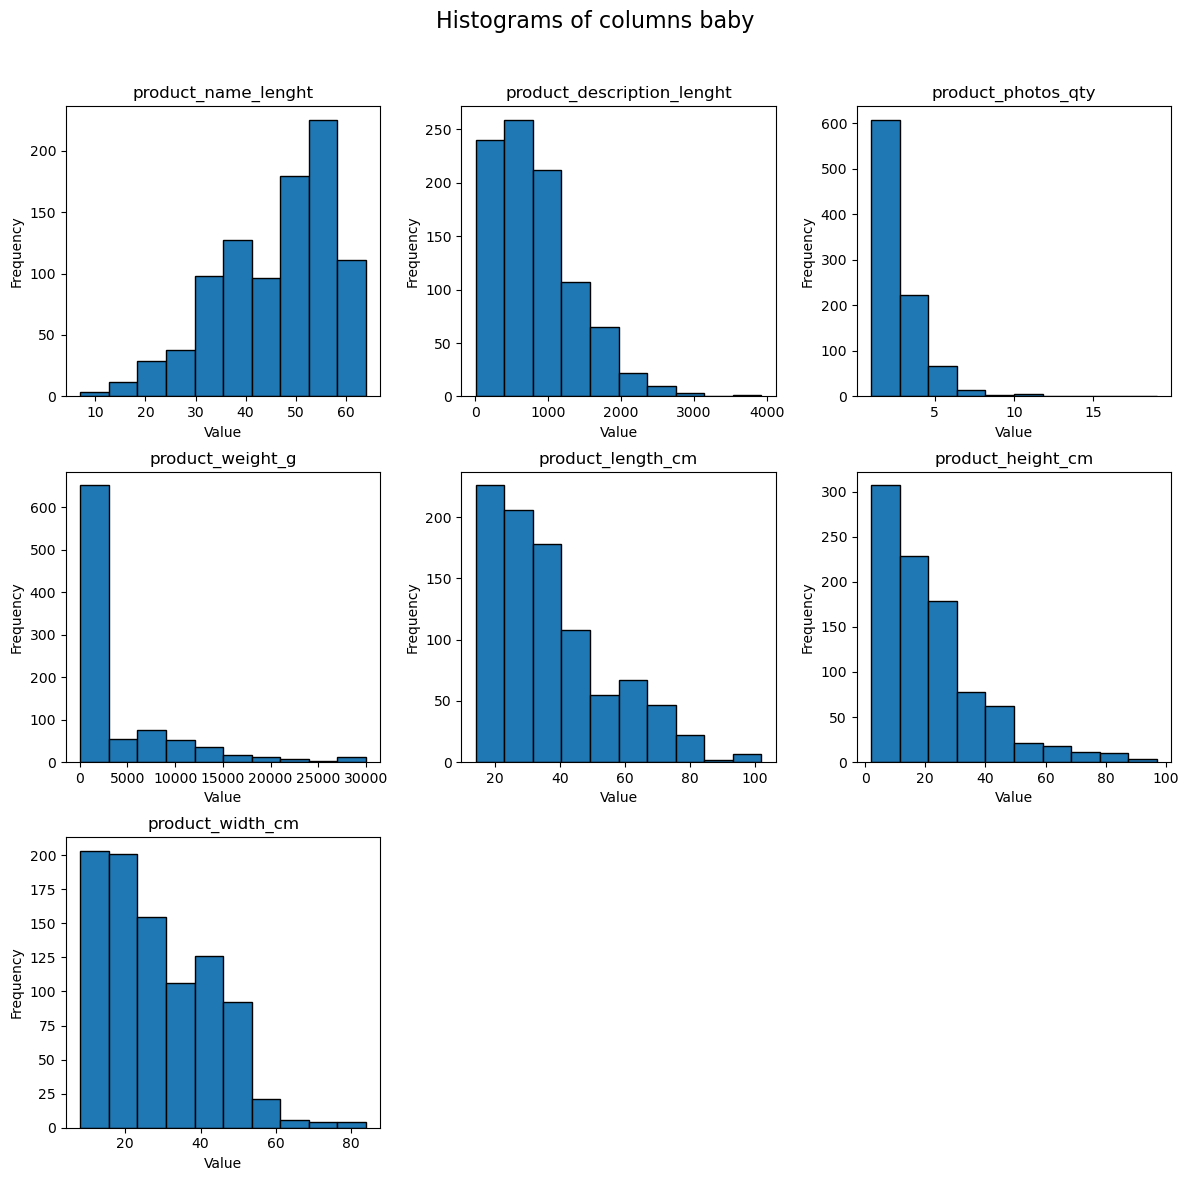

In [63]:
# print
bebes = products[products['product_category_name'] == 'bebes']

baby = [col for col in bebes.columns if pd.api.types.is_numeric_dtype(bebes[col])]

# Number of columns
num_columns = len(baby)

# Number of rows
num_rows = (num_columns + 2) // 3

# Create subplot
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

fig.suptitle('Histograms of columns baby', fontsize=16)

for i, col in enumerate(baby):
    ax = axes[i // 3, i % 3]
    bebes[col].plot(kind='hist', ax=ax, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
# Removed unnecessary subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

# adjust the subplot layout.
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Menampilkan plot
plt.show()
    


There are 610 values containing null in the product_name_length_product_name_description_product and number_of_product_photos columns, every null value in this column will be filled with a value of 0 except in the product_category_name column. Then the product with the ID 5eb564652db742ff8f28759cd8d2652a will be deleted, and the product with the name bebes which has a null value will be filled with the mode value. Products with the name cama_mesa_banho which have a value of 0 in the product_weight_g column will be filled in based on a range of values based on other cama_mesa_banho filters.

In [64]:
np.random.seed(32)

# Mengisi nilai null dalam kolom product_weight_g dengan nilai acak dengan selisih 50
random_numbers = np.random.choice(np.arange(6300, 6601, 50), size=(products['product_weight_g'] == 0).sum())

# Menentukan posisi baris yang memiliki nilai null
null_indices = products[products['product_weight_g'] == 0].index

# Mengisi nilai null dengan nilai acak
products.loc[null_indices, 'product_weight_g'] = random_numbers

In [65]:
summary(products)

feature data_type  null_values(%)  neg_value(%)  \
0                  product_id    object           0.000           0.0   
1       product_category_name    object           1.851           0.0   
2         product_name_lenght   float64           1.851           0.0   
3  product_description_lenght   float64           1.851           0.0   
4          product_photos_qty   float64           1.851           0.0   
5            product_weight_g   float64           0.006           0.0   
6           product_length_cm   float64           0.006           0.0   
7           product_height_cm   float64           0.006           0.0   
8            product_width_cm   float64           0.006           0.0   

   0_value(%)  duplicate  n_unique  \
0         0.0          0     32951   
1         0.0          0        73   
2         0.0          0        66   
3         0.0          0      2960   
4         0.0          0        19   
5         0.0          0      2203   
6         0.0          0        99   
7         0.0          0       102   
8         0.0          0        95   

                                       sample_unique  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  
1  [perfumaria, artes, esporte_lazer, bebes, util...  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ...  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....

In [66]:
# Dropping rows where 'product_weight_cm' is equal to 0
products.drop(products[products['product_id'] == '5eb564652db742ff8f28759cd8d2652a'].index, inplace=True)

# Isi nilai null pada kolom product category name dengan nilai 'N/A' sedangkan 3 kolom null lainnnya dengan '0'
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)


In [67]:
summary(products)

feature data_type  null_values(%)  neg_value(%)  \
0                  product_id    object           0.000           0.0   
1       product_category_name    object           0.000           0.0   
2         product_name_lenght   float64           0.000           0.0   
3  product_description_lenght   float64           0.000           0.0   
4          product_photos_qty   float64           0.000           0.0   
5            product_weight_g   float64           0.003           0.0   
6           product_length_cm   float64           0.003           0.0   
7           product_height_cm   float64           0.003           0.0   
8            product_width_cm   float64           0.003           0.0   

   0_value(%)  duplicate  n_unique  \
0       0.000          0     32950   
1       0.000          0        74   
2       1.848          0        67   
3       1.848          0      2961   
4       1.848          0        20   
5       0.000          0      2203   
6       0.000          0        99   
7       0.000          0       102   
8       0.000          0        95   

                                       sample_unique  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  
1  [perfumaria, artes, esporte_lazer, bebes, util...  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, 0.0, 7.0, ...  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....

Ternyata masih terdapat nilai null

In [68]:
products[products['product_weight_g'].isnull()]

product_id product_category_name  \
8578  09ff539a621711667c43eba6a3bd8466                 bebes   

      product_name_lenght  product_description_lenght  product_photos_qty  \
8578                 60.0                       865.0                 3.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
8578               NaN                NaN                NaN               NaN

In [69]:
# Filter data hanya kategori produk bebes
bebes = products[(products['product_category_name'] == 'bebes') & (products['product_name_lenght'] >= 58) & (products['product_name_lenght'] <= 63)]

# Fill in null values in each column based on the mode value
products['product_weight_g'].fillna(bebes['product_weight_g'].mode().iloc[0], inplace=True)
products['product_length_cm'].fillna(bebes['product_length_cm'].mode().iloc[0], inplace=True)
products['product_height_cm'].fillna(bebes['product_height_cm'].mode().iloc[0], inplace=True)
products['product_width_cm'].fillna(bebes['product_width_cm'].mode().iloc[0], inplace=True)

# Replace product_category_name to title string
products['product_category_name'] = products['product_category_name'].str.replace('_', ' ').str.title()


In [70]:
summary(products)

feature data_type  null_values(%)  neg_value(%)  \
0                  product_id    object             0.0           0.0   
1       product_category_name    object             0.0           0.0   
2         product_name_lenght   float64             0.0           0.0   
3  product_description_lenght   float64             0.0           0.0   
4          product_photos_qty   float64             0.0           0.0   
5            product_weight_g   float64             0.0           0.0   
6           product_length_cm   float64             0.0           0.0   
7           product_height_cm   float64             0.0           0.0   
8            product_width_cm   float64             0.0           0.0   

   0_value(%)  duplicate  n_unique  \
0       0.000          0     32950   
1       0.000          0        74   
2       1.848          0        67   
3       1.848          0      2961   
4       1.848          0        20   
5       0.000          0      2203   
6       0.000          0        99   
7       0.000          0       102   
8       0.000          0        95   

                                       sample_unique  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  
1  [Perfumaria, Artes, Esporte Lazer, Bebes, Util...  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, 0.0, 7.0, ...  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....

In [71]:
products.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_products_dataset.xlsx')

##### SELLERS DATA

In [72]:
# Overview dataset
summary(sellers)

feature data_type  null_values(%)  neg_value(%)  0_value(%)  \
0               seller_id    object             0.0           0.0         0.0   
1  seller_zip_code_prefix     int64             0.0           0.0         0.0   
2             seller_city    object             0.0           0.0         0.0   
3            seller_state    object             0.0           0.0         0.0   

   duplicate  n_unique                                      sample_unique  
0          0      3095  [3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...  
1          0      2246  [13023, 13844, 20031, 4195, 12914, 20920, 5532...  
2          0       611  [campinas, mogi guacu, rio de janeiro, sao pau...  
3          0        23  [SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M...

In [73]:
filtered_city(sellers, 'seller_city')

seller_id  seller_zip_code_prefix  \
237   c3aad7dc65449ae90a5e9c3c6c1e78e0                   15350   
246   71593c7413973a1e160057b80d4958f6                    3407   
360   a3fa18b3f688ec0fca3eb8bfcbd2d5b3                    4557   
476   26b482dccfa29bd2e40703ba45523702                   13450   
551   723a46b89fd5c3ed78ccdf039e33ac63                   93310   
622   7994b065a7ffb14e71c6312cf87b9de2                   29142   
869   cbf09e831b0c11f6f23ffb51004db972                    9726   
874   4aba391bc3b88717ce08eb11e44937b2                   45816   
945   f52c2422904463fdd7741f99045fecb6                    9230   
1004  1cbd32d00d01bb8087a5eb088612fd9c                    3363   
1159  89dda63a3c907c468ec88c310ed91213                    9380   
1337  720e6cf846ea7572cbb66b743fb91e6c                    8717   
1346  cf1313c6e2c01c2f4b014f97db4bcd2b                   22050   
1447  fe9d9cf8631285d5982c6e2cf27fb114                   36200   
1649  d79e8478eed9999493990b44955fb22e                   20081   
1712  6025c79c035c3d772133b8b8238463b2                   83327   
1920  01fd077212124329bac32490e8ef80d9                   14079   
2162  a1bea7061f61f6fdd9a85a6325ba1033                    6311   
2258  4b5f66b7adcf57f1ecc0d3c07dd6b177                   87025   
2340  5dceca129747e92ff8ef7a997dc4f8ca                   13450   
2620  6a3139c7bf09ece22a4713d956acbe5e                   13790   
2988  f9eedec3129e8cc6b6429c42d0808c5b                   22793   
3015  7f5e4d5efad7e44b91115dd1decb65f3                   12306   

                                   seller_city seller_state  
237                               auriflama/sp           SP  
246                      sao paulo / sao paulo           SP  
360                                 são paulo           SP  
476                      santa barbara d´oeste           SP  
551   novo hamburgo, rio grande do sul, brasil           RS  
622                             cariacica / es           ES  
869                                     sbc/sp           SP  
874             arraial d'ajuda (porto seguro)           BA  
945                      santo andre/sao paulo           SP  
1004                                   sp / sp           SP  
1159                            maua/sao paulo           SP  
1337                      mogi das cruzes / sp           SP  
1346            rio de janeiro \rio de janeiro           RJ  
1447                   barbacena/ minas gerais           MG  
1649           rio de janeiro / rio de janeiro           RJ  
1712                                pinhais/pr           PR  
1920                ribeirao preto / sao paulo           SP  
2162                   carapicuiba / sao paulo           SP  
2258                 vendas@creditparts.com.br           PR  
2340                     santa barbara d´oeste           SP  
2620                 sao sebastiao da grama/sp           SP  
2988    rio de janeiro, rio de janeiro, brasil           RJ  
3015                       jacarei / sao paulo           SP

In [74]:
# Merge sellers column with relevant column in geolocation data
sellers = sellers.merge(geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(),
                            left_on = 'seller_zip_code_prefix',
                            right_on = 'geolocation_zip_code_prefix',
                            how = 'left')

# Fill missing values in geolocation_city column with seller_city column
sellers['geolocation_city'].fillna(sellers['seller_city'].str.title(), inplace=True) 

# update seller_city with geolocation_city column
sellers['seller_city'] = sellers['geolocation_city']

# Drop geolocation_zip_code_prefix and geolocation_city column
sellers.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

sellers

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              Campinas           SP  
1            Mogi Guacu           SP  
2        Rio De Janeiro           RJ  
3             Sao Paulo           SP  
4     Braganca Paulista           SP  
...                 ...          ...  
3090            Sarandi           PR  
3091            Palhoca           SC  
3092          Sao Paulo           SP  
3093            Pelotas           RS  
3094            Taubate           SP  

[3095 rows x 4 columns]

In [75]:
# Keterangan pemetaan kota ke negara bagian
mapping_SP = {
    'SC': ['Itajai', 'Florianopolis', 'Laguna', 'Blumenau', 'Palhoca', 'Chapeco'],
    'PR': ['Curitiba', 'Pinhais', 'Sao Jose Dos Pinhais', 'Laranjeiras Do Sul', 'Marechal Candido Rondon', 'Sertanopolis', 'Goioere', 'Londrina', 'Marechal Candido Rondon'],
    'RS': ['Porto Alegre', 'Caxias Do Sul'],
    'RJ': ['Volta Redonda', 'Rio De Janeiro'],
    'MG': ['Belo Horizonte', 'Juiz De Fora', 'Boa Esperanca', 'Andradas', 'Santa Rita Do Sapucai', 'Mombuca'],
    'ES': ['Vila Velha'],
    'TO': ['Tocantins'],
    'DF': ['Brasilia'],
    'BA': ['Ipira']
}

# Melakukan pemetaan kota ke negara bagian
for state, cities in mapping_SP.items():
    sellers.loc[sellers['seller_city'].isin(cities), 'seller_state'] = state

In [76]:
filtered_city(sellers, 'seller_city')

Empty DataFrame
Columns: [seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []

In [77]:
summary(sellers)

feature data_type  null_values(%)  neg_value(%)  0_value(%)  \
0               seller_id    object             0.0           0.0         0.0   
1  seller_zip_code_prefix     int64             0.0           0.0         0.0   
2             seller_city    object             0.0           0.0         0.0   
3            seller_state    object             0.0           0.0         0.0   

   duplicate  n_unique                                      sample_unique  
0          0      3095  [3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...  
1          0      2246  [13023, 13844, 20031, 4195, 12914, 20920, 5532...  
2          0       555  [Campinas, Mogi Guacu, Rio De Janeiro, Sao Pau...  
3          0        23  [SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, MT, C...

In [78]:
sellers.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\olist_sellers_dataset.xlsx')

##### CATEGORY PRODUCT

In [79]:
# Check all of the category_product dataset
summary(category_product)

feature data_type  null_values(%)  neg_value(%)  \
0          product_category_name    object             0.0             0   
1  product_category_name_english    object             0.0             0   

   0_value(%)  duplicate  n_unique  \
0           0          0        71   
1           0          0        71   

                                       sample_unique  
0  [beleza_saude, informatica_acessorios, automot...  
1  [health_beauty, computers_accessories, auto, b...

In [80]:
category_product.tail()

product_category_name product_category_name_english
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

In [81]:
# Replace "_" to spaces and convert to title case of product_category_name_english column
category_product['product_category_name'] = category_product['product_category_name'].str.replace("_", " ").str.title()
category_product['product_category_name_english'] = category_product['product_category_name_english'].str.replace("_", " ").str.title()

# Show value of product_category_name_english
category_product['product_category_name_english'].unique()

array(['Health Beauty', 'Computers Accessories', 'Auto', 'Bed Bath Table',
       'Furniture Decor', 'Sports Leisure', 'Perfumery', 'Housewares',
       'Telephony', 'Watches Gifts', 'Food Drink', 'Baby', 'Stationery',
       'Tablets Printing Image', 'Toys', 'Fixed Telephony',
       'Garden Tools', 'Fashion Bags Accessories', 'Small Appliances',
       'Consoles Games', 'Audio', 'Fashion Shoes', 'Cool Stuff',
       'Luggage Accessories', 'Air Conditioning',
       'Construction Tools Construction',
       'Kitchen Dining Laundry Garden Furniture',
       'Costruction Tools Garden', 'Fashion Male Clothing', 'Pet Shop',
       'Office Furniture', 'Market Place', 'Electronics',
       'Home Appliances', 'Party Supplies', 'Home Confort',
       'Costruction Tools Tools', 'Agro Industry And Commerce',
       'Furniture Mattress And Upholstery', 'Books Technical',
       'Home Construction', 'Musical Instruments',
       'Furniture Living Room', 'Construction Tools Lights',
       'Indust

Jika diperhatikan terdapat produk yang serupa yaitu Home Appliances dan Home Appliances 2, Home Confort dengan Home Comfort 2. Juga di table products terdapat 74 category sedangkan di table category_product hanya 70.

In [82]:
prd = products['product_category_name'].value_counts().to_frame().reset_index()
cp_merge = pd.merge(category_product, prd['product_category_name'], on='product_category_name', how='right')

# Fillna a null values of product_category_name-english column
cp_merge['product_category_name_english'].fillna(cp_merge['product_category_name'], inplace=True)
cp_merge['product_category_name_english'] = cp_merge['product_category_name_english'].replace({'Portateis Cozinha E Preparadores De Alimentos': 'Kitchen Laptops and Food Preparers',
                                                                                               'Home Comfort 2': 'Home Comfort',
                                                                                               'Home Confort': 'Home Comfort',
                                                                                               'Home Appliances 2': 'Home Appliances',
                                                                                               'La Cuisine': 'Cuisine (Food)'})

category_product = cp_merge
# prd

In [83]:
cp_merge['product_category_name_english'].unique()

array(['Bed Bath Table', 'Sports Leisure', 'Furniture Decor',
       'Health Beauty', 'Housewares', 'Auto', 'Computers Accessories',
       'Toys', 'Watches Gifts', 'Telephony', 'Baby', 'Perfumery',
       'Fashion Bags Accessories', 'Stationery', 'Cool Stuff',
       'Garden Tools', 'Pet Shop', 'Unknown', 'Electronics',
       'Construction Tools Construction', 'Home Appliances',
       'Luggage Accessories', 'Consoles Games', 'Office Furniture',
       'Musical Instruments', 'Small Appliances', 'Home Construction',
       'Books General Interest', 'Fashion Shoes', 'Furniture Living Room',
       'Air Conditioning', 'Books Technical', 'Fixed Telephony',
       'Home Comfort', 'Food Drink', 'Market Place',
       'Fashion Male Clothing', 'Kitchen Dining Laundry Garden Furniture',
       'Signaling And Security', 'Construction Tools Safety',
       'Costruction Tools Garden', 'Food', 'Drinks',
       'Construction Tools Lights', 'Agro Industry And Commerce',
       'Industry Commerce An

In [84]:
category_product.to_excel(r'D:\Document\Project_Data\Project_E-Commerce\excel\product_category_name_translation.xlsx')

#### TRANFORM DATA

In [85]:
# Filtering delivered of order status
delivered_ord = orders[orders['order_status'] == 'Delivered']

# Create representative point data from geo data zip codes
geo_rep_data = pd.DataFrame(dict
 (rep_lat = geolocation.groupby('geolocation_zip_code_prefix').geolocation_lat.mean(),
  rep_long = geolocation.groupby('geolocation_zip_code_prefix').geolocation_lng.mean())
 ).reset_index()

# Merge data
prd_merge = pd.merge(products[['product_id', 'product_category_name',]], category_product, on='product_category_name', how='left').drop_duplicates()
prd_merge['product_category_name'] = prd_merge['product_category_name_english']
prd_merge.drop(columns=['product_category_name_english'], axis=1, inplace=True)

sell_ord = pd.merge(delivered_ord, items[['order_id', 'order_item_id', 'seller_id', 'product_id', 'price', 'freight_value']], on='order_id', how='left').drop_duplicates()
# sell_ord = pd.merge(delivered_ord, items[['order_id', 'seller_id', 'product_id', 'price', 'freight_value']], on='order_id', how='left').drop_duplicates()
sell_ord = pd.merge(sell_ord, prd_merge, on='product_id', how='left').drop_duplicates()
sell_ord = pd.merge(sell_ord, customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']], on='customer_id', how='left').drop_duplicates()
sell_ord = pd.merge(sell_ord, sellers[['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']], on='seller_id', how='left').drop_duplicates()
sell_ord = pd.merge(sell_ord, reviews[['order_id', 'review_score']], on='order_id', how='left').drop_duplicates(subset=['order_id', 'customer_id', 'order_item_id', 'seller_id', 'product_id'], keep='last')
# sell_ord = pd.merge(sell_ord, geo_rep_data, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
# sell_ord = pd.merge(sell_ord, geo_rep_data, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left', suffixes=('_customer', '_seller'))

# sell_ord = pd.merge(sell_ord, payments[['order_id', 'payment_type', 'payment_sequential', 'payment_value']], on='order_id', how='left').drop_duplicates()
# sell_ord = pd.merge(sell_ord, payments[['order_id', 'payment_value']], on='order_id', how='left').drop_duplicates()
sell_ord.sort_values(by=['customer_id', 'order_purchase_timestamp'], ascending=True)


# Create a range per order from ordering until it arrives at the customer
sell_ord['range_carrier_to_approved'] = sell_ord['order_delivered_carrier_date'] - sell_ord['order_approved_at_orders']
mean_range_carrier_to_approved = sell_ord['range_carrier_to_approved'].drop_duplicates().median().floor('s')       # without microseconds
sell_ord['range_carrier_to_approved'].fillna(mean_range_carrier_to_approved, inplace=True)
sell_ord['order_delivered_carrier_date'] = sell_ord['order_approved_at_orders'] + sell_ord['range_carrier_to_approved']

sell_ord['range_carrier_to_delivered']= sell_ord['order_delivered_customer_date'] - sell_ord['order_delivered_carrier_date']
mean_range_carrier_to_delivered = sell_ord['range_carrier_to_delivered'].drop_duplicates().median().floor('s')       # without microseconds
sell_ord['range_carrier_to_delivered'].fillna(mean_range_carrier_to_approved, inplace=True)
sell_ord['order_delivered_customer_date'] = sell_ord['order_delivered_carrier_date'] + sell_ord['range_carrier_to_delivered']

# Drop and fill
sell_ord.drop(columns=['range_carrier_to_approved'], inplace=True)
sell_ord.drop(columns=['range_carrier_to_delivered'], inplace=True)

# pv_values = sell_ord['order_item_id'] * (sell_ord['price'] + sell_ord['freight_value'])
# pv_values = (sell_ord['price'] + sell_ord['freight_value'])
sell_ord['product_category_name'].fillna('Unknown', inplace=True)
# sell_ord['payment_type'].fillna('Credit Card', inplace=True)
# sell_ord['payment_sequential'].fillna(1.0, inplace=True)
# sell_ord['payment_value'].fillna(pv_values, inplace=True)
sell_ord['review_score'].fillna(0, inplace=True)


sell_ord['payment_value'] = sell_ord['price'] + sell_ord['freight_value']
sell_ord['total_order'] = sell_ord.groupby('customer_id')['customer_id'].transform('count')                     # Calculates the number of orders for each customer_id
sell_ord['total_sales'] = sell_ord.groupby(['customer_id', 'seller_id'])['seller_id'].transform('count')

df = sell_ord




In [86]:
df.to_excel(r"D:\Document\Project_Data\Project_E-Commerce\excel\all_dataset_true.xlsx")

# Business Question

#### [DONE] 1. How much of revenue get from the e-commerce and how much a sales on process?

In [86]:
df.describe()

order_purchase_timestamp       order_approved_at_orders  \
count                         110197                         110197   
mean   2018-01-02 02:49:51.928346368  2018-01-02 13:21:05.725782272   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-15 06:32:42            2017-09-15 13:55:26   
50%              2018-01-21 10:11:55            2018-01-22 13:56:34   
75%              2018-05-05 16:03:59            2018-05-05 22:53:12   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         110197                         110197   
mean   2018-01-05 09:38:22.303610624  2018-01-14 14:09:06.950062080   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-18 22:25:03            2017-09-26 20:15:59   
50%              2018-01-24 18:52:39            2018-02-02 21:08:39   
75%              2018-05-08 14:20:00            2018-05-15 20:28:25   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  order_item_id          price  \
count                         110197  110197.000000  110197.000000   
mean   2018-01-25 22:07:57.552020224       1.198181     119.980563   
min              2016-10-04 00:00:00       1.000000       0.850000   
25%              2017-10-06 00:00:00       1.000000      39.900000   
50%              2018-02-16 00:00:00       1.000000      74.900000   
75%              2018-05-28 00:00:00       1.000000     134.170000   
max              2018-10-25 00:00:00      21.000000    6735.000000   
std                              NaN       0.706676     182.299446   

       freight_value  customer_zip_code_prefix  seller_zip_code_prefix  \
count  110197.000000             110197.000000           110197.000000   
mean       19.948598              35155.346888            24467.819296   
min         0.000000               1003.000000             1001.000000   
25%        13.080000              11310.000000             6429.000000   
50%        16.260000              24344.000000            13568.000000   
75%        21.150000              59066.000000            28035.000000   
max       409.680000              99980.000000            99730.000000   
std        15.698136              29901.148745            27624.629131   

        review_score  payment_value    total_order    total_sales  
count  110197.000000  110197.000000  110197.000000  110197.000000  
mean        4.050963     139.929161       1.396363       1.358231  
min         0.000000       6.080000       1.000000       1.000000  
25%         4.000000      55.180000       1.000000       1.000000  
50%         5.000000      92.130000       1.000000       1.000000  
75%         5.000000     157.510000       1.000000       1.000000  
max         5.000000    6929.310000      21.000000      21.000000  
std         1.387746     189.319151       1.122815       1.079478

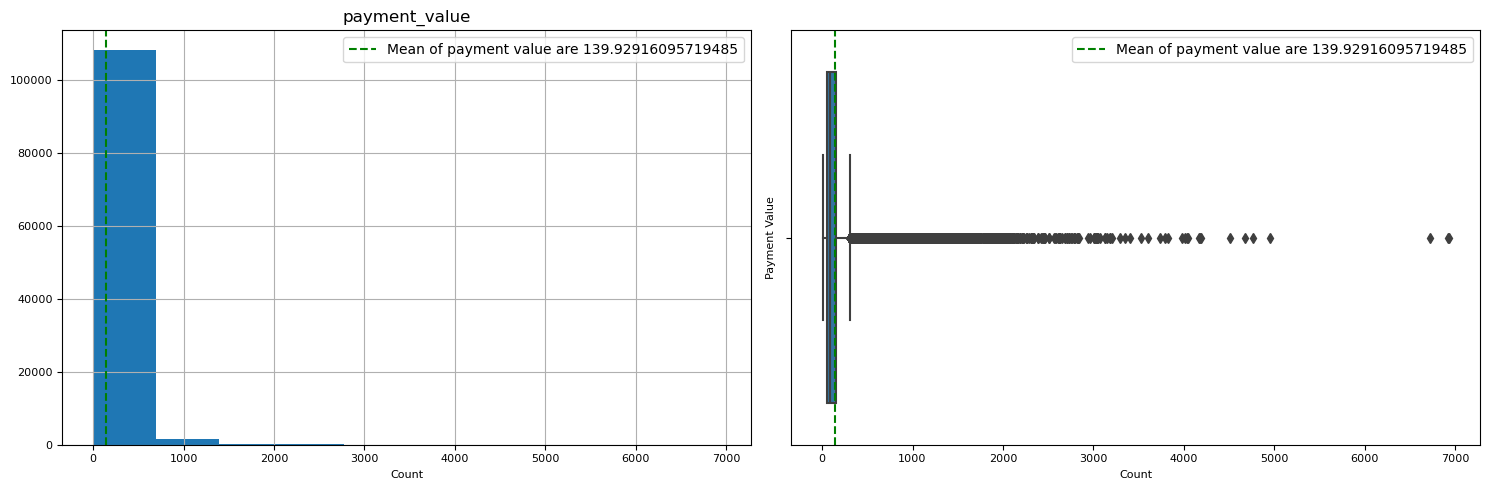

In [87]:
# Plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

df.hist('payment_value', ax=ax[0])
# ax[0].title('Histogram of Payment Value After Dealing Outlier')
ax[0].set_xlabel('Payment Value', fontsize=8)
ax[0].set_xlabel('Count', fontsize=8)
ax[0].tick_params(axis='both', labelsize=8)
ax[0].axvline(df['payment_value'].mean(), linestyle='--', color='green', label=f"Mean of payment value are {df['payment_value'].mean()}")
ax[0].legend()

sns.boxplot(x=df["payment_value"], ax=ax[1])
# ax[1].title(' Payment Value')
ax[1].set_xlabel('Count', fontsize=8)
ax[1].set_ylabel('Payment Value', fontsize=8)
ax[1].tick_params(axis='both', labelsize=8)
# ax[1].axvline(df['payment_value'].mean(), linestyle='--', color='green', label=f"Mean of payment value are {df['payment_value'].mean()}")
ax[1].axvline(df['payment_value'].mean(), linestyle='--', color='green', label=f"Mean of payment value are {df['payment_value'].mean()}")

ax[1].legend()

plt.tight_layout()
plt.show()

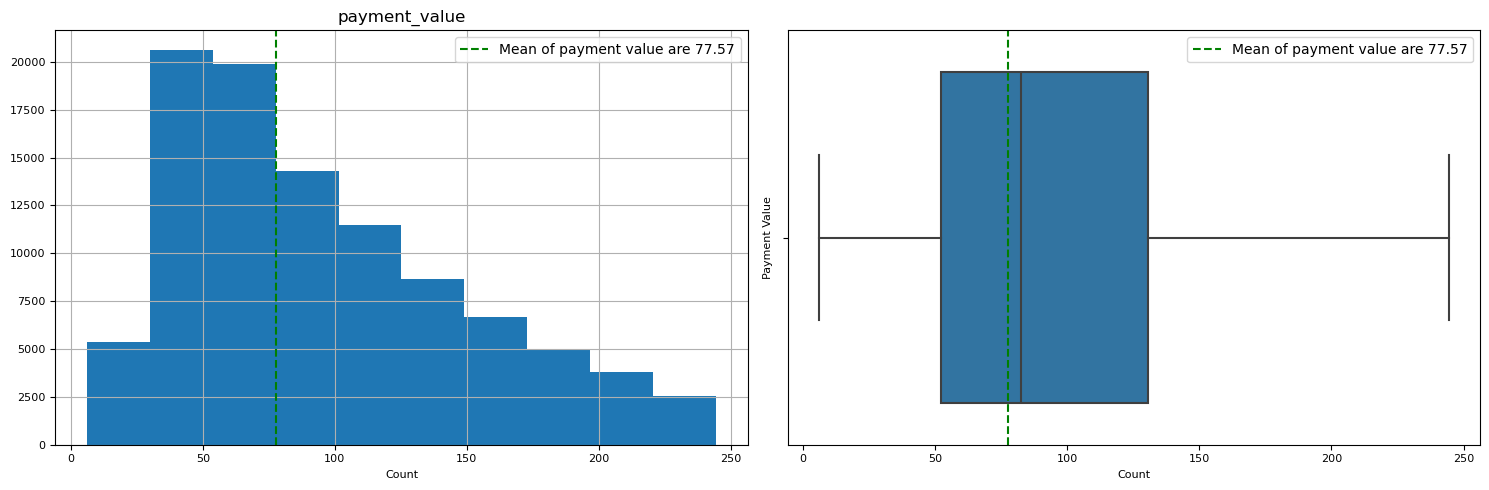

In [88]:
# Dealing Outlier
quartile1 = df['payment_value'].quantile(0.25)
quartile3 = df['payment_value'].quantile(0.67)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range

# filtered the outlier based on IQR
no_outlier = df[(df['payment_value'] > low_limit) & (df['payment_value'] < up_limit)]

# Plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

no_outlier.hist('payment_value', ax=ax[0])
# ax[0].title('Histogram of Payment Value After Dealing Outlier')
ax[0].set_xlabel('Payment Value', fontsize=8)
ax[0].set_xlabel('Count', fontsize=8)
ax[0].tick_params(axis='both', labelsize=8)
ax[0].axvline(no_outlier['payment_value'].mode()[0], linestyle='--', color='green', label=f"Mean of payment value are {no_outlier['payment_value'].mode()[0]}")
ax[0].legend()

sns.boxplot(x=no_outlier["payment_value"], ax=ax[1])
# ax[1].title(' Payment Value')
ax[1].set_xlabel('Count', fontsize=8)
ax[1].set_ylabel('Payment Value', fontsize=8)
ax[1].tick_params(axis='both', labelsize=8)
# ax[1].axvline(no_outlier['payment_value'].mode()[0], linestyle='--', color='green', label=f"Mean of payment value are {no_outlier['payment_value'].mode()[0]}")
ax[1].axvline(no_outlier['payment_value'].mode()[0], linestyle='--', color='green', label=f"Mean of payment value are {no_outlier['payment_value'].mode()[0]}")

ax[1].legend()

plt.tight_layout()
plt.show()


From September 2016 to August 2018 a total of 15419773.75 Real Brasil. The smallest customer payment was 0.0 Real Brasil while the highest was 6929.31 Real Brasil with the average customer making a payment of 77.57 Real Brasil after outliers were removed which previously reached 139.93 Real Brasil. The reason the customer paid R$0.0 was because he got a free voucher promo which resulted in the customer not paying a penny. Meanwhile, the customer with the highest payment is because this customer ordered 21 products so the total payment is very high.

Almost all orders, around 97.82% or 110,197 orders were successfully delivered to customers. The remaining percentage is divided into several stages, orders that are still being processed reach 0.32%, those that have been invoiced 0.32%, those that have been sent 1.05%, those that have been canceled 0.48%, those that are not available. of 0.01%, and the approved amount of 0.00%. . Optimizing delivery efficiency can be done by optimizing the inventory management process. Ensure inventory is always well monitored and managed efficiently. Then you can also improve communication with customers. Maintaining open and clear communication with customers regarding the status of their orders, providing accurate information, this can reduce the number of order cancellations due to customer uncertainty and dissatisfaction.

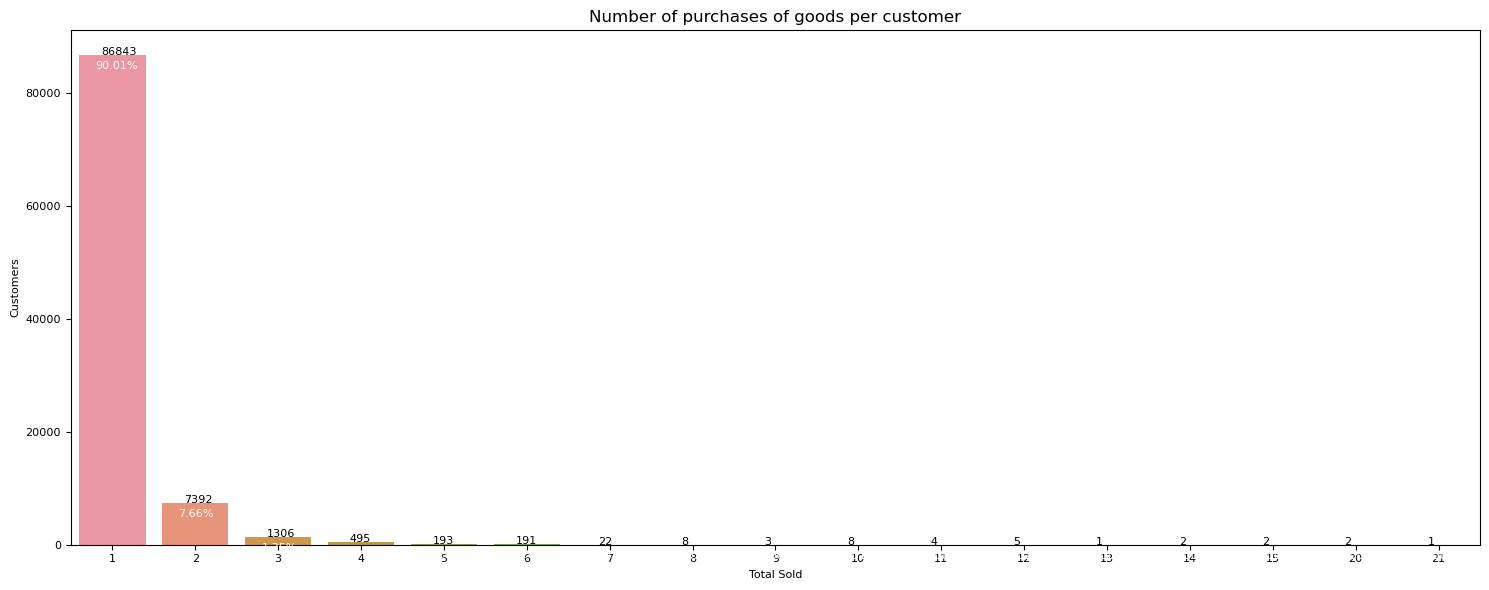

In [89]:
# Number of purchases of goods per customer
customer_order = df.groupby(['customer_id', 'order_purchase_timestamp']).size().reset_index(name='total_order')

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x='total_order', data=customer_order)

ax.set_title('Number of purchases of goods per customer')
ax.set_xlabel('Total Sold', fontsize=8)
ax.set_ylabel('Customers', fontsize=8)
ax.tick_params(axis='both', labelsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-8, 0), fontsize=8, color='black', textcoords='offset points')
    
for p in ax.patches:
    ax.annotate(f'{(p.get_height() / len(customer_order.total_order)) * 100:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-12, -10), fontsize=8, color='white', textcoords='offset points')

plt.tight_layout()
plt.show()
# seller_city_group_['total_sales'].sum()

Olist received 99,944 orders with a total of 110,197 products sold from 117,598 products. The profit obtained reached R$ 15422273 based on orders that were successfully sent. In customer transaction analysis, the data shows significant variations in the number of items purchased in a single transaction. The majority of transactions (90.01%) involved purchasing only one item, indicating that most customers tend to make single purchases. However, there are also several transactions that involve purchases in larger quantities, such as transactions for two items (7.66%) and three items (1.35%). Only 1 customer made the highest purchase, namely 21 items. <br>
      This shows that most customers only shop once, this can affect customer retention.

#### [DONE] 2. In which year/quarter/month/day did the highest increase in order frequency occur? Are there certain patterns on certain days that result in an increase in orders?

In [90]:
# Extracting date-related information from the order purchase timestamp
def date_info(dataframe):
    dataframe['day_of_week'] = dataframe['order_purchase_timestamp'].dt.day_name()
    dataframe['month'] = dataframe['order_purchase_timestamp'].dt.month_name()
    dataframe['quarter'] = dataframe['order_purchase_timestamp'].dt.quarter
    dataframe['year'] = dataframe['order_purchase_timestamp'].dt.year
    return dataframe
    # Displaying the extracted date-related information
# Order info
order_date_info = date_info(df[['order_id', 'order_purchase_timestamp']].drop_duplicates())

# Sales info
sales_date_info = date_info(df[['order_id', 'order_purchase_timestamp']])


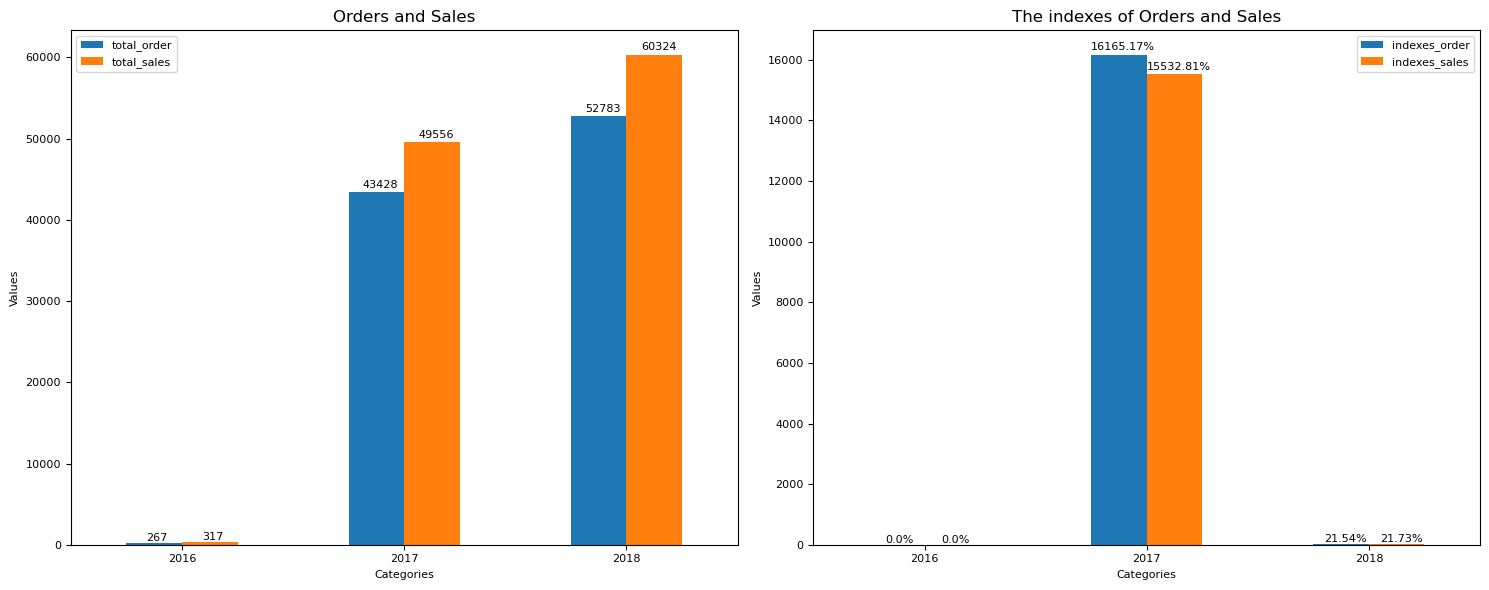

In [91]:
# Plotting the total orders and sales based on year
order_years = order_date_info.groupby(['year']).size().reset_index(name='total')
order_years['indexes'] = round(order_years['total'].pct_change().mul(100), 2)
    
sales_years = sales_date_info.groupby(['year']).size().reset_index(name='total')
sales_years['indexes'] = round(sales_years['total'].pct_change().mul(100), 2)

order_sales_yearly = pd.merge(order_years[['year', 'total']], sales_years[['year', 'total']], on='year', how='left', suffixes=('_order', '_sales'))
order_sales_yearly_ = pd.merge(order_years[['year', 'indexes']], sales_years[['year', 'indexes']], on='year', how='left', suffixes=('_order', '_sales'))

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0] = order_sales_yearly.plot(kind='bar', x='year', title='Orders and Sales', ax=ax[0])
ax[0].set_ylabel('Values', fontsize=8)
ax[0].set_xlabel('Categories', fontsize=8)
ax[0].tick_params(axis='both', labelsize=8)
ax[0].tick_params(axis='x', rotation=0)

# label bars
for p in ax[0].patches:
    ax[0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(22, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=8,
                    ha='center', va='bottom')
ax[0].legend(fontsize=8)
    
ax[1] = order_sales_yearly_.plot(kind='bar', x='year', title='The indexes of Orders and Sales', ax=ax[1])
ax[1].set_ylabel('Values', fontsize=8)
ax[1].set_xlabel('Categories', fontsize=8)
ax[1].tick_params(axis='both', labelsize=8)
ax[1].tick_params(axis='x', rotation=0)

# label bars
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height()}%", (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(22, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=8,
                    ha='center', va='bottom')
    
ax[1].legend(fontsize=8)
plt.tight_layout()
plt.show()



So far, the level of orders on Olist e-commerce during the 2 periods 2016 to 2017 was 110.197 orders with an increase in the total index reaching 16.165,17%. In 2016 it only received 267 orders, while in 2017 it received 43.428 orders. This is what makes the index level in 2017 very high, namely reaching 16.165,17% because it is very different from 2017 which reached 43.428 orders. The reason orders in 2016 were the lowest is because there were only the last few months, such as September, October and December, which made the index level in 2017 increase very significantly.
In 2018 there was an increase of 21,54% and it was also the year with the highest sales compared to the previous year with 52.783 orders.

In [92]:
# The trend and the index Orders by quarterly
def quarterly(dataframe):
    quarter_order = (
        dataframe.groupby(['year', 'quarter'])['quarter']
        .size()
        .reset_index(name='total')
        )
    quarter_order['quarter'] = quarter_order['quarter'].astype('str')
    quarter_order['quarter'] = 'Q' + quarter_order['quarter']
    
    quarter_order['index'] = round(quarter_order['total'].pct_change().mul(100), 2)
    # quarter_order.info()
    return quarter_order


def indexes(dataframe):

    # Indexes
    quarter_pivot = dataframe.pivot_table(values='total', index='quarter', columns='year')
    # Change a null values to 0
    quarter_pivot.fillna(0, inplace=True)
    
    # Change the data type to integer
    # quarter_pivot = dataframe.astype(int)
    quarter_pivot['indexes2017'] = round((quarter_pivot[2017] / quarter_pivot[2016] * 100), 2)
    quarter_pivot['indexes2018'] = round((quarter_pivot[2018] / quarter_pivot[2017] * 100), 2)

    # Menggunakan quarter_pivot DataFrame yang telah Anda buat sebelumnya
    quarter_order_melted = quarter_pivot.reset_index().melt(id_vars='quarter', var_name='year', value_name='indexes')
    quarter_order_melted = quarter_order_melted.loc[12:, :]
    return quarter_order_melted

# Orders and Sales
quarterly_orders = quarterly(order_date_info)
quarterly_sales = quarterly(sales_date_info)
# quarterly_orders_sales = pd.merge(quarterly_orders, quarterly_sales, on=['year', 'quarter'], how='left', suffixes=('_order', '_sales'))

# Indexes
quarterly_orders_indexes = indexes(quarterly_orders)
quarterly_sales_indexes = indexes(quarterly_sales)

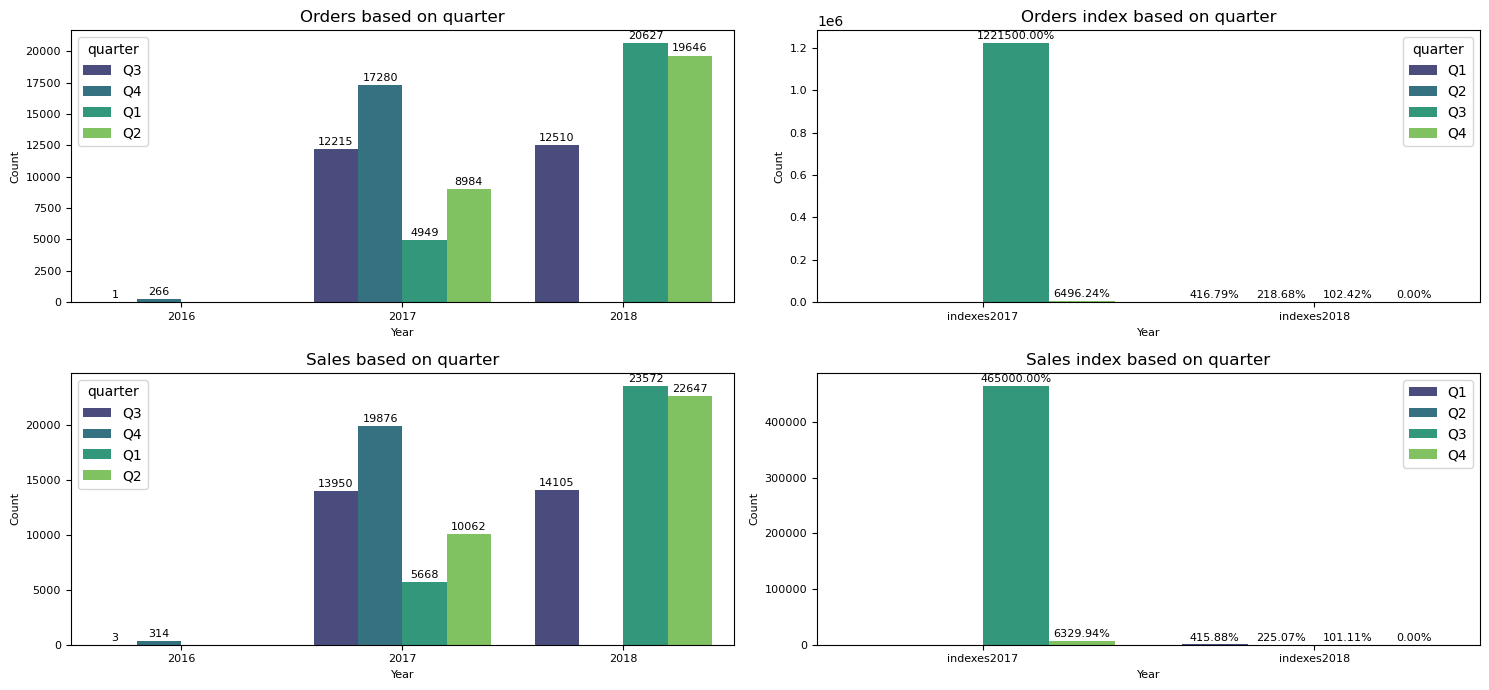

In [93]:
# Plot
hue_orders = ['Q1', 'Q2', 'Q3', 'Q4']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

# Orders plot
sns.barplot(x='year', y='total', data=quarterly_orders, hue='quarter', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Orders based on quarter')
ax[0, 0].set_xlabel('Year', fontsize=8)
ax[0, 0].set_ylabel('Count', fontsize=8)
ax[0, 0].tick_params(axis='both', labelsize=8)

for p in ax[0, 0].patches:
    ax[0, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 3), ha='center', fontsize=8, color='black', textcoords='offset points')
    
sns.barplot(x='year', y='indexes', data=quarterly_orders_indexes, hue='quarter', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Orders index based on quarter')
ax[0, 1].set_xlabel('Year', fontsize=8)
ax[0, 1].set_ylabel('Count', fontsize=8)
ax[0, 1].tick_params(axis='both', labelsize=8)

# Adding index labels
for p in ax[0, 1].patches:
    ax[0, 1].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), ha='center', va='center', fontsize=8, color='black', textcoords='offset points')

sns.barplot(x='year', y='total', data=quarterly_sales, hue='quarter', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Sales based on quarter')
ax[1, 0].set_xlabel('Year', fontsize=8)
ax[1, 0].set_ylabel('Count', fontsize=8)
ax[1, 0].tick_params(axis='both', labelsize=8)

for p in ax[1, 0].patches:
    ax[1, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 3), ha='center', fontsize=8, color='black', textcoords='offset points')
    
# Sales plot
sns.barplot(x='year', y='indexes', data=quarterly_sales_indexes, hue='quarter', palette='viridis', ax=ax[1, 1])
ax[1, 1].set_title('Sales index based on quarter')
ax[1, 1].set_xlabel('Year', fontsize=8)
ax[1, 1].set_ylabel('Count', fontsize=8)
ax[1, 1].tick_params(axis='both', labelsize=8)

# Adding index labels
for p in ax[1, 1].patches:
    ax[1, 1].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), ha='center', va='center', fontsize=8, color='black', textcoords='offset points')

plt.tight_layout()
plt.legend()


Order data shows a significant growth trend from year to year. In the third quarter of 2016, order only reached 1 units, but there was a drastic jump in the fourth quarter to reach 266 units. This trend continued into 2017, where the number of order increased exponentially from quarter to quarter, reaching 4.949 units in the first quarter, 8.984 units in the second quarter, 12.215 units in the third quarter, and 17.280 units in the fourth quarter. However, in 2018, there was a quite sharp decline in order, namely only reaching 20.627 units in the first quarter, then dropping to 19.646 units in the second quarter, and reaching 12.510 units in the third quarter.

Based on the data above, Quarter 3 of 2017 experienced a very significant increase in the index, namely 1.221.500,00%. Because, in the third quarter of 2016 it only receive3 1 orders, far from the third quarter of 2017. Then in the fourth quarter of 2017 it received an index of 6496,24%. The first quarter of 2018 had a fairly high index, namely 416,79%. Quarter 2 of 2018 had an index value of 218,68%, and quarter 3 of 2018 only had an index value of 102,42%.

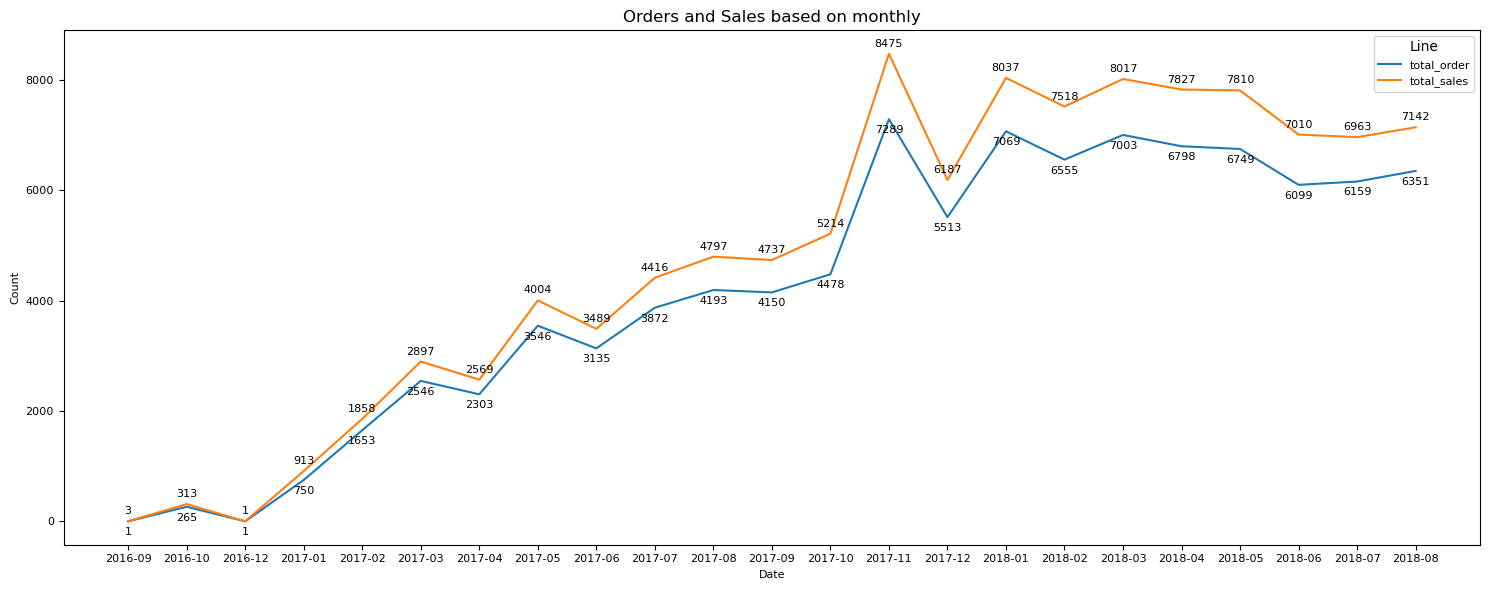

In [94]:
# Monthly order trend analysis
def monthly(dataframe):
    monthly_order_trend = dataframe.copy()

    # Extracting year and month from the timestamp
    monthly_order_trend['order_purchase_timestamp'] = monthly_order_trend['order_purchase_timestamp'].dt.strftime('%Y-%m')

    # Grouping the count of products by month of purchase
    monthly_order_trend = monthly_order_trend.groupby('order_purchase_timestamp')['order_id'].size().reset_index(name="total")

    # Calculating cumulative order and growth percentage
    monthly_order_trend['cumulative_order'] = monthly_order_trend['total'].cumsum()
    monthly_order_trend['growth_percentage'] = round(monthly_order_trend['total'].pct_change().mul(100), 2)

    # Setting the index to the month of purchase
    monthly_order_trend = monthly_order_trend.set_index('order_purchase_timestamp')

    # Displaying the monthly order trend analysis
    monthly_order_trend = monthly_order_trend[:'2018-08']
    return monthly_order_trend

monthly_order_trend = monthly(order_date_info)
monthly_sales_trend = monthly(sales_date_info)
monthly_order_sales = pd.merge(monthly_order_trend[['total']], monthly_sales_trend[['total']], left_index=True, right_index=True, suffixes=('_order', '_sales')).reset_index()

# Melt DataFrame
df_melted = pd.melt(monthly_order_sales, id_vars='order_purchase_timestamp', var_name='line', value_name='y')
df_melted

# Create line plots
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=df_melted, x='order_purchase_timestamp', y='y', hue='line', markers=True)

# Adding axis label and title
plt.title('Orders and Sales based on monthly')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='both', labelsize=8)

# Adding count labels
for line, label in zip(ax.lines, ['Line 1', 'Line 2']):
    y = line.get_ydata()
    for i, val in enumerate(y):
        offset = (0, -10) if label == 'Line 1' else (0, 5)  # Tentukan offset berdasarkan label
        ax.annotate(f'{val}', (df_melted['order_purchase_timestamp'].iloc[i], val), textcoords="offset points", xytext=offset, ha='center', fontsize=8)

plt.legend(title='Line', fontsize=8)
plt.tight_layout()
plt.show()



Order data shows significant variations in total order from month to month. In September 2016, total order reached 1 units, increasing drastically to 265 units in October 2016. However, there was a significant decline in December 2016 when order of only 1 unit were recorded. The growth trend was again visible at the beginning of 2017, with total order reaching 750 units in January, increasing rapidly to 1653 units in February, and peaking at 2546 units in March. Despite fluctuating, total order throughout 2017 were relatively stable, with the highest peak occurring in November 2017 at 7289 units. However, in 2018 there was a gradual decline from January to August.

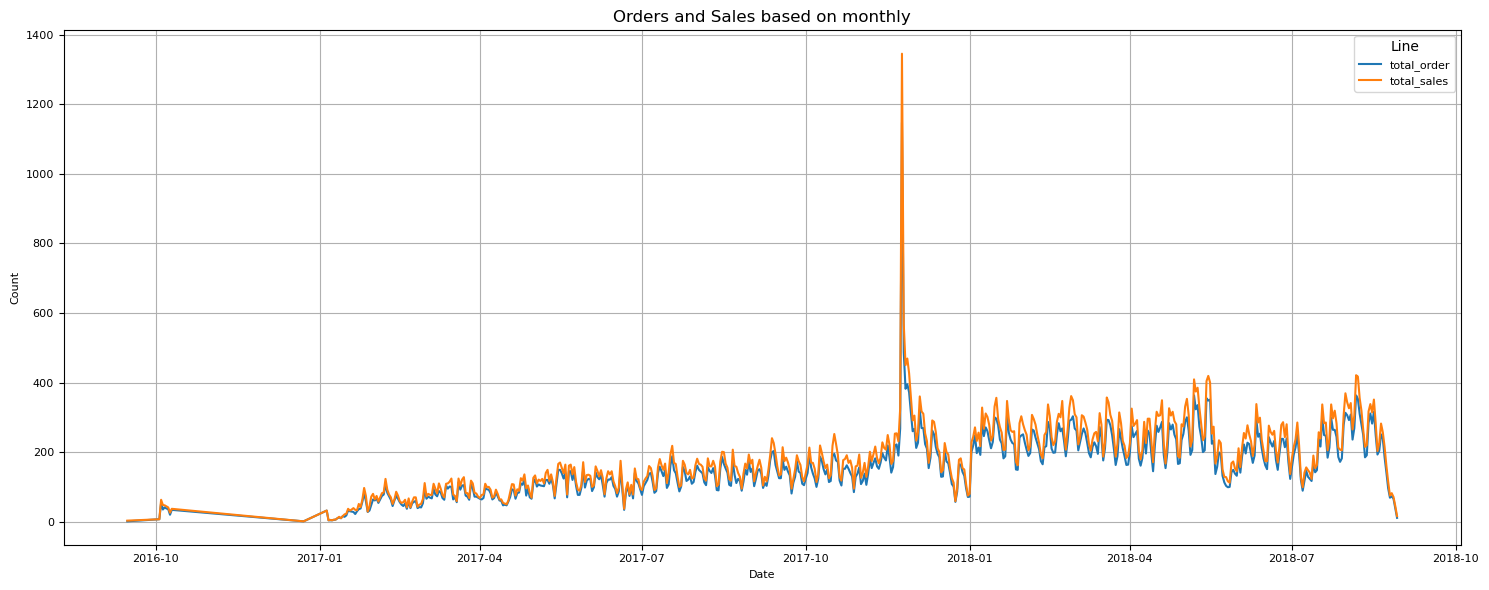

In [95]:
# Daily Order Trend Analysis
# Selecting relevant columns
def daily_ord_sal(dataframe):
    daily_order_trend = dataframe.copy()

    # Converting timestamp to date only
    daily_order_trend['order_purchase_timestamp'] = daily_order_trend['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
    daily_order_trend['order_purchase_timestamp'] = pd.to_datetime(daily_order_trend['order_purchase_timestamp'])

    # Grouping the count of products by day of purchase
    daily_order_trend = daily_order_trend.groupby('order_purchase_timestamp')['order_id'].size().reset_index(name='total')

    # Set index
    daily_order_trend = daily_order_trend.set_index('order_purchase_timestamp')
    
    # Displaying the daily order trend analysis
    daily_order_trend = daily_order_trend[:'2018-08']
    return daily_order_trend

daily_order_trend = daily_ord_sal(order_date_info)
daily_sales_trend = daily_ord_sal(sales_date_info)
daily_order_sales = pd.merge(daily_order_trend[['total']], daily_sales_trend[['total']], left_index=True, right_index=True, suffixes=('_order', '_sales')).reset_index()

# Melt DataFrame
df_melted = pd.melt(daily_order_sales, id_vars='order_purchase_timestamp', var_name='line', value_name='y')
df_melted

# Create line plots
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=df_melted, x='order_purchase_timestamp', y='y', hue='line')

# Adding axis label and title
plt.title('Orders and Sales based on monthly')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='both', labelsize=8)

plt.grid(True)
plt.tight_layout()

plt.legend(title='Line', fontsize=8)
plt.show()


In [184]:
daily_order_sales

order_purchase_timestamp  total_order  total_sales
0                 2016-09-15            1            3
1                 2016-10-03            7            7
2                 2016-10-04           54           63
3                 2016-10-05           35           48
4                 2016-10-06           41           47
..                       ...          ...          ...
607               2018-08-25           69           75
608               2018-08-26           73           82
609               2018-08-27           66           71
610               2018-08-28           39           45
611               2018-08-29           11           16

[612 rows x 3 columns]

In [183]:
df_melted

order_purchase_timestamp         line   y
0                  2016-09-15  total_order   1
1                  2016-10-03  total_order   7
2                  2016-10-04  total_order  54
3                  2016-10-05  total_order  35
4                  2016-10-06  total_order  41
...                       ...          ...  ..
1219               2018-08-25  total_sales  75
1220               2018-08-26  total_sales  82
1221               2018-08-27  total_sales  71
1222               2018-08-28  total_sales  45
1223               2018-08-29  total_sales  16

[1224 rows x 3 columns]

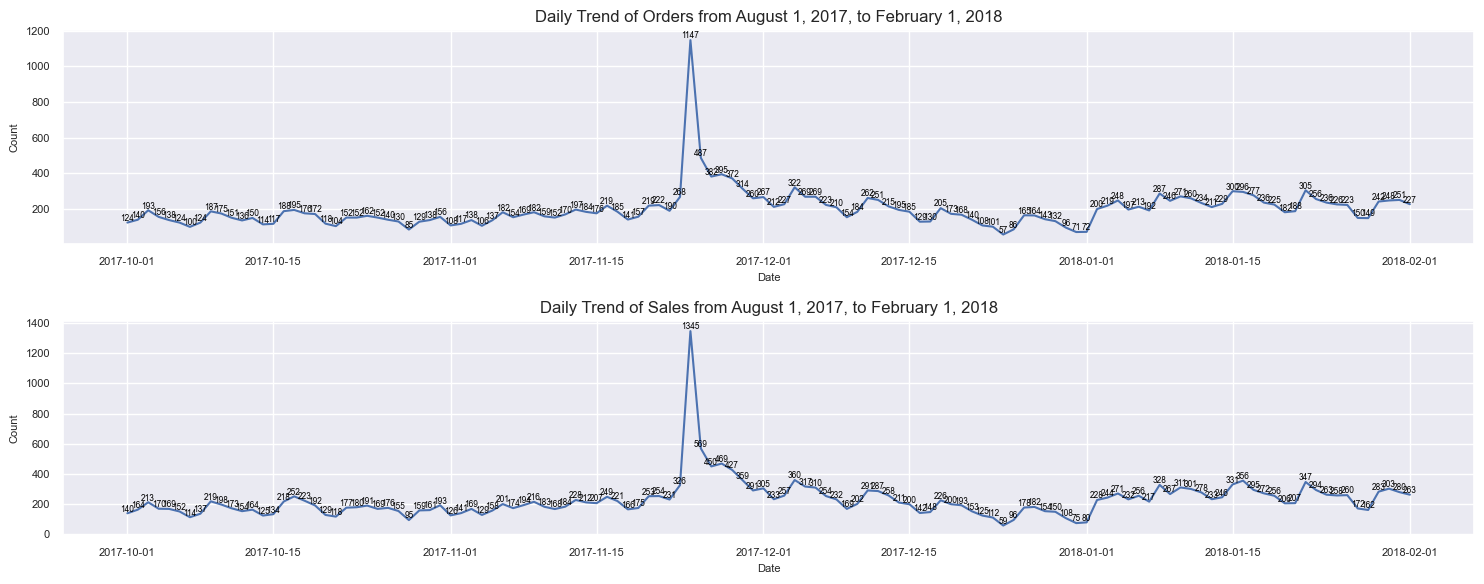

In [96]:
# Set the size of the plot
sns.set(rc={'figure.figsize': (15, 6)})

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
# Filter the DataFrame based on the desired date range
order_trend_filtered = daily_order_trend['2017-10-01':'2018-02-01']

# Plotting the daily order trend within the specified date range
sns.lineplot(x=order_trend_filtered.index, y='total', data=order_trend_filtered, ax=ax[0])
ax[0].set_title("Daily Trend of Orders from August 1, 2017, to February 1, 2018")
ax[0].set_xlabel("Date", fontsize=8)
ax[0].set_ylabel('Count', fontsize=8)
ax[0].tick_params(axis='both', labelsize=8)

# Adding labels to each data point
for idx, row in order_trend_filtered.iterrows():
    ax[0].annotate(f"{row['total']:.0f}", (idx, row['total']), xytext=(0, 3), ha='center', va='center', fontsize=6, color='black', textcoords='offset points')

sales_trend_filtered = daily_sales_trend['2017-10-01':'2018-02-01']
# Plotting the daily order trend within the specified date range
sns.lineplot(x=sales_trend_filtered.index, y='total', data=sales_trend_filtered, ax=ax[1])
ax[1].set_title("Daily Trend of Sales from August 1, 2017, to February 1, 2018")
ax[1].set_xlabel("Date", fontsize=8)
ax[1].set_ylabel('Count', fontsize=8)
ax[1].tick_params(axis='both', labelsize=8)

# Adding labels to each data point
for idx, row in sales_trend_filtered.iterrows():
    ax[1].annotate(f"{row['total']:.0f}", (idx, row['total']), xytext=(0, 3), ha='center', va='center', fontsize=6, color='black', textcoords='offset points')

plt.tight_layout()
plt.show()

In [97]:
daily_order_sales.iloc[339:403, :]

order_purchase_timestamp  total_order  total_sales
339               2017-11-30          260          291
340               2017-12-01          267          305
341               2017-12-02          212          233
342               2017-12-03          227          257
343               2017-12-04          322          360
..                       ...          ...          ...
398               2018-01-28          149          162
399               2018-01-29          242          283
400               2018-01-30          248          303
401               2018-01-31          251          280
402               2018-02-01          227          263

[64 rows x 3 columns]

398	2018-01-28	149	162
399	2018-01-29	242	283
400	2018-01-30	248	303
401	2018-01-31	251	280
402	2018-02-01	227	263

In the daily trend there is a very prominent peak towards November 24 2017. There is a promotion called BlackFriday in Brazil. This Black Friday promo is what makes the trend in November increase significantly and it is likely that in November 2017 most product sales will increase.

Daily sales trend analysis shows significant fluctuations before and after Black Friday on 11-24-2017. Starting in October 2017 until the eve of Black Friday, total sales increased gradually from an average of around 200 to a peak on 11-23-2017 of 336 units. However, on 11-24-2017, the day after Black Friday, there was a drastic spike in daily sales, reaching 34566 units. After this period, daily sales declined again but remained above the pre-Black Friday average.

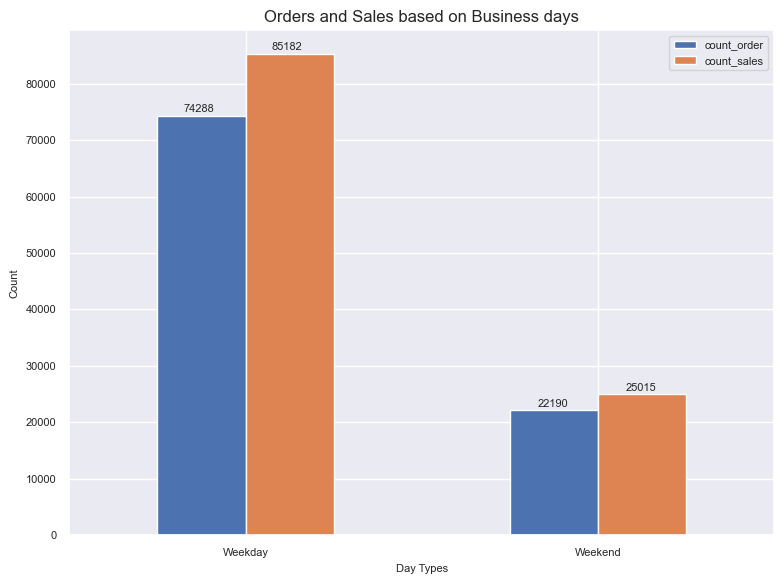

In [98]:
# Adding 'day' and 'hour' columns directly to the DataFrame  
def day_hour(dataframe):
    order_data_with_time = dataframe[['order_id', 'order_purchase_timestamp', 'day_of_week']]
    order_data_with_time['hour'] = order_data_with_time['order_purchase_timestamp'].dt.hour

    # Create a new column 'day_type' using the defined function
    order_data_with_time['day_type'] = order_data_with_time['day_of_week'].apply(mark_weekend_or_weekday)
    return order_data_with_time

# Function to determine whether a day is a weekend or weekday
def mark_weekend_or_weekday(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

order_data_with_time = day_hour(order_date_info)
sales_data_with_time = day_hour(sales_date_info)
order_data_with_time_ = order_data_with_time['day_type'].value_counts().reset_index()
sales_data_with_time_ = sales_data_with_time['day_type'].value_counts().reset_index()
order_sales_with_time = pd.merge(order_data_with_time_, sales_data_with_time_, on='day_type', how='left', suffixes=('_order', '_sales'))
order_sales_with_time


# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

order_sales_with_time.plot(kind='bar', x='day_type', title='Orders and Sales based on Business days', ax=ax)
ax.set_ylabel('Count', fontsize=8)
ax.set_xlabel('Day Types', fontsize=8)
ax.tick_params(axis='both', labelsize=8)
ax.tick_params(axis='x', rotation=0)

# Label bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(30, 0),  # 3 points vertical offset
                textcoords="offset points",
                fontsize=8,
                ha='center', va='bottom')

plt.legend(fontsize=8)
plt.tight_layout()
plt.show()




Order data shows that the majority of orders were placed on weekdays, amounting to 74228, while the number of orders on weekends reached 22.190. This shows that ordering activity tends to be higher on weekdays than on weekends.

In [99]:
sales_data_with_time

order_id order_purchase_timestamp day_of_week  \
0       e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33      Monday   
1       53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37     Tuesday   
2       47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   Wednesday   
3       949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06    Saturday   
4       ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39     Tuesday   
...                                  ...                      ...         ...   
110835  63943bddc261676b46f01ca7ac2f7bd8      2018-02-06 12:58:58     Tuesday   
110836  83c1379a015df1e13d02aae0204711ab      2017-08-27 14:46:43      Sunday   
110837  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27      Monday   
110838  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27      Monday   
110839  66dea50a8b16d9b4dee7af250b4be1a5      2018-03-08 20:57:30    Thursday   

        hour day_type  
0         10  Weekday  
1         20  Weekday  
2          8  Weekday  
3         19  Weekend  
4         21  Weekday  
...      ...      ...  
110835    12  Weekday  
110836    14  Weekend  
110837    21  Weekday  
110838    21  Weekday  
110839    20  Weekday  

[110197 rows x 5 columns]

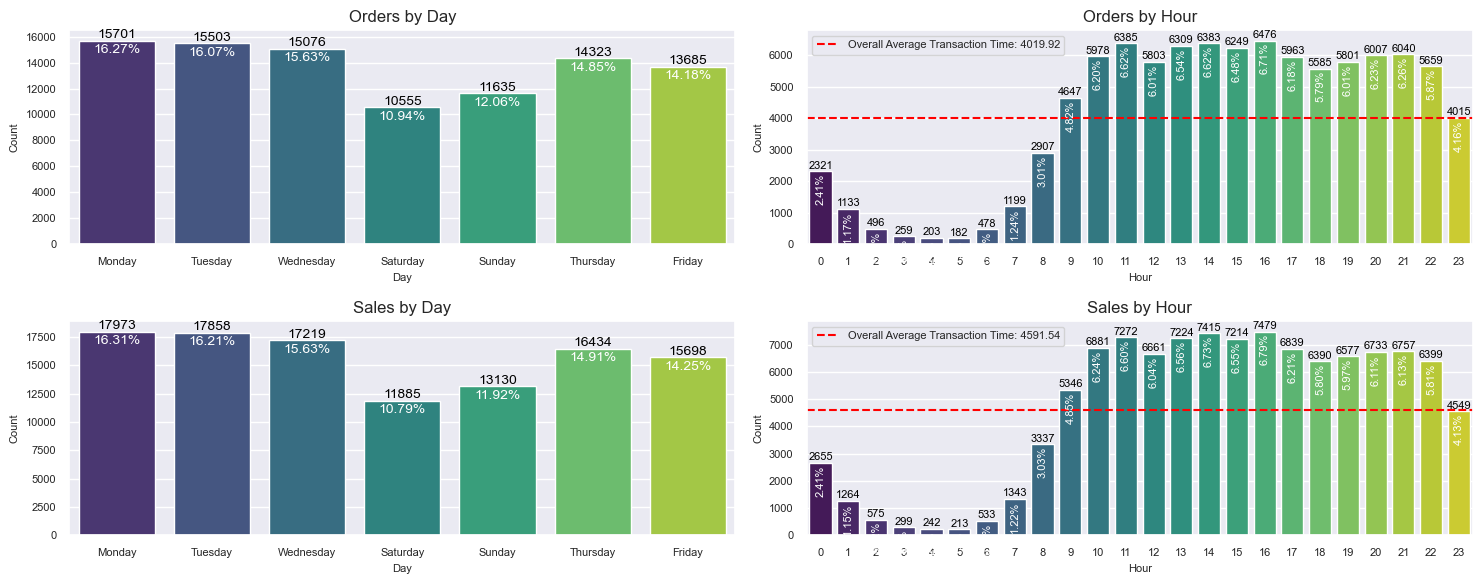

In [100]:
# Visualizing the Best Day and Hour of Orders
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# ORDERS
# Best Day
sns.countplot(x='day_of_week', data=order_data_with_time, palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Orders by Day')
ax[0, 0].set_xlabel('Day', fontsize=8)
ax[0, 0].set_ylabel('Count', fontsize=8)
ax[0, 0].tick_params(axis='both', labelsize=8)

# Adding count labels
for p in ax[0, 0].patches:
    ax[0, 0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 4), ha='center', va='center', fontsize=10, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[0, 0].patches:
    ax[0, 0].annotate(f"{(p.get_height() / len(order_data_with_time) * 100):.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, -9), ha='center', fontsize=10, color='white', textcoords='offset points')

# Best Hour
sns.countplot(x='hour', data=order_data_with_time, palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Orders by Hour')
ax[0, 1].set_xlabel('Hour', fontsize=8)
ax[0, 1].set_ylabel('Count', fontsize=8)
ax[0, 1].tick_params(axis='both', labelsize=8)

# Adding count labels
for p in ax[0, 1].patches:
    ax[0, 1].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 4), ha='center', va='center', fontsize=8, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[0, 1].patches:
    ax[0, 1].annotate(f"{(p.get_height() / len(order_data_with_time) * 100):.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, -23), ha='center', fontsize=8, rotation=90, color='white', textcoords='offset points')
    
ch = order_data_with_time['hour'].value_counts().to_frame()
overall_average_transaction_hours = ch['count'].sum() / len(ch)

# Add horizontal line for overall average transaction by hour
ax[0,1].axhline(y=overall_average_transaction_hours, color='red', linestyle='--', label=f'Overall Average Transaction Time: {overall_average_transaction_hours:.2f}')
ax[0,1].legend(fontsize=8)

# SALES
# Best Day
sns.countplot(x='day_of_week', data=sales_data_with_time, palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Sales by Day')
ax[1, 0].set_xlabel('Day', fontsize=8)
ax[1, 0].set_ylabel('Count', fontsize=8)
ax[1, 0].tick_params(axis='both', labelsize=8)

# Adding count labels
for p in ax[1, 0].patches:
    ax[1, 0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 4), ha='center', va='center', fontsize=10, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[1, 0].patches:
    ax[1, 0].annotate(f"{(p.get_height() / len(sales_data_with_time) * 100):.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, -9), ha='center', fontsize=10, color='white', textcoords='offset points')

# Best Hour
sns.countplot(x='hour', data=sales_data_with_time, palette='viridis', ax=ax[1, 1])
ax[1, 1].set_title('Sales by Hour')
ax[1, 1].set_xlabel('Hour', fontsize=8)
ax[1, 1].set_ylabel('Count', fontsize=8)
ax[1, 1].tick_params(axis='both', labelsize=8)

# Adding count labels
for p in ax[1, 1].patches:
    ax[1, 1].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(0, 4), ha='center', va='center', fontsize=8, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[1, 1].patches:
    ax[1, 1].annotate(f"{(p.get_height() / len(sales_data_with_time) * 100):.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, -23), ha='center', fontsize=8, rotation=90, color='white', textcoords='offset points')
    
ch = sales_data_with_time['hour'].value_counts().to_frame()
overall_average_transaction_hours_ = ch['count'].sum() / len(ch)

# Add horizontal line for overall average transaction by hour
ax[1, 1].axhline(y=overall_average_transaction_hours_, color='red', linestyle='--', label=f'Overall Average Transaction Time: {overall_average_transaction_hours_:.2f}')
ax[1, 1].legend(fontsize=8)

plt.tight_layout()
plt.show()


In [101]:
sales_data_with_time['hour'].value_counts().sort_index()

hour
0     2655
1     1264
2      575
3      299
4      242
5      213
6      533
7     1343
8     3337
9     5346
10    6881
11    7272
12    6661
13    7224
14    7415
15    7214
16    7479
17    6839
18    6390
19    6577
20    6733
21    6757
22    6399
23    4549
Name: count, dtype: int64

Order data shows significant variations in order quantities by day and hour. Monday had the highest number of orders with 15.701 orders, followed by Tuesday (15.503 orders) and Wednesday (15.076 orders). Meanwhile, the number of orders at the weekend showed a downward trend, with the lowest number of orders occurring on Saturday (10.555 orders) and Sunday (11.635 orders). On an hourly scale, the average customer shops from 9 am to 11 pm, peak orders occur between 11 am to 4 pm, where 4 pm is the highest peak with 6,675 orders. This shows that customers tend to choose to place orders during these hours.

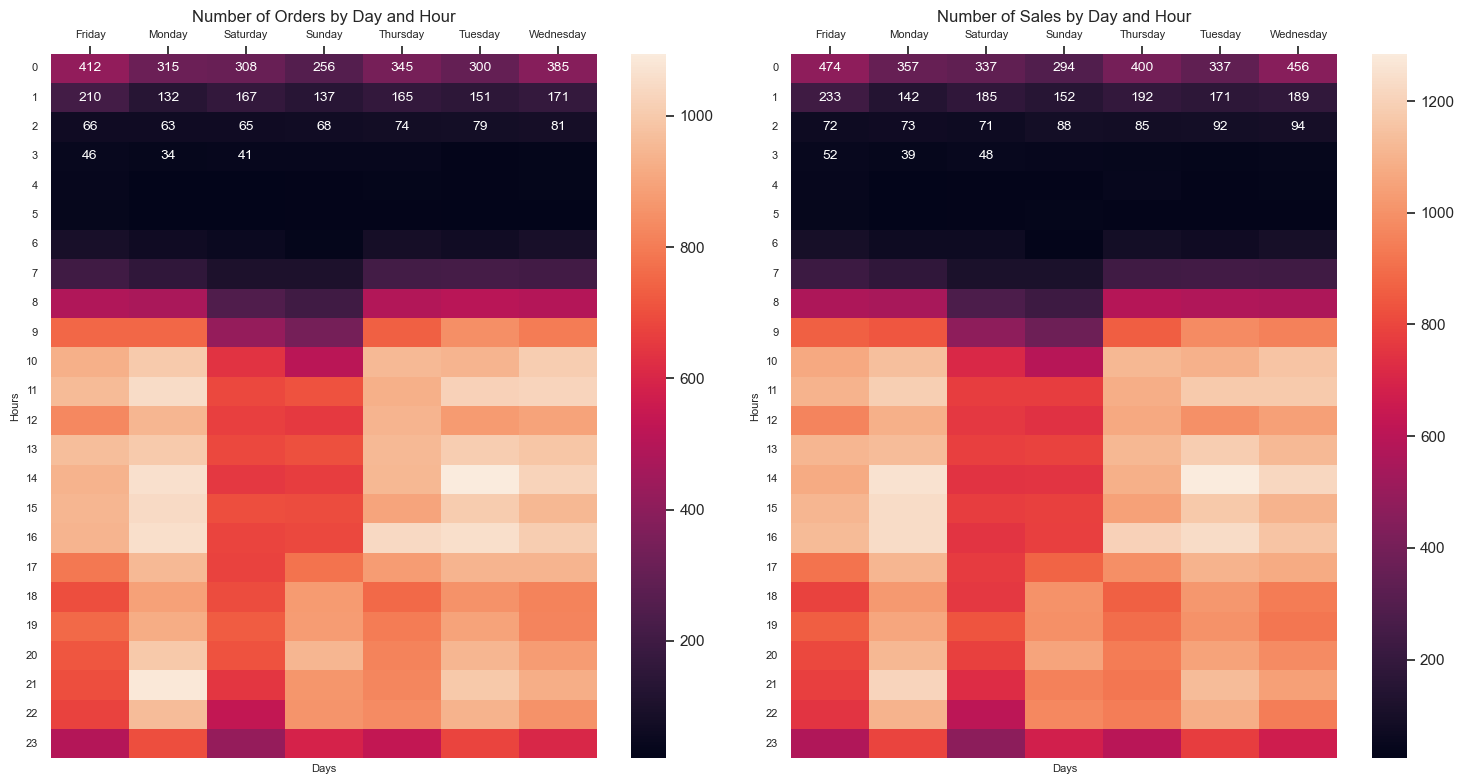

In [102]:
import seaborn as sns

# Grouping by day and hour and creating a pivot table
def heatmap(dataframe):
    heatmap_data = (
        dataframe.groupby(['hour', 'day_of_week'])['day_of_week']
        .size()
        .reset_index(name='total')
        .pivot_table(values='total', index='hour', columns='day_of_week')
    )
    return heatmap_data

order_heatmap_data = heatmap(order_data_with_time)
sales_heatmap_data = heatmap(sales_data_with_time)

# Plotting the heatmap
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Orders
sns.heatmap(order_heatmap_data, annot=True, fmt='.0f', annot_kws={"fontsize": 10}, ax=ax[0])
ax[0].set_title('Number of Orders by Day and Hour')
ax[0].set_xlabel('Days', fontsize=8)
ax[0].set_ylabel('Hours', fontsize=8)
ax[0].tick_params(axis='both', labelsize=8)
ax[0].tick_params(axis='x', rotation=0)
ax[0].tick_params(axis='y', rotation=0)
plt.sca(ax[0])
plt.gca().xaxis.tick_top()

# Sales
sns.heatmap(sales_heatmap_data, annot=True, fmt='.0f', annot_kws={"fontsize": 10}, ax=ax[1])
ax[1].set_title('Number of Sales by Day and Hour')
ax[1].set_xlabel('Days', fontsize=8)
ax[1].set_ylabel('Hours', fontsize=8)
ax[1].tick_params(axis='both', labelsize=8)
ax[1].tick_params(axis='x', rotation=0)
ax[1].tick_params(axis='y', rotation=0)
plt.sca(ax[1])
plt.gca().xaxis.tick_top()

plt.tight_layout()
plt.show()


In [103]:
order_heatmap_data

day_of_week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
hour                                                                       
0             412.0   315.0     308.0   256.0     345.0    300.0      385.0
1             210.0   132.0     167.0   137.0     165.0    151.0      171.0
2              66.0    63.0      65.0    68.0      74.0     79.0       81.0
3              46.0    34.0      41.0    41.0      38.0     28.0       31.0
4              39.0    21.0      25.0    27.0      30.0     28.0       33.0
5              35.0    22.0      23.0    26.0      28.0     24.0       24.0
6              91.0    64.0      51.0    30.0      82.0     69.0       91.0
7             203.0   157.0     102.0   102.0     211.0    216.0      208.0
8             487.0   471.0     245.0   202.0     495.0    510.0      497.0
9             754.0   752.0     421.0   341.0     736.0    845.0      798.0
10            928.0   999.0     635.0   513.0     956.0    940.0     1007.0
11            960.0  1052.0     687.0   705.0     928.0   1023.0     1030.0
12            828.0   944.0     667.0   653.0     940.0    874.0      897.0
13            968.0  1000.0     686.0   701.0     953.0   1011.0      990.0
14            937.0  1063.0     650.0   660.0     951.0   1095.0     1027.0
15            948.0  1047.0     700.0   696.0     901.0   1005.0      952.0
16            943.0  1060.0     676.0   688.0    1042.0   1059.0     1008.0
17            791.0   954.0     674.0   777.0     881.0    943.0      943.0
18            697.0   891.0     693.0   875.0     759.0    852.0      818.0
19            757.0   920.0     729.0   881.0     798.0    894.0      822.0
20            714.0   998.0     708.0   944.0     816.0    946.0      881.0
21            700.0  1083.0     645.0   863.0     826.0    996.0      927.0
22            675.0   962.0     535.0   858.0     835.0    939.0      855.0
23            496.0   697.0     422.0   591.0     533.0    676.0      600.0

Based on the heatmap above, it can be seen that the highest orders occurred on Tuesday at 14 o'clock, namely 1095 orders.

#### [DONE] 3. Which products dominate sales and generate the greatest profits?


In [104]:
# Number of sales for each category
sales_per_category = df.groupby('product_category_name')['order_id'].size().reset_index(name='total_sales')

# Number of revenue for each category
revenue_per_category = df.groupby('product_category_name')['payment_value'].sum().reset_index(name='total_revenue')

# Merge sales and revenue
sales_revenue_category = pd.merge(sales_per_category, revenue_per_category, on='product_category_name', how='left')
sales_revenue_category

product_category_name  total_sales  total_revenue
0   Agro Industry And Commerce          206       76203.30
1             Air Conditioning          289       59854.55
2                          Art          197       27485.53
3        Arts And Craftmanship           24        2184.14
4                        Audio          362       56255.32
..                         ...          ...            ...
67      Tablets Printing Image           83        8754.61
68                   Telephony         4430      379202.62
69                        Toys         4030      547061.06
70                     Unknown         1537      197695.69
71               Watches Gifts         5859     1264333.12

[72 rows x 3 columns]

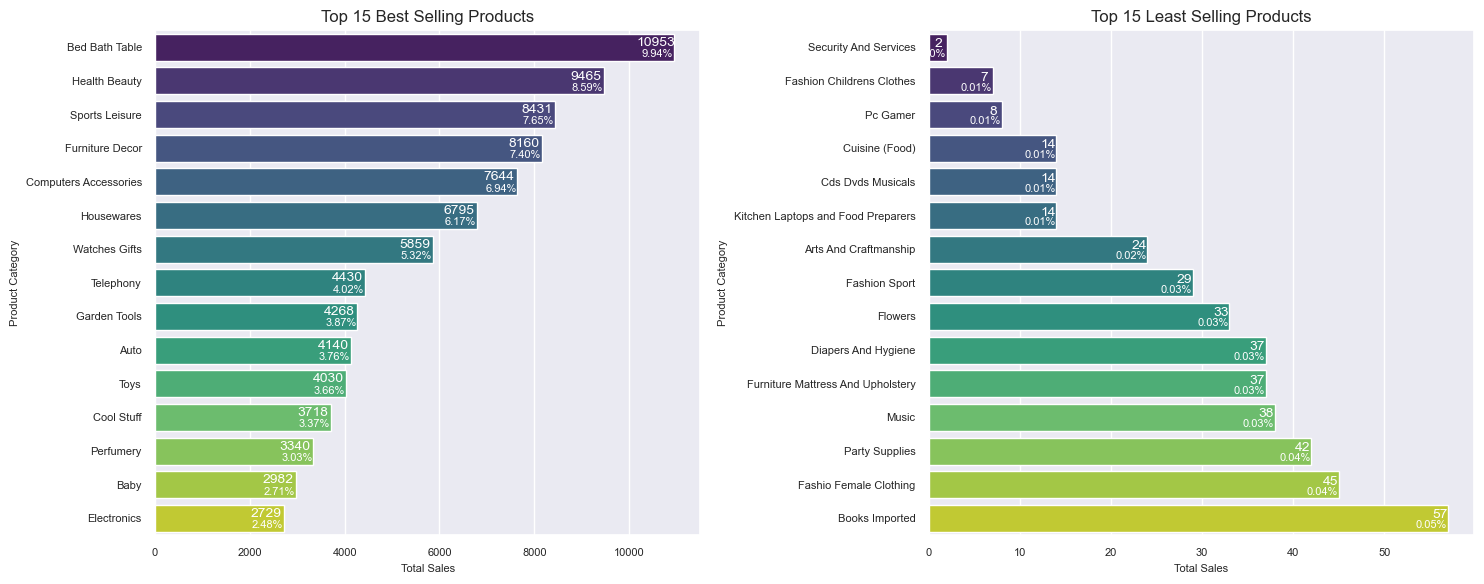

In [105]:
# Multiple plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Top 15 products by sales
top_selling_products = sales_revenue_category.sort_values(by='total_sales', ascending=False).iloc[:15, :]
sns.barplot(x='total_sales', y='product_category_name', data=top_selling_products, palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 Best Selling Products')
ax[0].set_xlabel('Total Sales', fontsize=8)
ax[0].set_ylabel('Product Category', fontsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

for p in ax[0].patches:
    ax[0].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(-13, 1), ha='center', fontsize=10, color='white', textcoords='offset points')
    
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / sales_revenue_category.total_sales.sum()) * 100:.2f}%', xy=(p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(-12, -5), textcoords='offset points', ha='center', va='center', color='white', fontsize=8)

# Bottom 15 products by sales
bottom_selling_products = sales_revenue_category.sort_values(by='total_sales', ascending=True).iloc[:15, :]
sns.barplot(x='total_sales', y='product_category_name', data=bottom_selling_products, palette='viridis', ax=ax[1])
ax[1].set_title('Top 15 Least Selling Products')
ax[1].set_xlabel('Total Sales', fontsize=8)
ax[1].set_ylabel('Product Category', fontsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(-6, 0), ha='center', fontsize=10, color='white', textcoords='offset points')
    
for p in ax[1].patches:
    ax[1].annotate(f'{(p.get_width() / sales_revenue_category.total_sales.sum()) * 100:.2f}%', xy=(p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(-12, -5), textcoords='offset points', ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


The graph above identifies the 15 most and least popular products that customers order. Within the 15 most popular products, the “Bed & Bath” category dominated by recording 10.953 sales, equivalent to 9.94% of total sales, reflecting the high popularity of products in this category. Followed by the "Health & Beauty" category with sales of 9.465 (8.59%), as well as "Sports & Leisure" and "Furniture & Decoration" with sales of 8.431 (7.65%) and 8.160 (7.40%), respectively. Of the top 15 products, seven of them had more than 5.000 purchases or at least more than 5% of total sales, such as Computer Accessories with 7.644 purchases (6.94%), Household Appliances with 6.795 purchases (6.17%), and Watches Prize Hand with 5.859 buy-ins (5.32%). Meanwhile, other products recorded sales of under 5.000 or less than 5% of total sales, such as Telephones, Park Tolls, Automotive, Toys, Cool Stuff, Perfume, Baby Equipment and Electronics.

The 15 products with the lowest sales saw sales of no more than 60 units, with the lowest being Security And Services which only achieved 2 sales, followed by "Children's Fashion Clothing" with 7 units, and "Pc Gamer" with 8 units. Other products include " Cds Dvds Musicals" (14 units), "Kitchen Laptop and Food Preparers" (14 units), "Cuisine" (14 units), "Arts And Craftmanship" (24 units), "Fashion Sport" (29 units), " Flowers” (33 units), “Diapers and Hygiene” (37 units), “Mattresses and Furniture Upholstery” (37 units), “Music” (38 units), “Party Supplies” (42 units), “Women's Fashion” (45 units), and finally "Imported Books" (57 units).

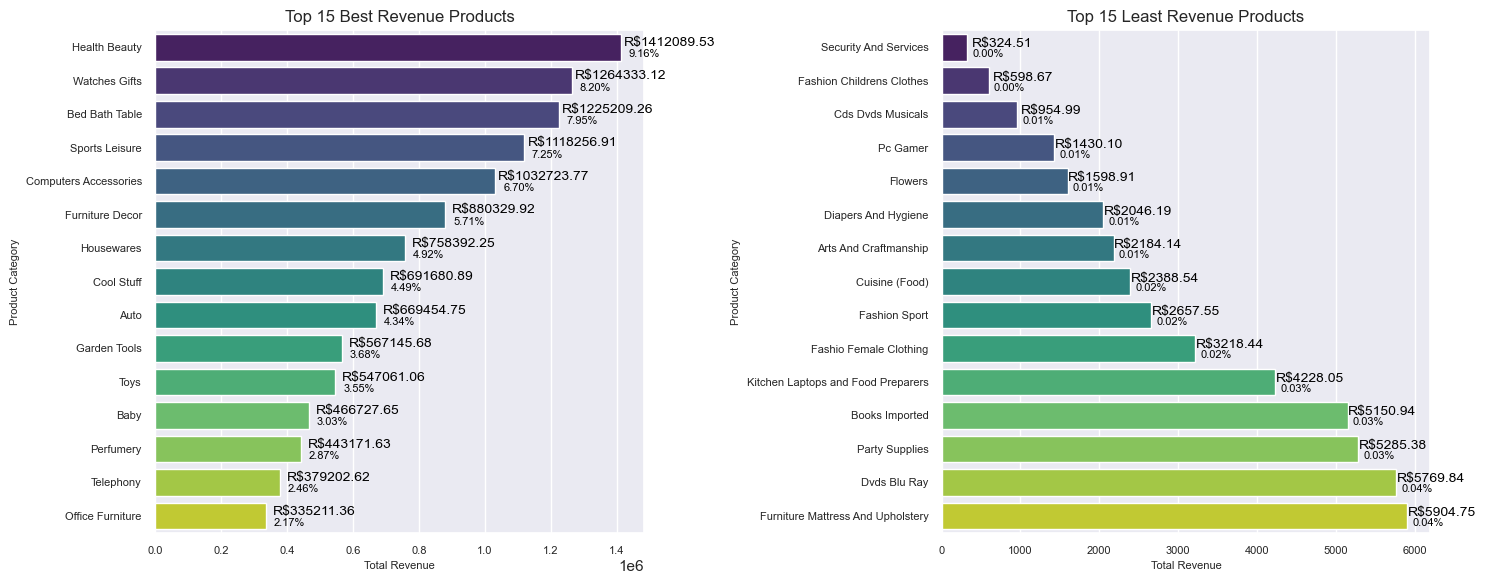

In [106]:
# Multiple plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Top 15 product categories by revenue
top_selling_products = sales_revenue_category.sort_values(by='total_revenue', ascending=False).iloc[:15, :]
sns.barplot(x='total_revenue', y='product_category_name', data=top_selling_products, palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 Best Revenue Products')
ax[0].set_xlabel('Total Revenue', fontsize=8)
ax[0].set_ylabel('Product Category', fontsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

for p in ax[0].patches:
    ax[0].annotate(f"R${p.get_width():.2f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(35, 1), ha='center', fontsize=10, color='black', textcoords='offset points')
    
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / sales_revenue_category.total_revenue.sum()) * 100:.2f}%', xy=(p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(17, -5), textcoords='offset points', ha='center', va='center', color='black', fontsize=8)

# Bottom 15 product categories by revenue
bottom_selling_products = sales_revenue_category.sort_values(by='total_revenue', ascending=True).iloc[:15, :]
sns.barplot(x='total_revenue', y='product_category_name', data=bottom_selling_products, palette='viridis', ax=ax[1])
ax[1].set_title('Top 15 Least Revenue Products')
ax[1].set_xlabel('Total Revenue', fontsize=8)
ax[1].set_ylabel('Product Category', fontsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

for p in ax[1].patches:
    ax[1].annotate(f"R${p.get_width():.2f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(25, 0), ha='center', fontsize=10, color='black', textcoords='offset points')
    
for p in ax[1].patches:
    ax[1].annotate(f'{(p.get_width() / sales_revenue_category.total_revenue.sum()) * 100:.2f}%', xy=(p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(15, -5), textcoords='offset points', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()


Data analysis shows the 15 products with the highest revenues in Brazilian dollars. The "Beauty Health" category ranked first with total earnings of 1,412,089.53 Brazilian dollars, followed by "Watch Gifts" with 1,264,333.12 Brazilian dollars, and "Bed Bath Table" with 1,225,209.26 Brazilian dollars . Other products include “Sports Leisure” (1,118,256.91 Brazilian dollars), “Computer Accessories” (1,032,723.77 Brazilian dollars), and “Furniture Decoration” (880,329.92 Brazilian dollars), which contributed significantly to revenue company.

The data shows the 15 products with the lowest revenues in R$ (Brazilian real). The “Security and Service” category had the lowest revenue with a total of only R$324.51, followed by “Children's Fashion Clothing” with R$598.67, and “Cds Dvds Musicals” with R$954.99. Meanwhile, the product with the highest revenue on this list is "Mattresses and Furniture Upholstery" with total revenue of R$ 5904.75.5.5.

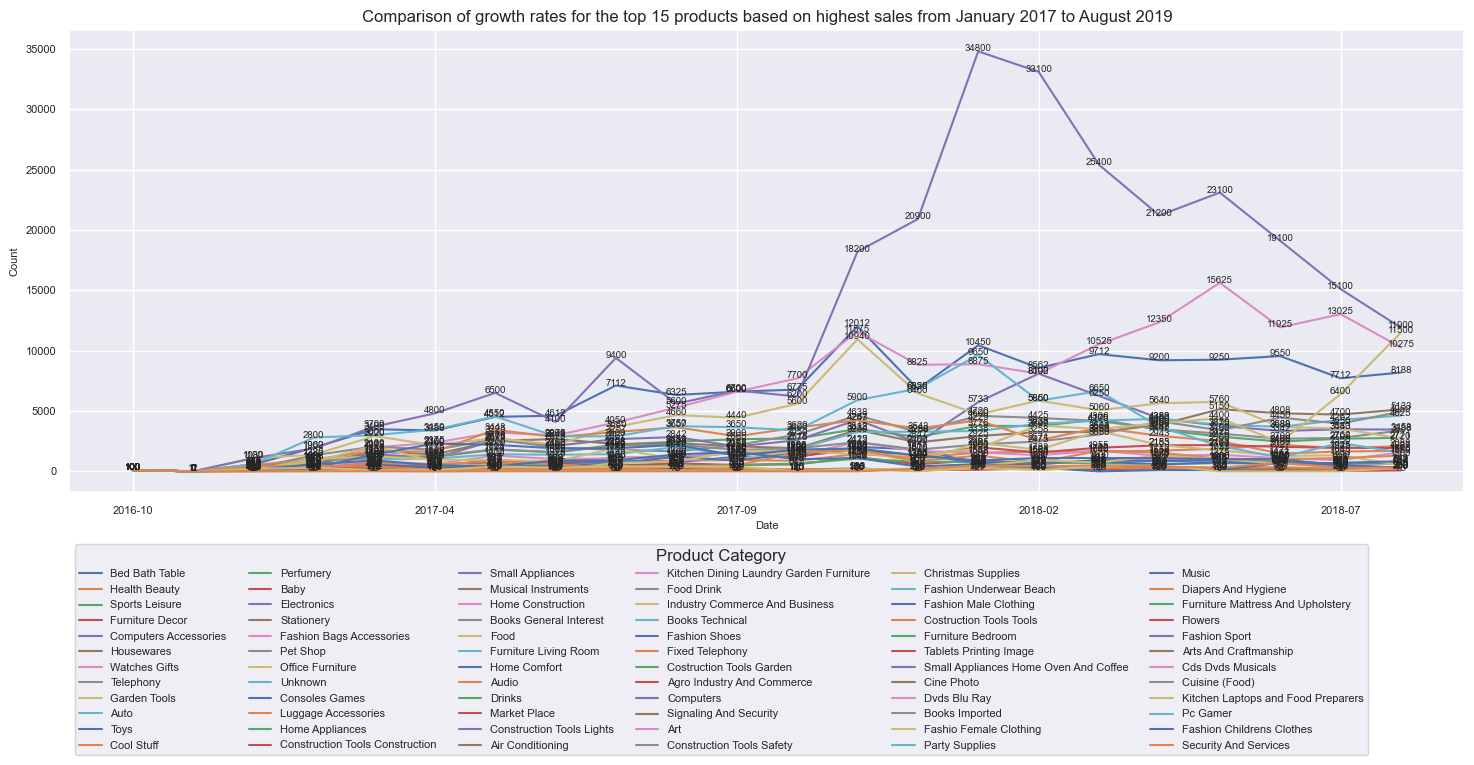

In [107]:
# Comparison of growth rates for the top 15 products based on highest sales from January 2017 to August 2019
# Extracting relevant columns for analysis
sales_data = df.loc[:, ['order_purchase_timestamp', 'seller_id', 'product_category_name']]

# Converting datetime to year and month
sales_data['order_purchase_timestamp'] = sales_data['order_purchase_timestamp'].dt.strftime('%Y-%m') 

# Using pivot_table to restructure the DataFrame as per requirement
pivot_table = sales_data.pivot_table(index='order_purchase_timestamp', columns='product_category_name', values='product_category_name', aggfunc='count', fill_value=0)

# Sorting columns based on total sales per product category
sorted_products = df['product_category_name'].value_counts().index
pivot_table = pivot_table[sorted_products]

# Displaying DataFrame consisting of top 15 product categories
top_15_products = pivot_table.iloc[1:, :]

# Comparison of sales from the code above
sns.set(rc={'figure.figsize': (18, 6)})

# Normalizing the data for better visualization
normalized_data = top_15_products.div(top_15_products.iloc[0]).mul(100)[:'2018-08']
normalized_data.plot(title='Comparison of growth rates for the top 15 products based on highest sales from January 2017 to August 2019')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Adding value labels to data points
for column in normalized_data.columns:
    for i, value in enumerate(normalized_data[column]):
        plt.annotate(f'{value:.0f}', (i, value), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=7)

plt.legend(title='Product Category', bbox_to_anchor=(-0, -0.1), loc='upper left', fontsize=8, ncol=6)
plt.show()


In [108]:
top_15_products = pivot_table.iloc[1:, :15]
top_15_products

product_category_name     Bed Bath Table  Health Beauty  Sports Leisure  \
order_purchase_timestamp                                                  
2016-10                                8             40              17   
2016-12                                0              0               0   
2017-01                               46             82              74   
2017-02                              157            154             149   
2017-03                              279            208             190   
2017-04                              271            180             203   
2017-05                              361            284             305   
2017-06                              369            254             269   
2017-07                              569            308             375   
2017-08                              506            352             417   
2017-09                              528            376             453   
2017-10                              542            350             462   
2017-11                              961            573             597   
2017-12                              546            460             484   
2018-01                              836            619             642   
2018-02                              685            650             637   
2018-03                              777            656             732   
2018-04                              736            685             586   
2018-05                              740            751             489   
2018-06                              764            875             419   
2018-07                              617            770             460   
2018-08                              655            835             471   

product_category_name     Furniture Decor  Computers Accessories  Housewares  \
order_purchase_timestamp                                                       
2016-10                                65                     12          12   
2016-12                                 0                      0           0   
2017-01                               177                     31          28   
2017-02                               257                    100          69   
2017-03                               315                    171         196   
2017-04                               191                    132         169   
2017-05                               271                    309         302   
2017-06                               230                    254         321   
2017-07                               314                    320         271   
2017-08                               426                    341         280   
2017-09                               343                    247         249   
2017-10                               375                    309         229   
2017-11                               767                    512         412   
2017-12                               378                    284         288   
2018-01                               595                    688         351   
2018-02                               422                    971         391   
2018-03                               583                    750         390   
2018-04                               586                    526         462   
2018-05                               597                    453         618   
2018-06                               402                    401         577   
2018-07                               436                    418         564   
2018-08                               430                    415         616   

product_category_name     Watches Gifts  Telephony  Garden Tools  Auto  Toys  \
order_purchase_timestamp                                                       
2016-10                               4          8             5     8    24   
2016-12                               

The following is a comparison of the growth rates of all products with the highest sales. It seems that there are 4 products whose growth is quite interesting compared to other products, namely Electronics, Bed Bath Tables, Garden Tools and Watch Gifts. Electronic products experienced a continuous and quite significant increase from November 2017 to January 2018 then experienced a decline until August 2018. Continuing with Bed Bath Tables, they seemed to have increased even though they fluctuated with the highest growth rate in November 2018. The growth rate for Gardening Tools was visible. It can be seen that all products in November 2017 experienced an increase in sales, this was due to Black Friday.

Electronics experienced growth of up to 11900% in that period or around 119.00 times the initial growth, indicating that demand for electronic products continues to increase. Demand increased in November 2017 until it reached its highest point, namely 34,800% in January 2018. This was caused by several factors, namely in November 2017 there was Black Friday which made all products get discounts including electronic goods such as televisions which gave big discounts. then at the end of 2017 and early 2018 electronics continued to experience growth, it is possible that people will want to buy or replace old electronic goods with new ones.

Bed Bath Table also showed strong growth from 100 to 8188% or around 81.88 times its initial growth, this shows continued consumer interest in high-quality bedding and household furniture products. Factors such as rising incomes and awareness of quality of life may be contributing to this growth.

Gardening Tools, although experiencing more moderate growth from 100 to 2720% or around 27.20 times its initial growth, nevertheless showed a fluctuating increase in demand. This increase may be due to the trend of gardening activities becoming increasingly popular among consumers. The highest growth point was at 10940% on Black Friday.

Gift Watches shows a relatively stable growth pattern from 100 to 10275% or about 102.75 times its initial growth although the trend fluctuates. Even though the growth is not as strong as Electronics or Bed Bath Table, Watches Gift still shows stable market demand for watches and souvenir products. When other products experienced a decline in 2018, Gift Watch products actually experienced growth.

#### [DONE]4. What payment methods are most commonly used by customers?


In [109]:
merge_pymnt = pd.merge(df, payments[['order_id', 'payment_type']], on='order_id', how='left').sort_values(by=['order_purchase_timestamp', 'order_item_id'], ascending=True).drop_duplicates(subset=['customer_id', 'order_purchase_timestamp', 'order_item_id'], keep='first')
# merge_pymnt = pd.merge(df, payments[['order_id', 'payment_type', 'payment_installments']], on='order_id', how='left').sort_values(by=['order_purchase_timestamp', 'order_item_id'], ascending=True).drop_duplicates()
merge_pymnt['payment_type'].fillna('Credit Card', inplace=True)

merge_pymnt.sort_values(by=['order_purchase_timestamp', 'order_item_id'], ascending=True)

order_id                       customer_id  \
35616   bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
35617   bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
35618   bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
107836  3b697a20d9e427646d92567910af6d57  355077684019f7f60a031656bd7262b8   
32926   be5bc2f0da14d8071e2d45451ad119d9  7ec40b22510fdbea1b08921dd39e63d8   
...                                  ...                               ...   
34841   0b223d92c27432930dfe407c6aea3041  e60df9449653a95af4549bbfcb18a6eb   
34842   0b223d92c27432930dfe407c6aea3041  e60df9449653a95af4549bbfcb18a6eb   
36520   168626408cb32af0ffaf76711caae1dc  6e353700bc7bcdf6ebc15d6de16d7002   
80406   03ef5dedbe7492bdae72eec50764c43f  496630b6740bcca28fce9ba50d8a26ef   
101739  35a972d7f8436f405b56e36add1a7140  898b7fee99c4e42170ab69ba59be0a8b   

       order_status order_purchase_timestamp order_approved_at_orders  \
35616     Delivered      2016-09-15 12:16:38      2016-09-15 12:16:38   
35617     Delivered      2016-09-15 12:16:38      2016-09-15 12:16:38   
35618     Delivered      2016-09-15 12:16:38      2016-09-15 12:16:38   
107836    Delivered      2016-10-03 09:44:50      2016-10-06 15:50:54   
32926     Delivered      2016-10-03 16:56:50      2016-10-06 16:03:44   
...             ...                      ...                      ...   
34841     Delivered      2018-08-29 14:18:23      2018-08-29 14:31:07   
34842     Delivered      2018-08-29 14:18:23      2018-08-29 14:31:07   
36520     Delivered      2018-08-29 14:18:28      2018-08-29 14:30:23   
80406     Delivered      2018-08-29 14:52:00      2018-08-29 15:05:22   
101739    Delivered      2018-08-29 15:00:37      2018-08-29 15:10:26   

       order_delivered_carrier_date order_delivered_customer_date  \
35616           2016-11-07 17:11:53           2016-11-09 07:47:38   
35617           2016-11-07 17:11:53           2016-11-09 07:47:38   
35618           2016-11-07 17:11:53           2016-11-09 07:47:38   
107836          2016-10-23 14:02:13           2016-10-26 14:02:13   
32926           2016-10-21 16:33:46           2016-10-27 18:19:38   
...                             ...                           ...   
34841           2018-08-29 15:29:00           2018-08-30 16:24:55   
34842           2018-08-29 15:29:00           2018-08-30 16:24:55   
36520           2018-08-29 18:51:00           2018-08-30 16:52:31   
80406           2018-08-29 20:01:00           2018-08-30 16:36:59   
101739          2018-08-29 16:57:00           2018-08-30 16:23:36   

       order_estimated_delivery_date  order_item_id  \
35616                     2016-10-04              1   
35617                     2016-10-04              2   
35618                     2016-10-04              3   
107836                    2016-10-27              1   
32926                     2016-11-07              1   
...                              ...            ...   
34841                     2018-09-04              1   
34842                     2018-09-04              2   
36520                     2018-09-11              1   
80406                     2018-09-03              1   
101739                    2018-09-05              1   

                               seller_id  ...         customer_city  \
35616   ecccfa2bb93b34a3bf033cc5d1dcdc69  ...  Sao Joaquim Da Barra   
35617   ecccfa2bb93b34a3bf033cc5d1dcdc69  ...  Sao Joaquim Da Barra   
35618   ecccfa2bb93b34a3bf033cc5d1dcdc69  ...  Sao Joaquim Da Barra   
107836  522620dcb18a6b31cd7bdf73665113a9  ...             Sao Paulo   
32926   f09b760d23495ac9a7e00d29b769007c  ...               Panambi   
...                                  ...  ...                   ...   
34841   67bf6941ba2f1fa1d02c375766bc3e53  ...              Curitiba   
34842   67bf6941ba2f1fa1d02c375766bc3e53  ...              Curitiba   
36520   2a84855fd20af891be03bc5924d2b453  ...              Paracatu   
80406   7d7866a99a

In [110]:
merge_pymnt.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at_orders         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
seller_id                        0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_score                     0
payment_value                    0
total_order                      0
total_sales                      0
payment_type                     0
dtype: int64

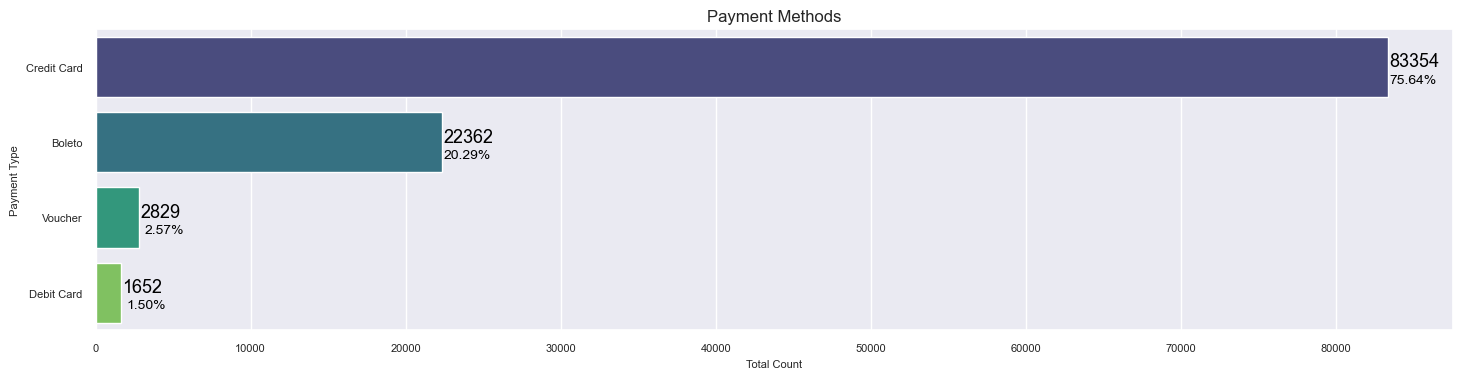

In [111]:
# Payment Methods Analysis
sns.set(rc={'figure.figsize': (15, 4)})

# Plotting count of payment methods
ax = sns.countplot(y='payment_type', data=merge_pymnt, order=merge_pymnt['payment_type'].value_counts().index, palette='viridis')
plt.title("Payment Methods")
plt.xlabel("Total Count", fontsize=8)
plt.ylabel("Payment Type", fontsize=8)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Adding count labels for each payment method
for bar in ax.patches:
    ax.annotate(f"{bar.get_width():.0f}", (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height() / 2), xytext=(1, 4), va='center', fontsize=13, color='black', textcoords='offset points')

# Adding percentage labels for each payment method
for bar in ax.patches:
    ax.annotate(f'{(bar.get_width() / len(merge_pymnt)) * 100:.2f}%', xy=(bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height() / 2), xytext=(18, -9), textcoords='offset points', ha='center', va='center', color='black', fontsize=10)


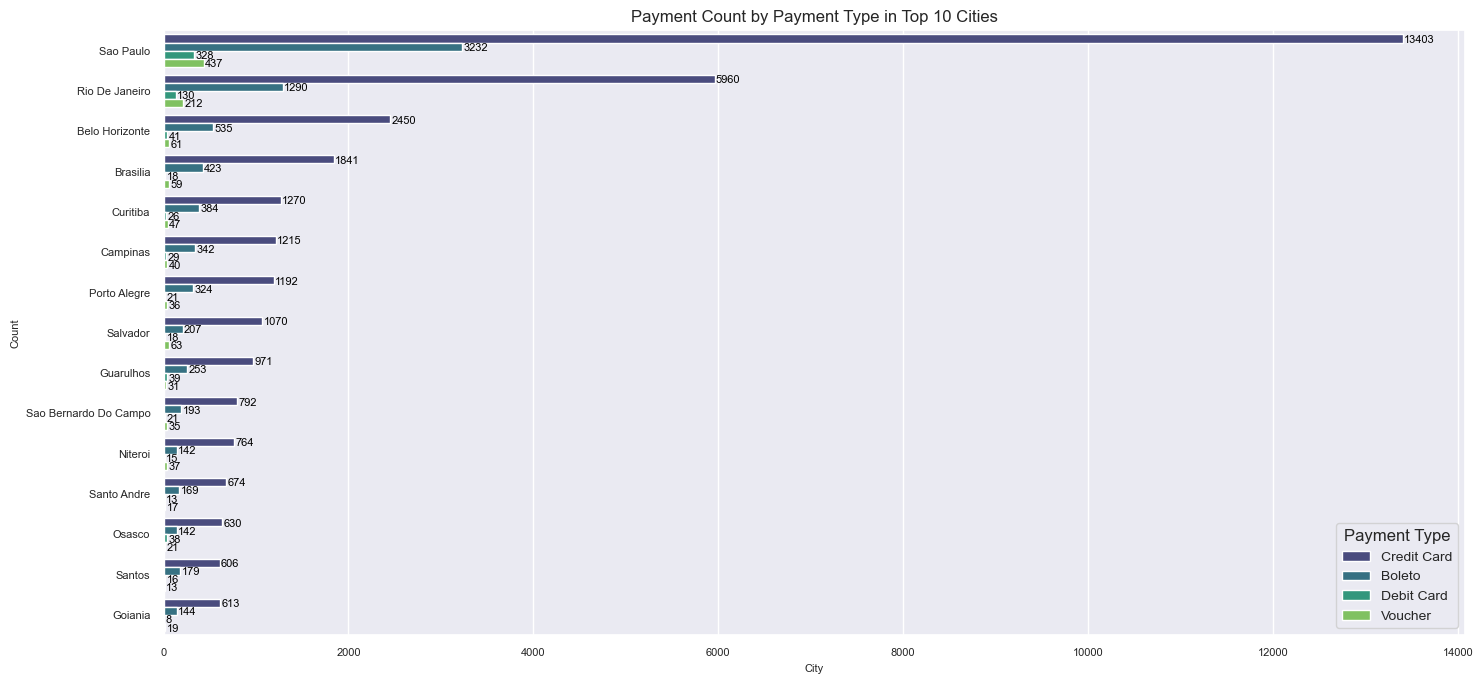

In [112]:
# Payment Analysis by City

# Group by customer city and payment type, then calculate payment counts
city_payment_counts = merge_pymnt.groupby(['customer_city', 'payment_type']).size().unstack()

# Sort cities by total payment counts
top_cities = city_payment_counts.sum(axis=1).sort_values(ascending=False).head(15).index

# Plot
plt.figure(figsize=(15, 7))

ax = sns.countplot(y='customer_city', data=merge_pymnt, hue='payment_type', order=top_cities, palette='viridis')
plt.title('Payment Count by Payment Type in Top 10 Cities')
plt.xlabel('City', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(1, -1), va='center', fontsize=8, color='black', textcoords='offset points')

plt.legend(title='Payment Type', fontsize=10)
plt.tight_layout()
plt.show()


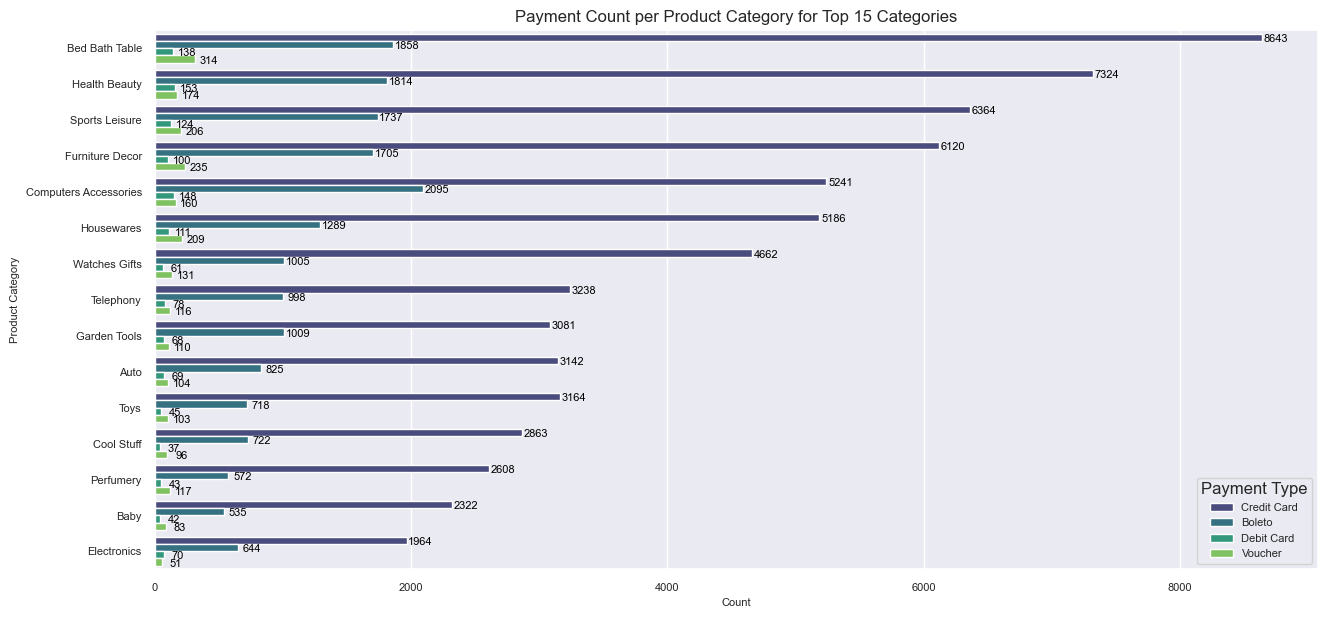

In [113]:
# Product Payment Analysis

# Grouping by 'product_category_name' and 'payment_type', then counting the number of payments
product_payment_counts = merge_pymnt.groupby(['product_category_name', 'payment_type']).size().unstack()

# Sorting products by the highest total payments
sorted_products = product_payment_counts.sum(axis=1).sort_values(ascending=False).head(15).index

# Plotting countplot
plt.figure(figsize=(15, 7))

ax = sns.countplot(y='product_category_name', data=merge_pymnt, hue='payment_type', order=sorted_products, palette='viridis')
plt.title('Payment Count per Product Category for Top 15 Categories')
plt.xlabel('Count', fontsize=8)
plt.ylabel('Product Category', fontsize=8)
plt.tick_params(axis='both', labelsize=8)

# Adding count labels on each p
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(10, -1), ha='center', va='center', fontsize=8, color='black', rotation=0, textcoords='offset points')

plt.legend(title='Payment Type', fontsize=8)
plt.show()


This is why most customers tend to choose a payment system using a credit card to pay for 15 favorite products or in 15 cities with the highest purchases. This can be seen from the graphic data above, where around 75.64% or 83,354 customer transactions from total Olist customers choose to use credit cards. Most likely, the popularity of using credit cards is due to the ease of online transactions, as well as the fact that almost anyone with a credit card can buy goods and pay for them later. Apart from that, the possibility of promotional offers from credit card services is also one of the factors that encourages Olist users to prefer transactions with credit cards.

To capitalize on credit card usage trends, companies may consider collaborating with credit card providers to offer special incentives to customers who choose to pay by credit card. In addition, companies can improve the security and reliability of online payment systems to strengthen customer confidence in using credit cards. Providing clear information about promotional offers available via credit cards can also increase customer preferences for transactions this way. Thus, companies can maximize the use of credit cards as a more popular payment option.

And also strict monitoring of repayment and payment times can help optimize the company's financial flow. It is also important to continuously monitor payment trends and make changes according to customer preferences and changing market conditions.

#### [DONE]5. Which customer regions/cities are the largest markets in terms of order volume?


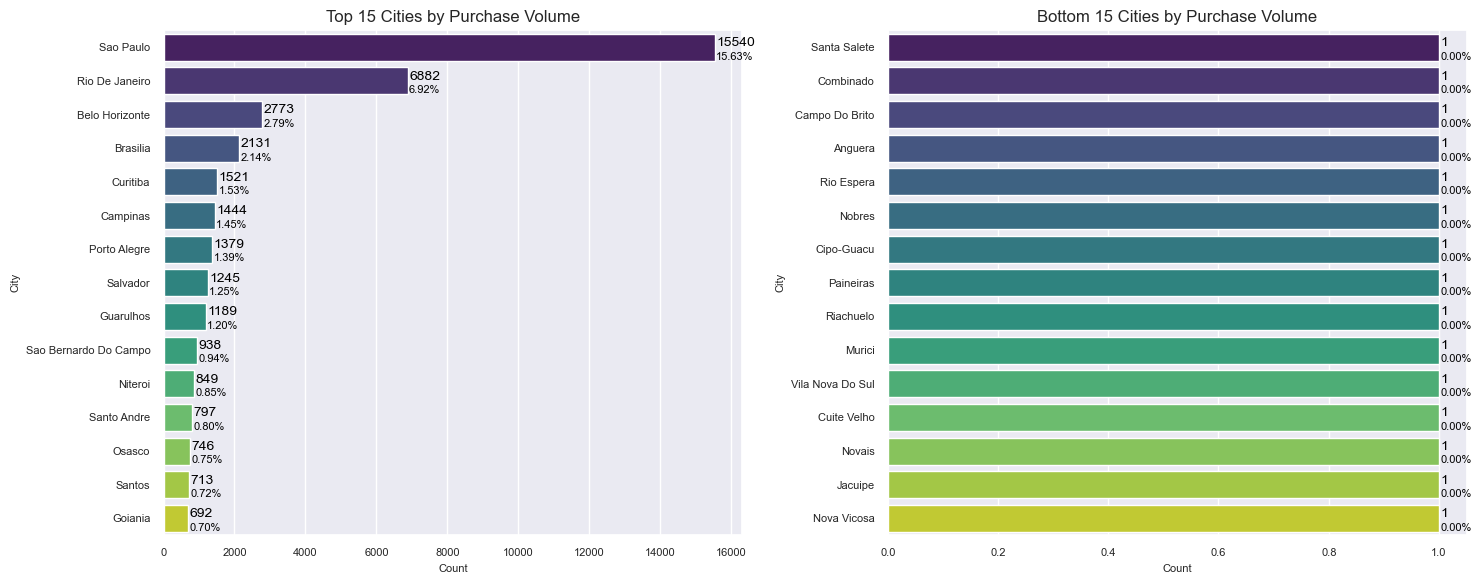

In [114]:
# Identifying the Top Markets by Purchase Volume

# Merge customer data with order data based on customer ID
customer_orders = pd.merge(customers, orders, on='customer_id', how='right')

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Top 15 Cities by Purchase Volume
sns.countplot(y='customer_city', data=customer_orders, order=customer_orders['customer_city'].value_counts().head(15).index, palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 Cities by Purchase Volume')
ax[0].set_xlabel('Count', fontsize=8)
ax[0].set_ylabel('City', fontsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

for p in ax[0].patches:
    ax[0].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(1, 3), va='center', fontsize=10, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / len(customer_orders) * 100):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(1, 3), va='center', fontsize=8, color='black', textcoords='offset points')

# Bottom 15 Cities by Purchase Volume
sns.countplot(y='customer_city', data=customer_orders, order=customer_orders['customer_city'].value_counts().tail(15).index, palette='viridis', ax=ax[1])
ax[1].set_title('Bottom 15 Cities by Purchase Volume')
ax[1].set_xlabel('Count', fontsize=8)
ax[1].set_ylabel('City', fontsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), xytext=(1, 3), va='center', fontsize=10, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[1].patches:
    ax[1].annotate(f'{(p.get_width() / len(customer_orders) * 100):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(1, 3), va='center', fontsize=8, color='black', textcoords='offset points')

plt.tight_layout()
plt.show()


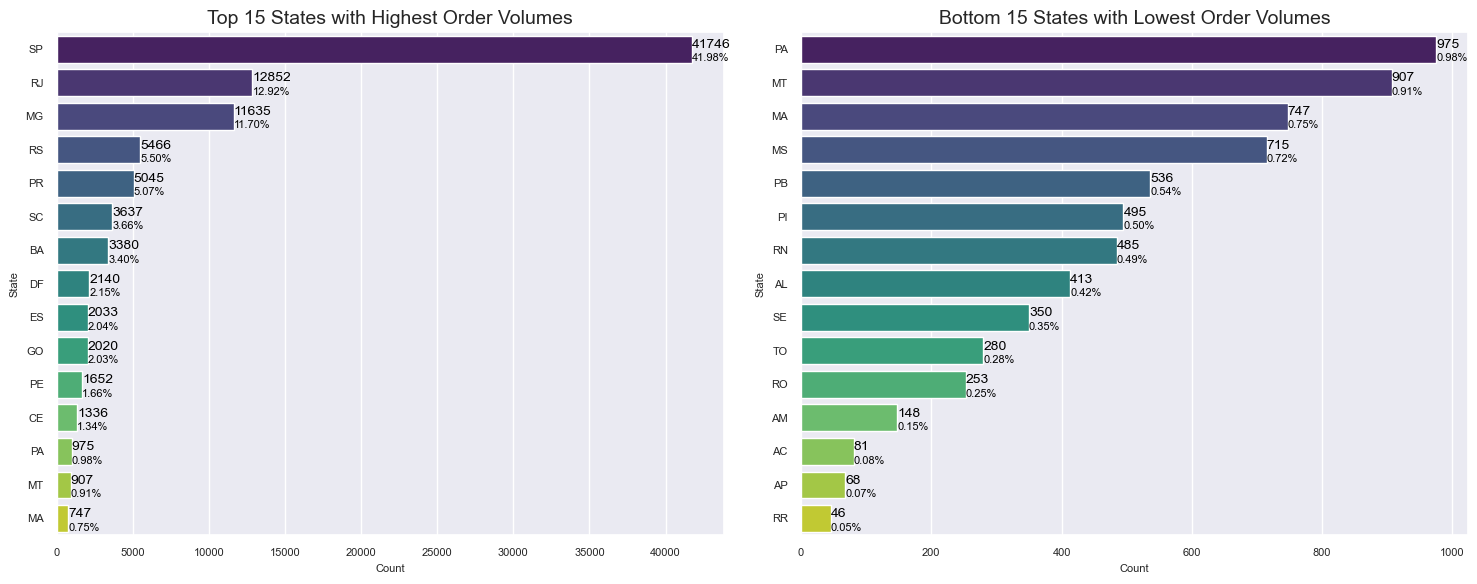

In [115]:
# Plotting the distribution of order counts across different states
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting the top 15 states with the highest order volumes
sns.countplot(y='customer_state', data=customer_orders, order=customer_orders['customer_state'].value_counts().head(15).index, palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 States with Highest Order Volumes', fontsize=14)
ax[0].set_xlabel('Count', fontsize=8)
ax[0].set_ylabel('State', fontsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

# Annotating the number of orders for each state in the first subplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_width():.0f}", (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(0, 3), va='center', fontsize=10, color='black', textcoords='offset points')
    
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / len(customer_orders)* 100):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(0, 3), va='center', fontsize=8, color='black', textcoords='offset points')

# Plotting the bottom 15 states with the lowest order volumes
sns.countplot(y='customer_state', data=customer_orders, order=customer_orders['customer_state'].value_counts().tail(15).index, palette='viridis', ax=ax[1])
ax[1].set_title('Bottom 15 States with Lowest Order Volumes', fontsize=14)
ax[1].set_xlabel('Count', fontsize=8)
ax[1].set_ylabel('State', fontsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

# Annotating the number of orders for each state in the second subplot
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(0, 3), va='center', fontsize=10, color='black', textcoords='offset points')

# Adding percentage labels
for p in ax[1].patches:
    ax[1].annotate(f'{(p.get_width() / len(customer_orders)* 100):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(0, 3), va='center', fontsize=8, color='black', textcoords='offset points')

plt.tight_layout()
plt.show()


It can be observed that the majority of customers come from the state of São Paulo (SP), accounting for approximately 41.98% of the total recorded customers. The states of Rio de Janeiro (RJ) and Minas Gerais (MG) also stand out with 12.92% and 11.70% respectively. However, several other states such as Rio Grande do Sul (RS), Paraná (PR), and Santa Catarina (SC) also made significant contributions of 5.50%, 5.07%, and 3.66% respectively. From a business development perspective, it is necessary to maintain a focus on customers in the most populous states such as São Paulo, while expanding coverage to other states that have growth potential. Tailored marketing strategies and improved customer service can help strengthen market standing in less developed regions.

#### [DONE]6. Which sellers record the highest profits and sales on e-commerce platforms?


In [116]:
# Calculate the number of orders for each seller
# Total combined sales profit for each seller
seller_sales = sell_ord[['order_purchase_timestamp', 'seller_id', 'seller_city', 'seller_state', 'total_sales']].drop_duplicates()
seller_sales = seller_sales.groupby(['seller_id', 'seller_city', 'seller_state'])['total_sales'].sum().reset_index()
# seller_sales[seller_sales['seller_id'] == '7c67e1448b00f6e969d365cea6b010ab'].head(20)
seller_sales.sort_values(by='total_sales', ascending=False)

# Calculate the amount of profit for each seller
seller_revenue = sell_ord[['order_purchase_timestamp', 'seller_id', 'seller_city', 'seller_state', 'total_sales', 'payment_value']]
seller_revenue = seller_revenue.groupby(['seller_id', 'seller_city', 'seller_state'])['payment_value'].sum().reset_index()
seller_revenue.sort_values(by='payment_value', ascending=False)

# Total combined sales profit for each seller
sales_revenue_seller = pd.merge(seller_sales, seller_revenue[['seller_id', 'payment_value']], on='seller_id', how='left')
sales_revenue_seller.sort_values(by='payment_value', ascending=False)

seller_id       seller_city seller_state  \
834   4869f7a5dfa277a7dca6462dcf3b52b2           Guariba           SP   
1480  7c67e1448b00f6e969d365cea6b010ab   Itaquaquecetuba           SP   
858   4a3ca9315b744ce9f8e9374361493884          Ibitinga           SP   
982   53243585a1d6dc2643021fd1853d8905  Lauro De Freitas           BA   
2903  fa1c13f2614d7b5c4749cbc52fecda94            Sumare           SP   
...                                ...               ...          ...   
2007  ad14615bdd492b01b0d97922e87cb87f           Tubarao           SC   
1319  702835e4b785b67a084280efca355756      Juiz De Fora           MG   
846   4965a7002cca77301c82d3f91b82e1a9          Sorocaba           SP   
363   1fa2d3def6adfa70e58c276bb64fe5bb         Sao Paulo           SP   
1414  77128dec4bec4878c37ab7d6169d6f26         Sao Paulo           SP   

      total_sales  payment_value  
834          1148      247007.06  
1480         1353      237806.69  
858          1949      231220.43  
982           400      230797.02  
2903          579      200833.50  
...           ...            ...  
2007            1          19.21  
1319            1          18.56  
846             1          16.36  
363             1          15.90  
1414            1          15.22  

[2970 rows x 5 columns]

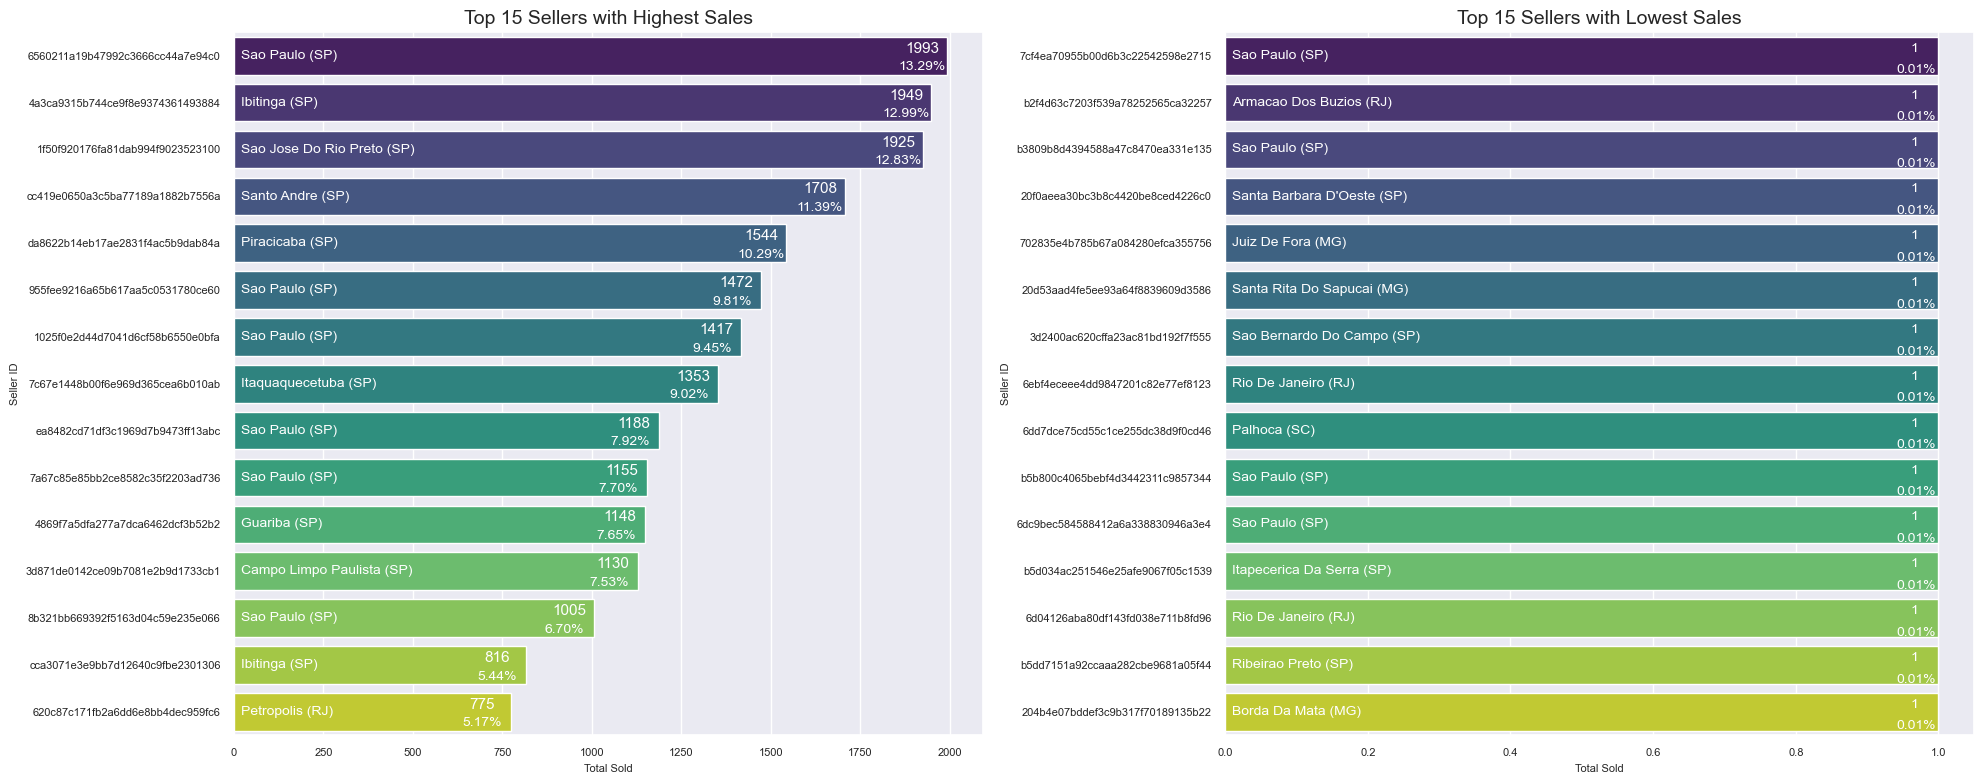

In [117]:
# Top Sellers
top_selling_sellers = sales_revenue_seller.sort_values(by='total_sales', ascending=False).head(15)
# Bottom Sellers
bottom_selling_sellers = sales_revenue_seller.sort_values(by='total_sales', ascending=True).head(15)

# Plotting the bar plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.barplot(y='seller_id', x='total_sales', data=top_selling_sellers, palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 Sellers with Highest Sales', fontsize=14)
ax[0].set_xlabel('Total Sold', fontsize=8)
ax[0].set_ylabel('Seller ID', fontsize=8)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='x', labelsize=8)
# Adding the count labels on each bar
for p in ax[0].patches:
    ax[0].annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=11, color='white', rotation=0, xytext=(-30, 5), textcoords='offset points')
    
# Adding percentage labels
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / len(top_selling_sellers) * 0.1):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(-35, 3), fontsize=10, color='white', textcoords='offset points')

# Adding the city name and state labels below each bar
for idx, (city, state) in enumerate(zip(top_selling_sellers['seller_city'], top_selling_sellers['seller_state'])):
    label = f'{city} ({state})'
    ax[0].annotate(label, (0, idx), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10, color='white')
    

# Plotting the bar plots

sns.barplot(y='seller_id', x='total_sales', data=bottom_selling_sellers, palette='viridis', ax=ax[1])
ax[1].set_title('Top 15 Sellers with Lowest Sales', fontsize=14)
ax[1].set_xlabel('Total Sold', fontsize=8)
ax[1].set_ylabel('Seller ID', fontsize=8)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
# Adding the count labels on each bar
for p in ax[1].patches:
    ax[1].annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=10, color='white', rotation=0, xytext=(-20, 5), textcoords='offset points')

# Adding percentage labels
for p in ax[1].patches:
    ax[1].annotate(f'{(p.get_width() / len(top_selling_sellers) * 0.1):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), va='center', color='white', fontsize=10, xytext=(-30, 3), textcoords='offset points')

# Adding the city name and state labels below each bar
for idx, (city, state) in enumerate(zip(bottom_selling_sellers['seller_city'], bottom_selling_sellers['seller_state'])):
    label = f'{city} ({state})'
    ax[1].annotate(label, (0, idx), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10, color='white')
    

plt.tight_layout()
plt.show()


Of the 15 sellers with the most orders, 13 sellers managed to achieve more than 1000 orders, showing excellent performance.

Sellers in the city of Sao Paulo (SP) topped the ranking with 1993 orders (13.29%), then sellers in the city of Ibitinga (SP) who achieved 1949 orders (12.99%) followed by sellers in the city of Sao Jose Do Rio Preto (SP ) which reached in 1925 (12.83%). These three cities reached orders above 1900.

This fact shows the potential to support and develop orders from the two sellers who are below 900 orders with a more appropriate strategy. Does location affect orders? It seems so, considering that the top 13 sellers are in the state of Sao Paulo, which consists of 6 Sao Paulo cities that rank in the top 15, and also considering that the city of Sao Paulo is the largest market.

For the seller who ranks 15th with the lowest orders, it can be seen that all these sellers only accept orders. This requires in-depth analysis of marketing strategies, stock management and customer service to increase their orders. Additionally, it is important to consider geographic factors, such as seller location, as it appears that the city of operation can influence order performance. For sellers in cities with high competition, they need to develop more creative marketing strategies to maintain or increase their position in the order ranking.

Of the 15 sellers with the lowest orders, all received only 1 order during that period. Are there other sellers who only get 1 order? How many?

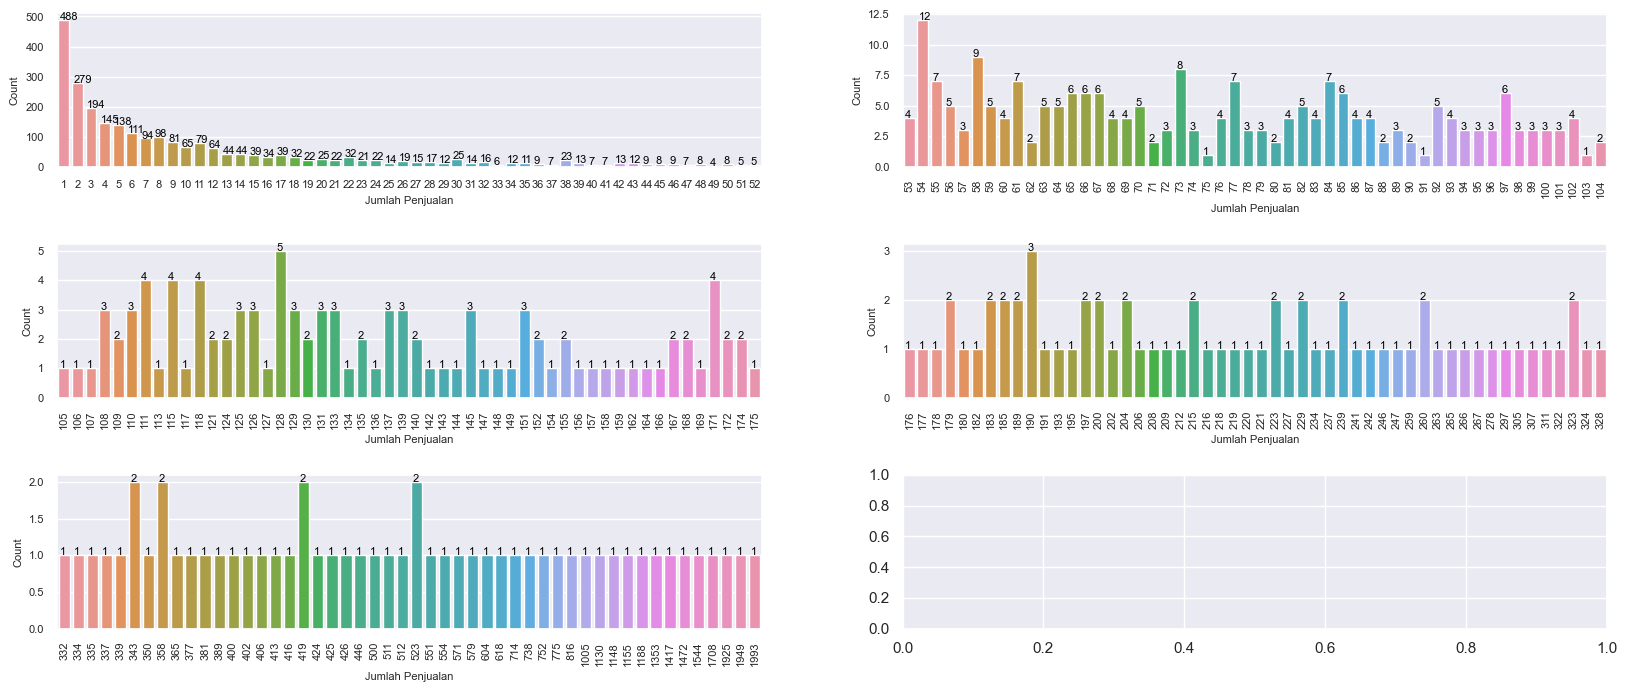

In [118]:
# How many sellers can only sell 1 product?
# Percentage of sellers based on the number of sales
top_selling_sellers_ = sales_revenue_seller.sort_values(by='total_sales', ascending=False)
top_selling_sellers_ = top_selling_sellers_['total_sales'].value_counts().reset_index()
top_selling_sellers_['%'] = round((top_selling_sellers_['count'] / top_selling_sellers_['count'].sum()) * 100, 2)

# Plot 
sort_top_selling_sellers_ = top_selling_sellers_.sort_values(by='total_sales', ascending=True)

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,8))
plt.subplots_adjust(hspace=0.5)  # Menambahkan jarak vertikal antar subplot

sns.barplot(x='total_sales', y='count', data=sort_top_selling_sellers_.head(52), ax=ax[0, 0])
ax[0, 0].set_xlabel('Jumlah Penjualan', fontsize=8)
ax[0, 0].set_ylabel('Count', fontsize=8)
ax[0, 0].tick_params(axis='x', labelsize=8)
ax[0, 0].tick_params(axis='y', labelsize=8)

for p in ax[0, 0].patches:
    ax[0, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-3, 0), fontsize=8, color='black', textcoords='offset points')
    
sns.barplot(x='total_sales', y='count', data=sort_top_selling_sellers_.iloc[52:104, :], ax=ax[0, 1])
ax[0, 1].set_xlabel('Jumlah Penjualan', fontsize=8)
ax[0, 1].set_ylabel('Count', fontsize=8)
ax[0, 1].tick_params(axis='x', labelsize=8, rotation=90)
ax[0, 1].tick_params(axis='y', labelsize=8)

for p in ax[0, 1].patches:
    ax[0, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-3, 0), fontsize=8, color='black', textcoords='offset points')

sns.barplot(x='total_sales', y='count', data=sort_top_selling_sellers_.iloc[104:156, :], ax=ax[1, 0])
ax[1, 0].set_xlabel('Jumlah Penjualan', fontsize=8)
ax[1, 0].set_ylabel('Count', fontsize=8)
ax[1, 0].tick_params(axis='x', labelsize=8, rotation=90)
ax[1, 0].tick_params(axis='y', labelsize=8)

for p in ax[1, 0].patches:
    ax[1, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-3, 0), fontsize=8, color='black', textcoords='offset points')

sns.barplot(x='total_sales', y='count', data=sort_top_selling_sellers_.iloc[156:208, :], ax=ax[1, 1])
ax[1, 1].set_xlabel('Jumlah Penjualan', fontsize=8)
ax[1, 1].set_ylabel('Count', fontsize=8)
ax[1, 1].tick_params(axis='x', labelsize=8, rotation=90)
ax[1, 1].tick_params(axis='y', labelsize=8)

for p in ax[1, 1].patches:
    ax[1, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-3, 0), fontsize=8, color='black', textcoords='offset points')

sns.barplot(x='total_sales', y='count', data=sort_top_selling_sellers_.iloc[208:, :], ax=ax[2, 0])
ax[2, 0].set_xlabel('Jumlah Penjualan', fontsize=8)
ax[2, 0].set_ylabel('Count', fontsize=8)
ax[2, 0].tick_params(axis='x', labelsize=8, rotation=90)
ax[2, 0].tick_params(axis='y', labelsize=8)

for p in ax[2, 0].patches:
    ax[2, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), xytext=(-3, 0), fontsize=8, color='black', textcoords='offset points')

plt.show()


The data shows that the majority of sellers (488) only made one sale, followed by 279 sellers who made two sales, and 194 sellers who made three sales. The number of sellers then decreases gradually as the number of sales increases, indicating that most sellers tend to operate with lower sales volumes.

In [119]:
# Goods sold by sellers who only get 1 order
top_selling_sellers_ = sales_revenue_seller.sort_values(by='total_sales', ascending=False)
seller_ordered_1_of_10 =  top_selling_sellers_[(top_selling_sellers_['total_sales'] == 1)]
seller_ordered_1_of_10 = pd.merge(seller_ordered_1_of_10[['seller_id']], sell_ord[['seller_id', 'seller_city', 'seller_state', 'product_category_name']], on='seller_id', how='left') 
seller_ordered_1_of_10 = seller_ordered_1_of_10['product_category_name'].value_counts().reset_index(name='count')
seller_ordered_1_of_10['percentage'] = round((seller_ordered_1_of_10['count'] / seller_ordered_1_of_10['count'].sum()) * 100, 3)
seller_ordered_1_of_10

product_category_name  count  percentage
0                             Health Beauty     53      10.861
1                           Furniture Decor     45       9.221
2                                      Auto     44       9.016
3                            Sports Leisure     42       8.607
4                                Housewares     31       6.352
5                     Computers Accessories     26       5.328
6                                   Unknown     23       4.713
7                              Garden Tools     18       3.689
8                                      Baby     18       3.689
9                                  Pet Shop     13       2.664
10                                     Toys     12       2.459
11                           Bed Bath Table     10       2.049
12                               Cool Stuff     10       2.049
13                 Fashion Bags Accessories     10       2.049
14                                Perfumery      9       1.844
15                         Small Appliances      8       1.639
16                              Electronics      8       1.639
17                                   Drinks      7       1.434
18                   Books General Interest      7       1.434
19                      Luggage Accessories      7       1.434
20          Construction Tools Construction      6       1.230
21                Construction Tools Safety      5       1.025
22                Construction Tools Lights      5       1.025
23                          Home Appliances      5       1.025
24                               Stationery      5       1.025
25                        Home Construction      4       0.820
26                               Food Drink      4       0.820
27                                Telephony      4       0.820
28                          Books Technical      4       0.820
29                        Furniture Bedroom      4       0.820
30                                      Art      4       0.820
31                            Watches Gifts      3       0.615
32                           Consoles Games      3       0.615
33                                    Music      3       0.615
34                  Costruction Tools Tools      2       0.410
35                                Computers      2       0.410
36                         Air Conditioning      2       0.410
37                    Furniture Living Room      2       0.410
38                         Office Furniture      2       0.410
39               Agro Industry And Commerce      2       0.410
40                      Musical Instruments      2       0.410
41                                     Food      2       0.410
42                                    Audio      1       0.205
43       Kitchen Laptops and Food Preparers      1       0.205
44                             Home Comfort      1       0.205
45                                  Flowers      1       0.205
46                   Signaling And Security      1       0.205
47                          Fixed Telephony      1       0.205
48                             Dvds Blu Ray      1       0.205
49                 Costruction Tools Garden      1       0.205
50                    Arts And Craftmanship      1       0.205
51                   Fashio Female Clothing      1       0.205
52                      Diapers And Hygiene      1       0.205
53  Kitchen Dining Laundry Garden Furniture      1       0.205

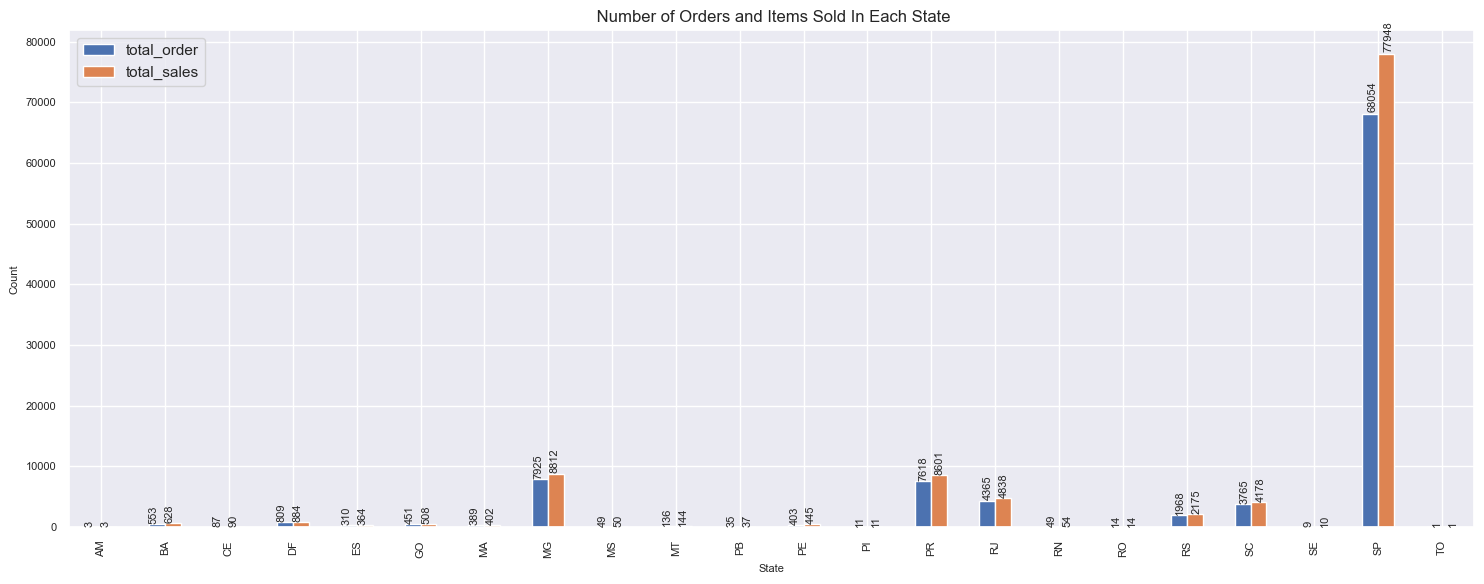

In [158]:
seller_order_state = sell_ord[['order_id', 'seller_state']].drop_duplicates()
seller_order_state = seller_order_state.groupby(['order_id', 'seller_state']).size().reset_index(name='total_order')
seller_order_state = seller_order_state.groupby('seller_state')['total_order'].sum().reset_index()

seller_sales_state = sell_ord.groupby('seller_state').size().reset_index(name='total_sales')
seller_order_sales_state = pd.merge(seller_order_state, seller_sales_state, on='seller_state', how='left')
seller_order_sales_state

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
ax = seller_order_sales_state.plot(kind='bar', x='seller_state', title='Number of Orders and Items Sold In Each State', ax=ax)
ax.set_ylabel('Count', fontsize=8)
ax.set_xlabel('State', fontsize=8)
ax.tick_params(axis='both', labelsize=8)

# Menambahkan label untuk tiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=8,
                    rotation=90,
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

Of the 23 states documented, six states stand out in terms of sales contribution, including Minas Gerais, Paraná, Rio de Janeiro, Rio Grande do Sul, Santa Catarina, and São Paulo. São Paulo stands out as the state with the most significant sales contribution, reaching a percentage of 70.73% of total sales, while Minas Gerais, with 8.06%, Paraná, with 4.79%, Rio de Janeiro, with 4.39%, Santa Catarina, with 3.77%, and Rio Grande do Sul, with 1.95%, followed other important contributors. In optimizing sales performance, additional focus on marketing and distribution of goods in countries with lower sales contribution can increase market penetration and increase overall revenue.

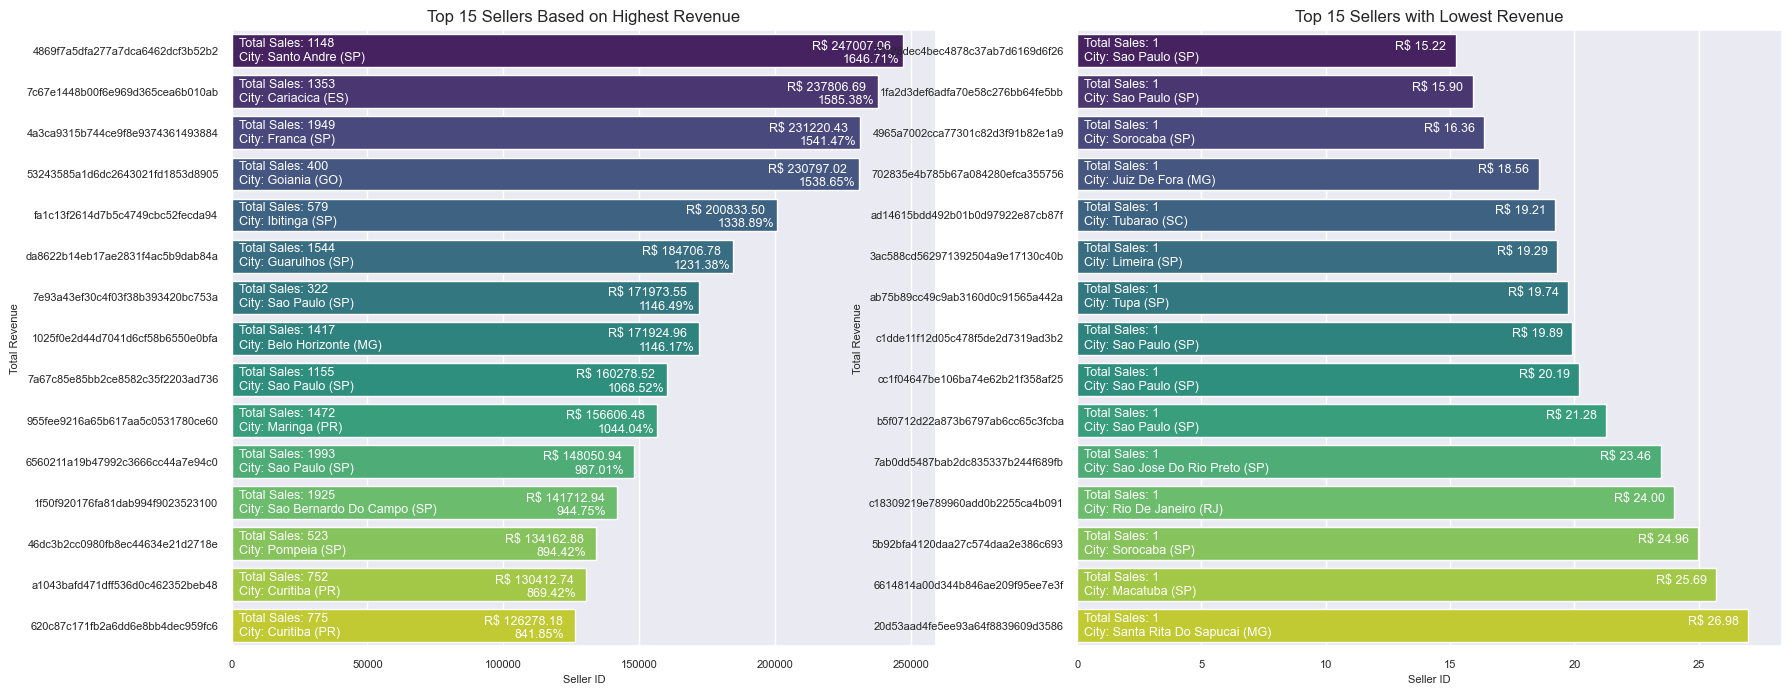

In [121]:
# Top Sellers
top_revenue_sellers = sales_revenue_seller.sort_values(by='payment_value', ascending=False).head(15)
# Bottom Sellers
bottom_revenue_sellers = sales_revenue_seller.sort_values(by='total_sales', ascending=True).head(15)

# Plotting bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.barplot(y='seller_id', x='payment_value', data=top_revenue_sellers.head(15), palette='viridis', ax=ax[0])
ax[0].set_xlabel('Seller ID', fontsize=8)
ax[0].set_ylabel('Total Revenue', fontsize=8)
ax[0].set_title(f'Top 15 Sellers Based on Highest Revenue')
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


# Adding revenue amount label on each bar
for p in ax[0].patches:
    ax[0].annotate(f'R$ {p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=9, color='white', rotation=0, xytext=(-37, 3), textcoords='offset points')
    
# Adding percentage labels
for p in ax[0].patches:
    ax[0].annotate(f'{(p.get_width() / len(top_revenue_sellers) * 0.1):.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()), xytext=(-43, 3), fontsize=9, color='white', textcoords='offset points')

# Adding total sales label on each bar
for idx, total in enumerate(top_revenue_sellers['total_sales']):
    ax[0].annotate(f"Total Sales: {total}", (0, idx), ha='left', va='center', fontsize=9, color='white', rotation=0, xytext=(5, 5), textcoords='offset points')

# Adding city and state label below each bar
for idx, (city, state) in enumerate(zip(sales_revenue_seller['seller_city'], sales_revenue_seller['seller_state'])):
    label = f"City: {city} ({state})"
    ax[0].annotate(label, (0, idx), xytext=(5, -5), textcoords='offset points', ha='left', va='center', fontsize=9, color='white')
    


# Sorting to get lowest revenue sellers
lowest_revenue_sellers = sales_revenue_seller.sort_values(by='payment_value', ascending=True).head(15)
sns.barplot(y='seller_id', x='payment_value', data=lowest_revenue_sellers, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Seller ID', fontsize=8)
ax[1].set_ylabel('Total Revenue', fontsize=8)
ax[1].set_title(f'Top 15 Sellers with Lowest Revenue')
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

# Adding revenue amount label on each bar
for p in ax[1].patches:
    ax[1].annotate(f'R$ {p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=9, color='white', rotation=0, xytext=(-25, 3), textcoords='offset points')

# Adding total sales label on each bar
for idx, total in enumerate(lowest_revenue_sellers['total_sales']):
    ax[1].annotate(f"Total Sales: {total}", (0, idx), ha='left', va='center', fontsize=9, color='white', rotation=0, xytext=(5, 5), textcoords='offset points')

# Adding city and state label below each bar
for idx, (city, state) in enumerate(zip(lowest_revenue_sellers['seller_city'], lowest_revenue_sellers['seller_state'])):
    label = f"City: {city} ({state})"
    ax[1].annotate(label, (0, idx), xytext=(5, -5), textcoords='offset points', ha='left', va='center', fontsize=9, color='white')


plt.show()

Seller 7c67e1448b00f6e969d365cea6b010ab earned the largest profit among other sellers, namely 505294.51 Brazilian Real with total product sales of 1437 items. The seller in second place made a profit of 308202.04 Brazilian Reals with total product sales of 1461 items.
Which product contributes the highest profit to the seller's revenue?

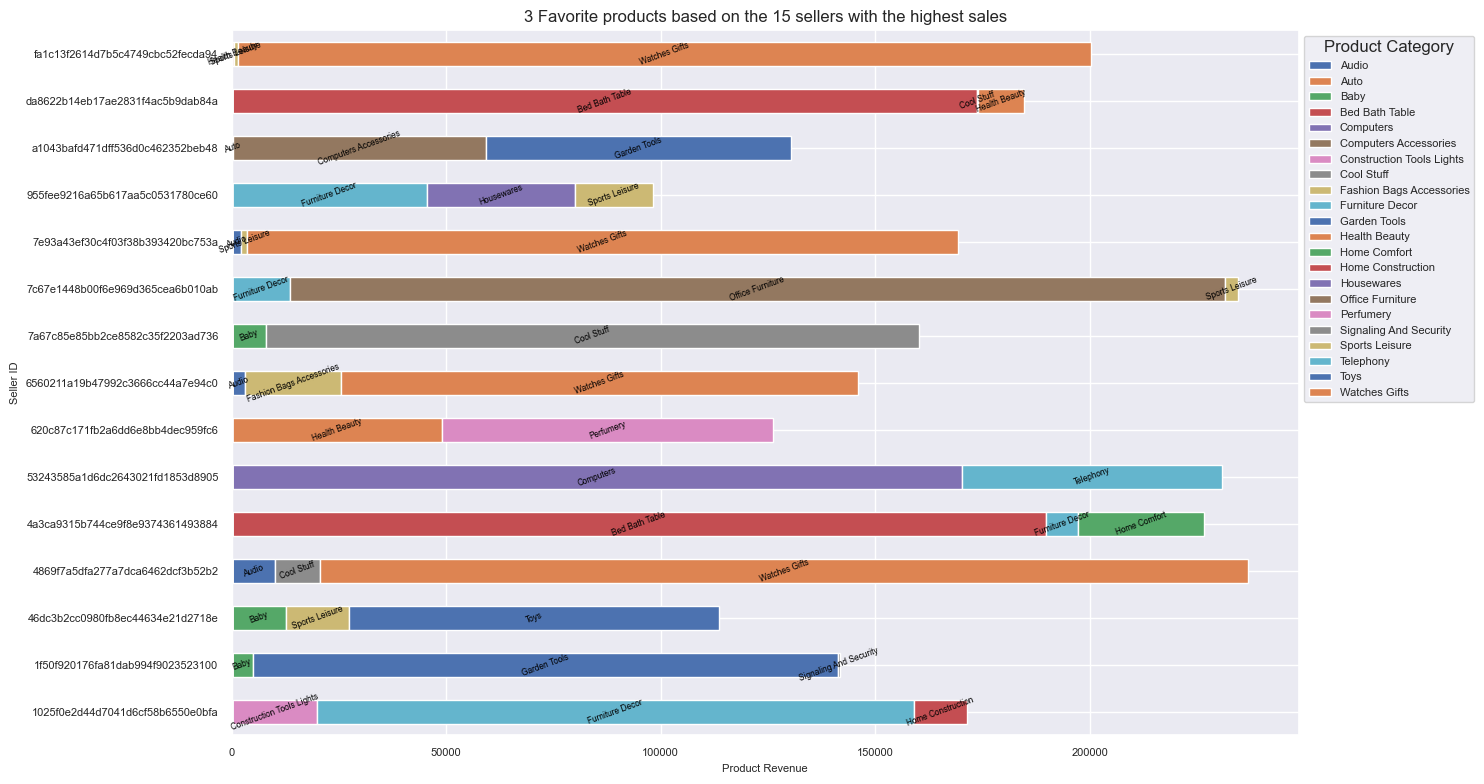

In [174]:
# Top 3 products that contribute to each seller's profits
seller_total_revenue_product = sell_ord.groupby(['seller_id', 'seller_city', 'seller_state', 'product_category_name'])['payment_value'].agg(total_revenue='sum', total_order_item='count').reset_index().sort_values(by='total_revenue', ascending=False)

top3_products = []
for seller in top_revenue_sellers['seller_id']:
    top3_seller_products = seller_total_revenue_product[seller_total_revenue_product['seller_id'] == seller].nlargest(3, 'total_revenue')
    top3_products.append(top3_seller_products)
    
top3_products = pd.concat(top3_products)

# 3 produk teratas yang berkontribusi terhadap keuntungan tiap seller
# Ubah ke dalam bentuk pivot
# Tambahkan nama produk pada setiap bar
# Jangan tambahkan nama untuk nilai 0
# Do not add a name for value 0

# Convert to pivot form
top3_products_pivot_revenue = pd.pivot(top3_products, values='total_revenue', index='seller_id', columns='product_category_name')
top3_products_pivot_revenue.fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create plot stack bar horizontal
bars = top3_products_pivot_revenue.plot(kind='barh', stacked=True, ax=ax, title='3 Favorite products based on the 15 sellers with the highest sales')
plt.xlabel('Product Revenue', fontsize=8)
plt.ylabel('Seller ID', fontsize=8)
plt.tick_params(axis='both', labelsize=8)
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

# Add product name to each bar
for i, (idx, row) in enumerate(top3_products_pivot_revenue.iterrows()):
    x_position = 0
    for column, value in row.items():
        if value != 0:  # Do not add a name for value 0
            ax.text(x_position + value / 2, i, column, ha='center', va='center', color='black', rotation=20, fontsize=6)
        x_position += value

plt.tight_layout()
plt.show()


From product sales data from the 15 sellers with the highest sales, it can be seen that most sellers have sales that are dominated by certain product categories. There are 2 sellers with the largest sales in the "Bed Bath Table" category, and 4 sellers with the largest sales in the "Watch Gifts" category.

For example, the seller with ID 4a3ca9315b744ce9f8e9374361493884 has the largest sales in the "Bed Bath Table" category with total sales reaching 1678, followed by the "Home Comfort" category with 294 sales, and "Furniture Decor" with 86 sales. From this analysis, it can be recommended to sellers to focus on inventory management and promotions for the most popular product category, namely "Bed Bath Table", in order to increase profitability and overall business growth.

A similar pattern is also seen in other sellers. For example, the seller with ID 6560211a19b47992c3666cc44a7e94c0 has the highest sales in the "Gift Watches" category with 1680 sales, followed by the "Fashion Bag Accessories" category with 361 sales, and "Audio" with 32 sales. Such sellers can strengthen their marketing and inventory strategies by paying more attention to the categories that customers are most interested in, while maintaining product variety to increase customer appeal and satisfaction.

By paying attention to sales patterns like this, sellers can make more informed decisions in managing stock, develop more effective marketing strategies, and improve service quality to strengthen relationships with customers.

#### [DONE] 7. How long does it take on average for a product order to go from ordering to being received by the customer? Which product category has the longest delivery time to customers?


In [123]:
delivery_date = sell_ord[['order_purchase_timestamp', 'order_approved_at_orders', 'order_delivered_carrier_date',
                            'order_delivered_customer_date', 'order_estimated_delivery_date',
                            'seller_id', 'product_id', 'price', 'freight_value',
                            'product_category_name', 'customer_city',
                            'customer_state', 'seller_city',
                            'seller_state', 'payment_value', 'total_order', 'total_sales', 'review_score']].drop_duplicates()

# Create new columns for delivery duration
delivery_date['purchase_to_approved'] = delivery_date['order_approved_at_orders'] - delivery_date['order_purchase_timestamp']
delivery_date['approved_to_carrier'] = delivery_date['order_delivered_carrier_date'] - delivery_date['order_approved_at_orders']
delivery_date['carrier_to_customer'] = delivery_date['order_delivered_customer_date'] - delivery_date['order_delivered_carrier_date']
delivery_date['delivery_days'] = delivery_date['order_delivered_customer_date'] - delivery_date['order_purchase_timestamp']
delivery_date['delivery_seconds'] = delivery_date['delivery_days'].dt.total_seconds()
delivery_date.sort_values(by='order_delivered_carrier_date', ascending=True).tail(10)

delivery_date

order_purchase_timestamp order_approved_at_orders  \
0           2017-10-02 10:56:33      2017-10-02 11:07:15   
1           2018-07-24 20:41:37      2018-07-26 03:24:27   
2           2018-08-08 08:38:49      2018-08-08 08:55:23   
3           2017-11-18 19:28:06      2017-11-18 19:45:59   
4           2018-02-13 21:18:39      2018-02-13 22:20:29   
...                         ...                      ...   
110834      2017-03-09 09:54:05      2017-03-09 09:54:05   
110835      2018-02-06 12:58:58      2018-02-06 13:10:37   
110836      2017-08-27 14:46:43      2017-08-27 15:04:16   
110837      2018-01-08 21:28:27      2018-01-08 21:36:21   
110839      2018-03-08 20:57:30      2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
110834          2017-03-10 11:18:03           2017-03-17 15:08:01   
110835          2018-02-07 23:22:42           2018-02-28 17:37:56   
110836          2017-08-28 20:52:26           2017-09-21 11:24:17   
110837          2018-01-12 15:35:03           2018-01-25 23:32:54   
110839          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                         seller_id  \
0                         2017-10-18  3504c0cb71d7fa48d967e0e4c94d59d9   
1                         2018-08-13  289cdb325fb7e7f891c38608bf9e0962   
2                         2018-09-04  4869f7a5dfa277a7dca6462dcf3b52b2   
3                         2017-12-15  66922902710d126a0e7d26b0e3805106   
4                         2018-02-26  2c9e548be18521d1c43cde1c582c6de8   
...                              ...                               ...   
110834                    2017-03-28  e24fc9fcd865784fb25705606fe3dfe7   
110835                    2018-03-02  1f9ab4708f3056ede07124aad39a2554   
110836                    2017-09-27  d50d79cb34e38265a8649c383dcffd48   
110837                    2018-02-15  a1043bafd471dff536d0c462352beb48   
110839                    2018-04-03  ececbfcff9804a2d6b40f589df8eef2b   

                              product_id   price  freight_value  \
0       87285b34884572647811a353c7ac498a   29.99           8.72   
1       595fac2a385ac33a80bd5114aec74eb8  118.70          22.76   
2       aa4383b373c6aca5d8797843e5594415  159.90          19.22   
3       d0b61bfb1de832b15ba9d266ca96e5b0   45.00          27.20   
4       65266b2da20d04dbe00c5c2d3bb7859e   19.90           8.72   
...                                  ...     ...            ...   
110834  ac35486adb7b02598c182c2ff2e05254   72.00          13.08   
110835  f1d4ce8c6dd66c47bbaa8c6781c2a923  174.90          20.10   
110836  b80910977a37536adeddd63663f916ad  205.99          65.02   
110837  d1c427060a0f73f6b889a5c7c61f2ac4  179.99          40.59   
110839  006619bbed68b000c8ba3f8725d5409e   68.50          18.36   

        product_category_name  ... seller_state payment_value total_order  \
0                  Housewares  ...           SP         38.71           1   
1                   Perfumery  ...           MG        141.46           1   
2                        Auto  ...           SP        179.12           1   
3                    Pet Shop  ...           MG         72.20           1   
4                  Stationery  ...           SP         28.62           1   
...                       ...  ...          ...           ...         ...   
110834          Health Beauty  ...           SP         85.08           1   
110835                   Baby  ...           SP        195.00           1   
110836        Home Appliances  ...           SP        271.01         

In [124]:
delivery_date.isna().sum()

order_purchase_timestamp         0
order_approved_at_orders         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
seller_id                        0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
customer_city                    0
customer_state                   0
seller_city                      0
seller_state                     0
payment_value                    0
total_order                      0
total_sales                      0
review_score                     0
purchase_to_approved             0
approved_to_carrier              0
carrier_to_customer              0
delivery_days                    0
delivery_seconds                 0
dtype: int64

In [181]:
average_delivery_per_category = delivery_date.groupby(['product_category_name']).agg({'purchase_to_approved': 'mean', 'approved_to_carrier': 'median', 'carrier_to_customer': 'mean'}).reset_index()

# Convert timedelta value to seconds
average_delivery_per_category['purchase_to_approved'] = round(average_delivery_per_category['purchase_to_approved'].dt.total_seconds(), 0)
average_delivery_per_category['approved_to_carrier'] = round(average_delivery_per_category['approved_to_carrier'].dt.total_seconds(), 0)
average_delivery_per_category['carrier_to_customer'] = round(average_delivery_per_category['carrier_to_customer'].dt.total_seconds(), 0)

# Convert the seconds value back to timedelta
average_delivery_per_category['total_days'] = round(average_delivery_per_category['purchase_to_approved'] + average_delivery_per_category['approved_to_carrier'] + average_delivery_per_category['carrier_to_customer'], 0)

def convert_seconds_to_days_hours_minutes_seconds(seconds):
    # Calculate days
    days = seconds // (24 * 3600)
    remaining_seconds = seconds % (24 * 3600)
    
    # Calculate hours
    hours = remaining_seconds // 3600
    remaining_seconds %= 3600
    
    # Calculate minutes
    minutes = remaining_seconds // 60
    
    # Calculate remaining seconds
    remaining_seconds %= 60
    
    return days, hours, minutes, remaining_seconds

# Convert and store labels for each category
for index, row in average_delivery_per_category.iterrows():
    days, hours, minutes, seconds = convert_seconds_to_days_hours_minutes_seconds(row['purchase_to_approved'])
    output = ""
    if days != 0:
        output += f"{int(days)}D:"
    if hours != 0 or output != "":
        output += f"{int(hours)}H:"
    if minutes != 0 or output != "":
        output += f"{int(minutes)}M:"
    output += f"{int(seconds)}S"
    average_delivery_per_category.at[index, 'purchase_to_approved_labels'] = output
    
    days, hours, minutes, seconds = convert_seconds_to_days_hours_minutes_seconds(row['approved_to_carrier'])
    output = ""
    if days != 0:
        output += f"{int(days)}D:"
    if hours != 0 or output != "":
        output += f"{int(hours)}H:"
    if minutes != 0 or output != "":
        output += f"{int(minutes)}M:"
    output += f"{int(seconds)}S"
    average_delivery_per_category.at[index, 'approved_to_carrier_labels'] = output
    
    days, hours, minutes, seconds = convert_seconds_to_days_hours_minutes_seconds(row['carrier_to_customer'])
    output = ""
    if days != 0:
        output += f"{int(days)}D:"
    if hours != 0 or output != "":
        output += f"{int(hours)}H:"
    if minutes != 0 or output != "":
        output += f"{int(minutes)}M:"
    output += f"{int(seconds)}S"
    average_delivery_per_category.at[index, 'carrier_to_customer_labels'] = output
    
    days, hours, minutes, seconds = convert_seconds_to_days_hours_minutes_seconds(row['total_days'])
    output = ""
    if days != 0:
        output += f"{int(days)}D:"
    if hours != 0 or output != "":
        output += f"{int(hours)}H:"
    if minutes != 0 or output != "":
        output += f"{int(minutes)}M:"
    output += f"{int(seconds)}S"
    average_delivery_per_category.at[index, 'total_days_labels'] = output

# average_delivery_per_category['total_days'] = pd.to_timedelta(average_delivery_per_category['total_days'], unit='s')

# Review Scpre
score_products = sell_ord[['order_id', 'product_id', 'product_category_name', 'review_score']].drop_duplicates()
score_products = score_products[score_products['review_score'] > 0]
# score_products = score_products.groupby(['order_id', 'product_category_name']).
score_products = score_products.groupby('product_category_name')['review_score'].mean().reset_index()

# Merge betweem review score and total days
average_delivery_per_category = pd.merge(average_delivery_per_category, score_products, on='product_category_name', how='left')
average_delivery_per_category


product_category_name  purchase_to_approved  approved_to_carrier  \
0   Agro Industry And Commerce               56196.0             133444.0   
1             Air Conditioning               40725.0             166156.0   
2                          Art               48706.0             233136.0   
3        Arts And Craftmanship               64861.0              65126.0   
4                        Audio               37060.0             177375.0   
..                         ...                   ...                  ...   
67      Tablets Printing Image               34513.0             246402.0   
68                   Telephony               44047.0             197546.0   
69                        Toys               31644.0             128596.0   
70                     Unknown               35313.0             181017.0   
71               Watches Gifts               35922.0             138896.0   

    carrier_to_customer  total_days purchase_to_approved_labels  \
0              721403.0    911043.0                 15H:36M:36S   
1              701771.0    908652.0                 11H:18M:45S   
2              628015.0    909857.0                 13H:31M:46S   
3              309834.0    439821.0                   18H:1M:1S   
4              907456.0   1121891.0                 10H:17M:40S   
..                  ...         ...                         ...   
67             809770.0   1090685.0                  9H:35M:13S   
68             815712.0   1057305.0                  12H:14M:7S   
69             767743.0    927983.0                  8H:47M:24S   
70             785976.0   1002306.0                  9H:48M:33S   
71             848036.0   1022854.0                  9H:58M:42S   

   approved_to_carrier_labels carrier_to_customer_labels total_days_labels  \
0                1D:13H:4M:4S              8D:8H:23M:23S     10D:13H:4M:3S   
1               1D:22H:9M:16S              8D:2H:56M:11S   10D:12H:24M:12S   
2              2D:16H:45M:36S              7D:6H:26M:55S   10D:12H:44M:17S   
3                  18H:5M:26S              3D:14H:3M:54S     5D:2H:10M:21S   
4               2D:1H:16M:15S             10D:12H:4M:16S   12D:23H:38M:11S   
..                        ...                        ...               ...   
67             2D:20H:26M:42S              9D:8H:56M:10S    12D:14H:58M:5S   
68              2D:6H:52M:26S             9D:10H:35M:12S    12D:5H:41M:45S   
69             1D:11H:43M:16S             8D:21H:15M:43S   10D:17H:46M:23S   
70              2D:2H:16M:57S              9D:2H:19M:36S    11D:14H:25M:6S   
71             1D:14H:34M:56S             9D:19H:33M:56S    11D:20H:7M:34S   

    review_score  
0       4.112360  
1       4.119342  
2       4.098446  
3       4.125000  
4       3.840580  
..           ...  
67      4.155844  
68      4.031792  
69      4.229953  
70      4.002876  
71      4.100071  

[72 rows x 10 columns]

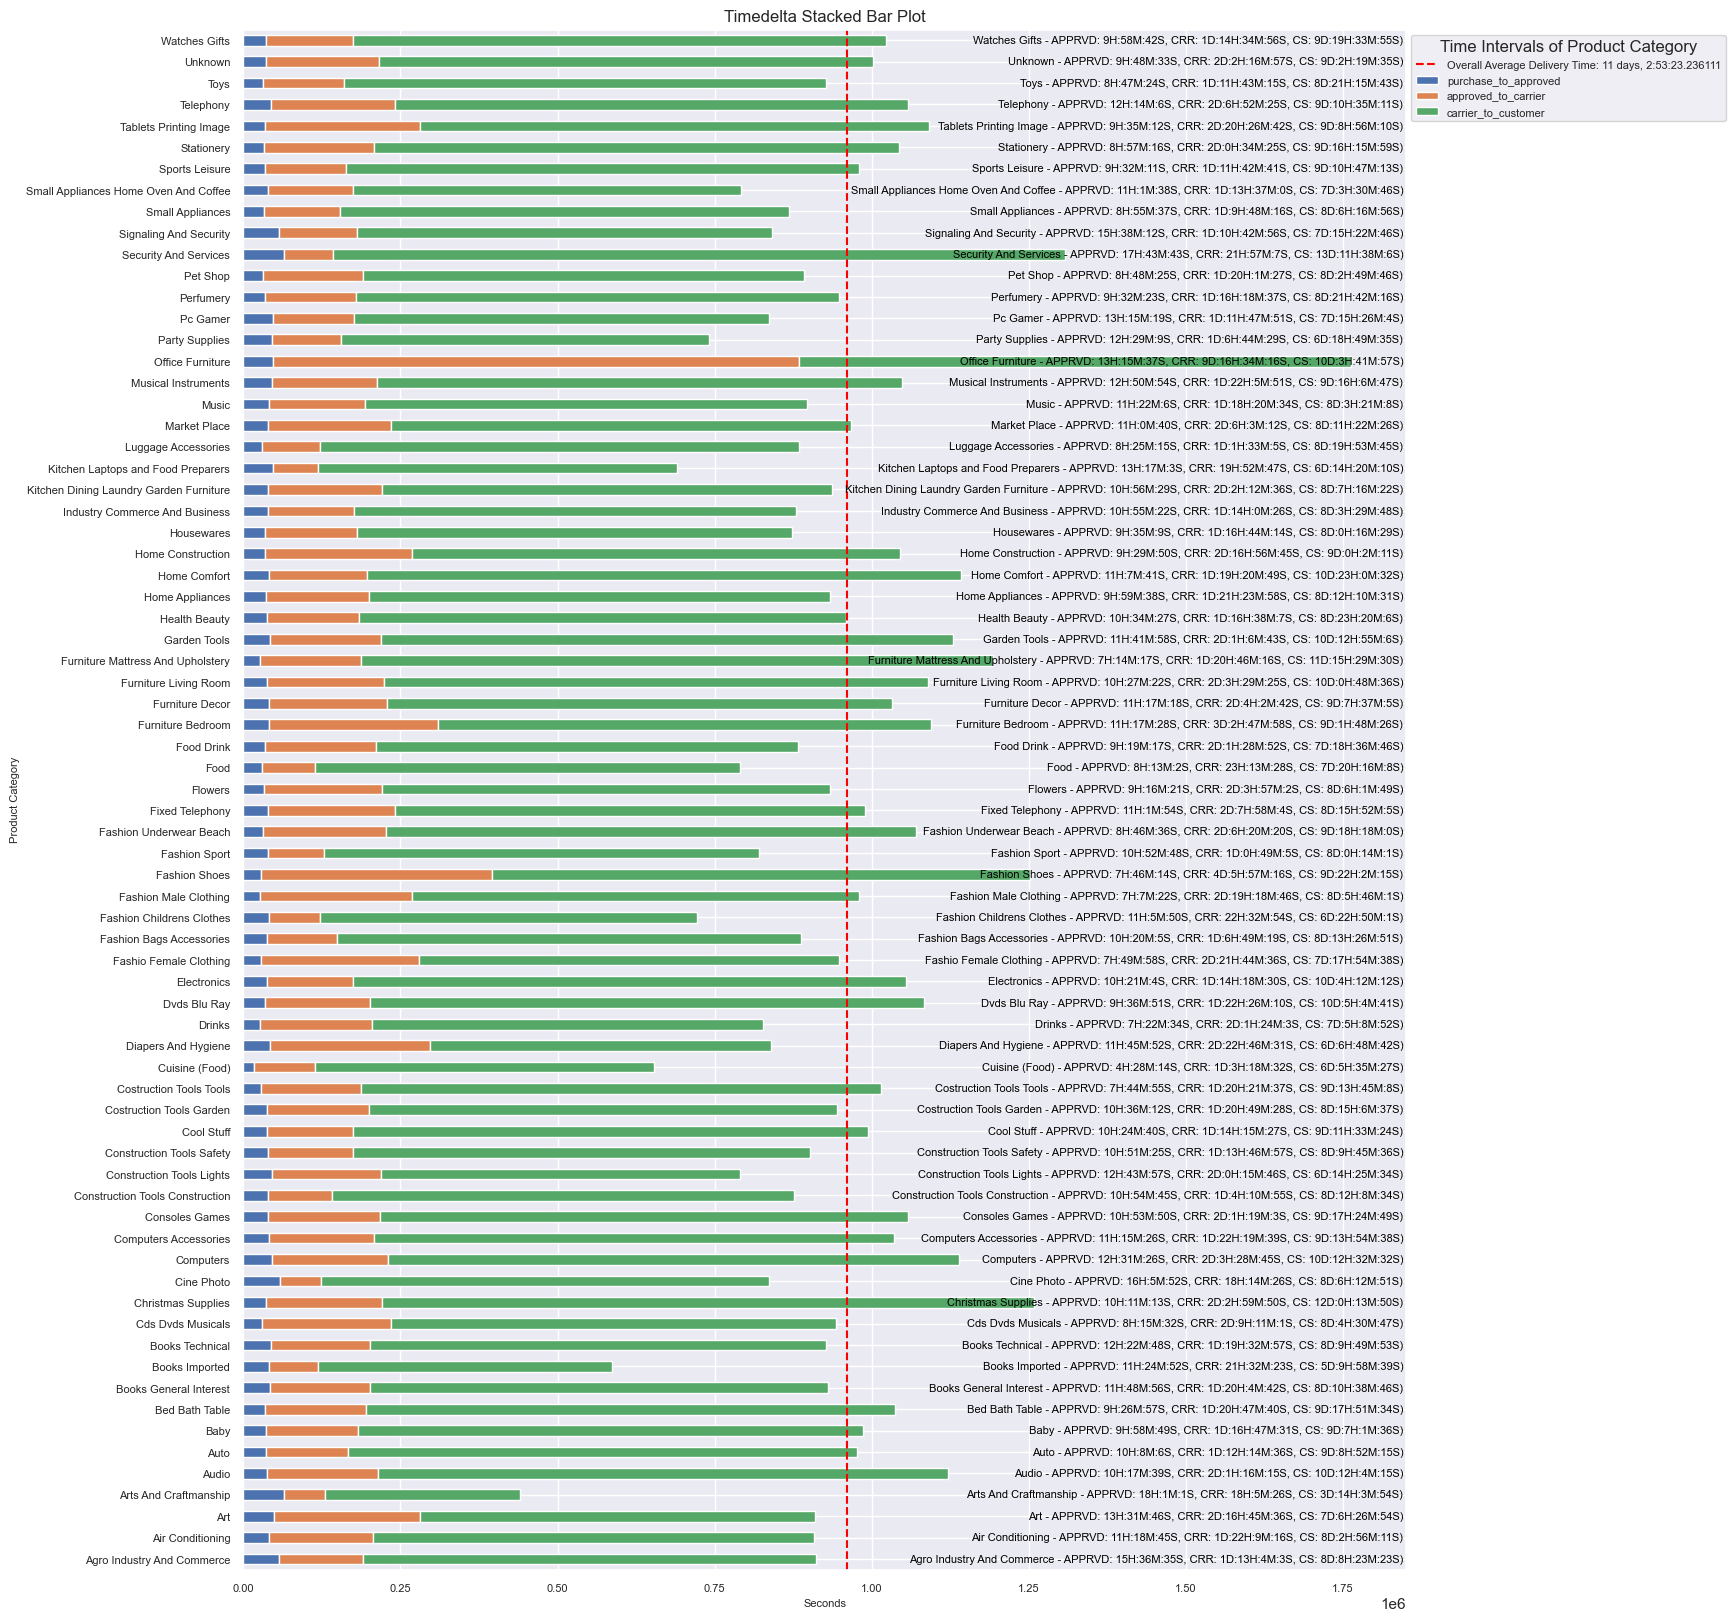

In [126]:
from datetime import timedelta
# Create a new column for total delivery time in seconds
# average_delivery_per_category['total_day'] = average_delivery_per_category['purchase_to_approved'] + average_delivery_per_category['approved_to_carrier'] + average_delivery_per_category['carrier_to_customer']

# Plot stacked bar plot
fig, ax = plt.subplots(figsize=(15, 20))
stacked_data = average_delivery_per_category.iloc[:, :4].set_index('product_category_name')
stacked_data.plot(kind='barh', stacked=True, ax=ax)
plt.title('Timedelta Stacked Bar Plot')
plt.xlabel('Seconds', fontsize=8)
plt.ylabel('Product Category', fontsize=8)
plt.tick_params(axis='both', labelsize=8)

# Adding total_day_second label on each bar
# for idx, p in enumerate(ax.patches):
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
#     stack_index = idx % len(stacked_data.columns)
#     label = f'{width:.4f}'
#     ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white', rotation=0, xytext=(0, 0), textcoords='offset points')

# Adding the city name and state labels below each bar
for idx, (product, seconds, app_to_crr, crr_to_cs) in enumerate(zip(average_delivery_per_category['product_category_name'], average_delivery_per_category['purchase_to_approved_labels'], average_delivery_per_category['approved_to_carrier_labels'], average_delivery_per_category['carrier_to_customer_labels'])):
    label = f'{product} - APPRVD: {seconds}, CRR: {app_to_crr}, CS: {crr_to_cs})'
    ax.annotate(label, (0, idx), xytext=(835, 0), textcoords='offset points', ha='right', va='center', fontsize=8, color='black')
    
# # Adding the city name and state labels below each bar
# for idx, (product, seconds) in enumerate(zip(average_delivery_per_category['product_category_name'], average_delivery_per_category['total_days'])):
#     label = f'{product} ({seconds:.0f})'
#     ax.annotate(label, (0, idx), xytext=(835, 0), textcoords='offset points', ha='right', va='center', fontsize=8, color='black')

# Calculate the overall average delivery time in seconds
overall_average_delivery_time_days = average_delivery_per_category['total_days'].mean()
time_delta = timedelta(seconds=overall_average_delivery_time_days)

# Add horizontal line for overall average delivery time
plt.axvline(x=overall_average_delivery_time_days, color='red', linestyle='--', label=f'Overall Average Delivery Time: {time_delta}')

# plt.legend(title='Time Intervals', fontsize=8)
plt.legend(title='Time Intervals of Product Category', bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)
plt.show()


# Convert delivery mean to number of days

#### [DONE] 8. Is there a correlation between the length of product delivery time and the review scores given by customers?


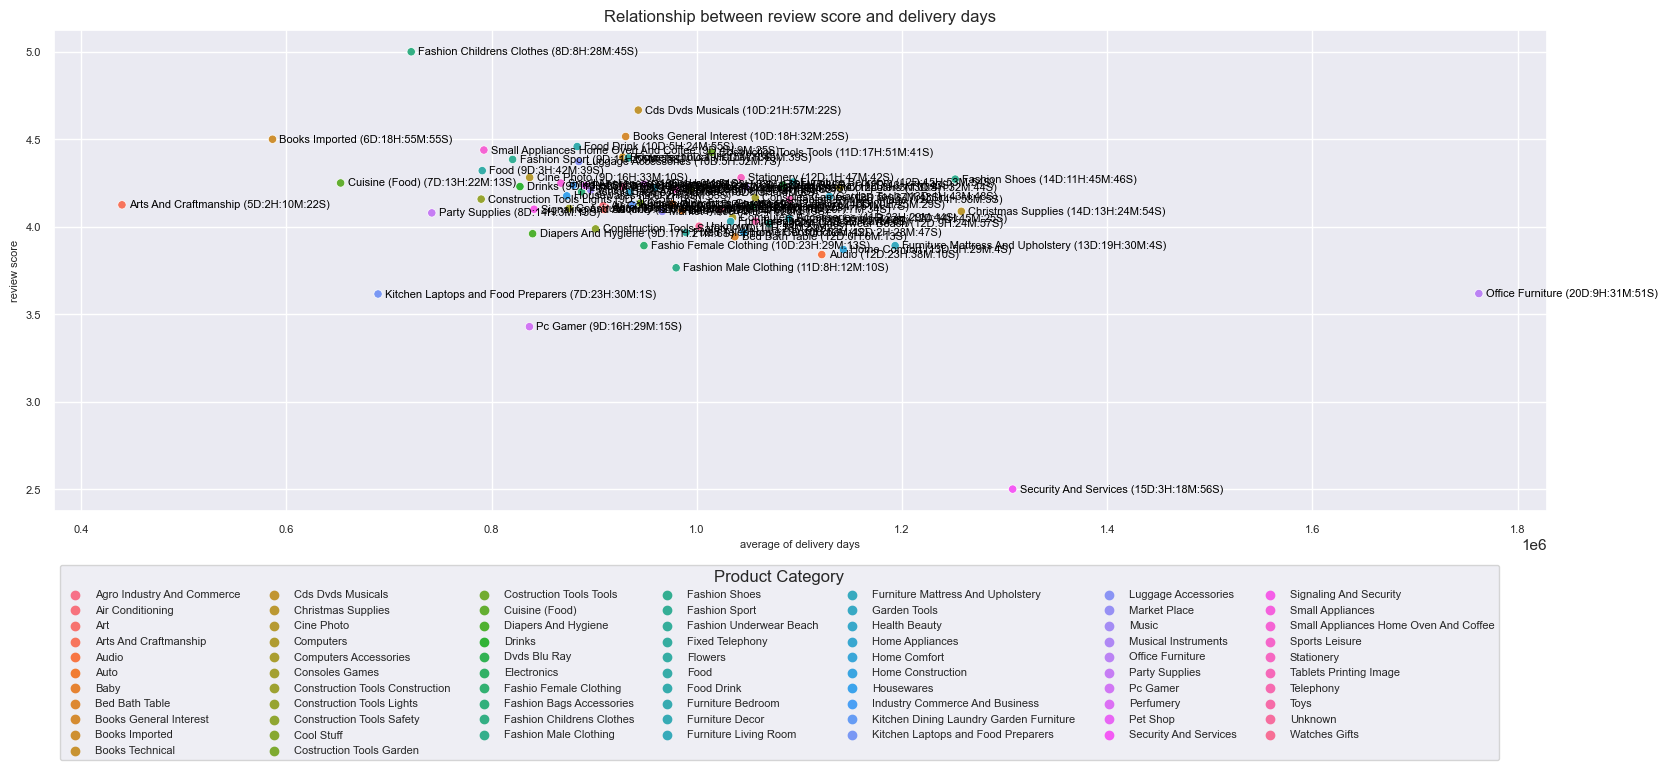

In [127]:
plt.figure(figsize=(17, 8))

ax = sns.scatterplot(x='total_days', y='review_score', hue='product_category_name', data=average_delivery_per_category)
plt.title('Relationship between review score and delivery days')
plt.xlabel('average of delivery days', fontsize=8)
plt.ylabel('review score', fontsize=8)
plt.tick_params(axis='both', labelsize=8)
plt.legend(title='Product Category', bbox_to_anchor=(0, -0.1), loc='upper left', fontsize=8, ncol=7)

# Add labels
for idx, (delivery, score, product, total_days) in enumerate(zip(average_delivery_per_category['total_days'], average_delivery_per_category['review_score'], average_delivery_per_category['product_category_name'], average_delivery_per_category['total_days_labels'])):
    label = f'{product} ({total_days})'
    ax.annotate(label, (delivery, score), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()
